# 1. Importing all the essential libraries:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeRegressor
import warnings

warnings.filterwarnings('ignore')
!pip install category_encoders
from category_encoders import TargetEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import PredictionErrorDisplay
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
!pip install --upgrade scikit-learn
#from sklearn.preprocessing import TargetEncoder
from sklearn.model_selection import ParameterGrid

from sklearn.model_selection import GridSearchCV

In [ ]:
pip install --upgrade scikit-learn

In [ ]:
np.__version__


# 2. Loading the data

In [ ]:
#loading the adverts.csv dataset and storing it in a variable calles car_sales
car_sales = pd.read_csv("C:\\Users\\swathi\\Downloads\\adverts.csv")


# 3. Inspecting the data

In [ ]:
car_sales.head(5)  #To view the top 5 rows of car_sales dataset

In [ ]:
#to view the details about the dataset
car_sales.info()


In [ ]:
car_sales.describe()

In [ ]:
car_sales.columns  # To view the columns of the car sales dataset

In [ ]:
#To view the shape of the dataset

car_sales.shape

# So there are 402005 rows and 12 columns

In [ ]:
null_values = car_sales.isnull().sum()
null_values
#To view the Missing values in the car_sales dataset

In [ ]:
null_values.sort_values(ascending=False).plot(kind='bar', color ='Red')
for index, value in enumerate(null_values.sort_values(ascending=False)):
  plt.text(index, value, str(value), rotation =45)

plt.title("Null Value Count")
plt.show()


In [ ]:
car_sales_no_duplicates = car_sales.drop_duplicates()
(len(car_sales), len(car_sales_no_duplicates))

#To verify if there are any duplicates in the car_sales dataset
# it is clear that there are no duplicate value in the dataset since the lenght of the car sales dataset and car_sales_no_duplicates are the same.

In [ ]:
car_sales["body_type"].value_counts().plot(kind ="bar")

# 4. Initial Exploration (Analysis of Data Distribution)


In [ ]:
car_sales["year_of_registration"].describe()

In [ ]:
sns.heatmap(car_sales.corr(numeric_only=True))
car_sales.corr(numeric_only=True)

In [ ]:

sns.boxplot(data = car_sales, x=car_sales["year_of_registration"])
plt.xlim(1890,2025)


In [ ]:
car_sales["price"].describe().round(2)
# sns.boxplot(x=car_sales["price"])


In [ ]:
sns.histplot(car_sales["price"],  kde=True)

In [ ]:
car_sales["year_of_registration"].skew(),car_sales["year_of_registration"].kurt()

# car_sales["mileage"].skew()

In [ ]:
car_sales['mileage'].describe()


In [ ]:
sns.boxplot(data = car_sales, x=car_sales["mileage"])

In [ ]:
categorical_features = ["vehicle_condition","standard_colour", "standard_make",  "body_type", "crossover_car_and_van", "fuel_type"]

for i in categorical_features:
  column_value_counts= car_sales[i].value_counts()
  plt.figure(figsize=(20, 5))
  plt.bar(x=(column_value_counts).index, height=(column_value_counts).values, width = 0.9, color= "pink")
  plt.xticks(rotation=60, ha='right')
  plt.xlabel(i)
  plt.ylabel("Counts")

  for index, value in enumerate(column_value_counts):
        plt.text(index, value, str(value), rotation =45)
  plt.show()

In [ ]:
for i in categorical_features:
  plt.figure(figsize=(10,10))
  sns.displot(x=car_sales[i], data=car_sales, color="Orange")
  plt.xticks(rotation=60, ha='right')
  plt.show()

In [ ]:
sns.catplot(data=car_sales, x= "body_type",y ="price",kind="box")
plt.xticks(rotation =45, ha ="right")
plt.show()

# 5.Analysis of Predictive Power of Features

In [ ]:
sns.heatmap(car_sales.corr(numeric_only=True))
car_sales.corr(numeric_only=True)

In [ ]:
plt.scatter(car_sales['mileage'], car_sales['price'])
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.title('Mileage vs Price')
plt.show()


In [ ]:
standard_make_count= car_sales['standard_make'].value_counts()
car_sales['standard_make_grouped'] = car_sales['standard_make'].apply(lambda x: x if standard_make_count[x] >= 4000 else 'others')


In [ ]:
car_sales['standard_make_grouped'].value_counts()

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x='standard_make_grouped', y='price', data=car_sales, palette="pastel")
plt.xticks(rotation=90)
plt.ylim(0,100000)
plt.title("Top Make Price Distribution")
plt.show()

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x='body_type', y='price', data=car_sales)
plt.xticks(rotation=90)
plt.ylim(0,100000)
plt.title("Body type price distribution")
plt.show()

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x='standard_colour', y='price', data=car_sales)
plt.xticks(rotation=90)
# plt.ylim(0,100000)
plt.show()

In [ ]:
 car_sales['standard_colour'].value_counts()

In [ ]:
car_sales.head(5)

# 6. Missing data exploration

In [ ]:
# Shows the count of missing values and the number of unique entries and  the Null count and the data types
Missing_values_count = pd.DataFrame(columns=['Columns','Unique values','Null Count', "Dtype"])

for i, col_name in enumerate(car_sales.columns):
    Missing_values_count.loc[i] = [col_name, car_sales[col_name].nunique(), car_sales[col_name].isnull().sum(), car_sales[col_name].dtype]

Missing_values_count


#There are more number of missing values in the column year_of_registration and reg_code

In [ ]:
#Using msno Matrix to visualize the Missing value
import missingno as msno
msno.matrix(car_sales)
#We can have a clear view with the pattern of missing values in the reg_code and year_of_registration column.

In [ ]:
msno.bar(car_sales)

In [ ]:
(car_sales.query("vehicle_condition=='NEW'")).count()

#For all the new vehicles , the year_of_registration and reg_code is missing

In [ ]:

#sns.pairplot(car_sales, size= 2)

# 7. Filling the missing values

In [ ]:
# filling the missing values for registration code and year of registration for the NEW CAR as 2021 and the reg code as 21
car_sales.loc[car_sales['vehicle_condition'] == 'NEW', 'year_of_registration'] = car_sales.loc[car_sales['vehicle_condition'] == 'NEW', 'year_of_registration'].fillna(2021)


#Filling values for reg code for new cars as 21
car_sales.loc[car_sales['vehicle_condition'] == 'NEW', 'reg_code'] = car_sales.loc[car_sales['vehicle_condition'] == 'NEW', 'reg_code'].fillna(21)




In [ ]:
#Mapping missing values for year_of_registration from reg_code column

def reg_code_to_year_mapping(reg_code):
    try:
        reg_code_int = int(reg_code)
        if reg_code_int < 50:
            return 2000 + reg_code_int
        else:
            return 1950 + reg_code_int
    except ValueError:

        return None

car_sales['year_of_registration'] = car_sales['year_of_registration'].fillna(car_sales['reg_code'].apply(lambda x: reg_code_to_year_mapping(x)))

In [ ]:
car_sales.isna().sum()

In [ ]:


old_car_reg_code_mapping={'A': 1963, 'B': 1964, 'C': 1965, 'D': 1966, 'E': 1967, 'F': 1968, 'G': 1969, 'H': 1970, 'J': 1971, 'K': 1972,
                   'L': 1973, 'M': 1973, 'N': 1974, 'P': 1975, 'R': 1976, 'S': 1977, 'T': 1978, 'V': 1979, 'W': 1980, 'X': 1981,
                  'Y': 1982}


car_sales['year_of_registration'] = car_sales['year_of_registration'].fillna(car_sales['reg_code'].str.upper().map(old_car_reg_code_mapping))

In [ ]:
car_sales['year_of_registration'].value_counts()

In [ ]:

car_sales.isna().sum()


In [ ]:
#dropping the 323 null values  in the year_of_registration column

car_sales = car_sales.dropna(subset=['year_of_registration'])



In [ ]:
print(car_sales["standard_colour"].dtype)

In [ ]:
#Filling the missing colour values using mode
from sklearn.impute import SimpleImputer

imputer_colour = SimpleImputer( strategy='most_frequent')

car_sales[["standard_colour"]]=imputer_colour.fit_transform(car_sales[["standard_colour"]])

In [ ]:
#removing the outliers for the year before 1892 and after 2021
first_car=1892
current_year =2021
car_sales= car_sales[(car_sales["year_of_registration"]>=first_car) & (car_sales["year_of_registration"]<=current_year)]

In [ ]:
car_sales["Age"]=(current_year-car_sales["year_of_registration"])
car_sales["Age"].unique()

In [ ]:
#filling the missing values of the mileage with the averge mileage driven by car per year and multiplying it with its age.
mileage_not_na = car_sales[(car_sales['mileage'].notnull())&(car_sales['vehicle_condition'] == 'USED') & (car_sales['mileage'] != 0)]
average_mileage_per_year = (((mileage_not_na['mileage'])/mileage_not_na["Age"]).mean())
average_mileage_per_year

car_sales['mileage']=car_sales['mileage'].fillna(((car_sales['Age'])*average_mileage_per_year))


In [ ]:
#Filling the missing values for body type with most frequent value

imputer_bodytype = SimpleImputer(strategy='most_frequent')
car_sales[["body_type"]]= imputer_bodytype.fit_transform(car_sales[['body_type']])


In [ ]:

#Filling the missing values for fuel type with most frequent value

imputer_fueltype = SimpleImputer(strategy='most_frequent')

car_sales[["fuel_type"]]= imputer_fueltype.fit_transform(car_sales[['fuel_type']])


In [ ]:

# droping the registration code column

car_sales.drop(columns=["reg_code"], inplace=True)
car_sales.drop(columns=["public_reference"], inplace=True)
#car_sales.drop(columns=["standard_make_grouped"], inplace=True)

In [ ]:
#Filling all the NEW cars mileage to 0
car_sales.loc[(car_sales['vehicle_condition'] == 'NEW')&(car_sales['mileage']>0), 'mileage']=0

In [ ]:

sns.heatmap(car_sales.isna())

In [ ]:
# import missingno as msno
# msno.matrix(car_sales)

# #there are no missing values

# 8. Handling Outliers

In [ ]:
car_sales.corr(numeric_only=True)

In [ ]:
sns.heatmap(car_sales.corr(numeric_only=True))

In [ ]:
car_sales[(car_sales['vehicle_condition'] =='USED')&(car_sales['mileage'] == 0)]

In [ ]:
car_sales.loc[(car_sales['mileage'] == 0) & (car_sales['vehicle_condition'] == 'USED') ,'mileage']=car_sales['Age']*average_mileage_per_year
#for 355 vehicle the vehicle_condition is used and the mileage is 0, for those vehicles imputing the mileage with average mileage per year* its age

In [ ]:
car_sales['year_of_registration'].unique()

In [ ]:
sns.boxplot(car_sales["mileage"])

In [ ]:
sns.boxplot(x=car_sales['price'])
car_sales[(car_sales['mileage']>car_sales['mileage'].quantile(0.75)) & (car_sales['year_of_registration']<2000)]
car_sales['mileage'].describe()

In [ ]:
sns.boxplot(data=car_sales, x=car_sales['price'])

In [ ]:
car_sales['price'].quantile(0.98)
car_sales.query("price>price.quantile(0.999985)").sort_values(by='price')

In [ ]:
car_sales['log_price'] = np.log(car_sales['price'])

In [ ]:
# sns.boxplot(data=car_sales, x= car_sales['log_price'])
sns.histplot(data=car_sales, x='log_price', kde=True);

In [ ]:
car_sales['log_mileage'] = np.log(car_sales['mileage']+1)

In [ ]:
sns.histplot(data=car_sales, x='mileage', kde=True);

In [ ]:
sns.histplot(data=car_sales, x='log_mileage', kde=True);

In [ ]:
  # Removing the outliers in year_of_registration column which is below the year 1892 and above the year 2021 and saving it in car_sales data frame

car_sales = car_sales[(car_sales['year_of_registration'] >= 1892) & (car_sales['year_of_registration'] <= 2021)]


In [ ]:

car_sales[car_sales['year_of_registration']<2000]["price"].mean(), car_sales[car_sales['year_of_registration']>1980]["price"].mean()
#the price difference between cars bought before 1980 and the overall mean is nearly 70000

# 9. Feature Engineering

In [ ]:

car_sales["average_mileage_per_year"]= car_sales["mileage"]/car_sales['Age'].replace(0,1)
car_sales["average_mileage_per_year"]


In [ ]:

sns.scatterplot(data= car_sales, x= car_sales["average_mileage_per_year"], y ="log_price")

In [ ]:
vintage_car_age = 20


def car_category(index):
    if (index['Age'] > vintage_car_age ):
        return 'Vintage_car'
    elif index['Age'] == 0:
        return 'New'
    else:
        return 'Used'

# Apply the function to create a new 'car_type' column
car_sales['car_type'] = car_sales.apply(car_category, axis=1)

In [ ]:

sns.scatterplot(data=car_sales, x="log_mileage", y="log_price", hue = "car_type")

In [ ]:
car_sales[car_sales["Age"]>20]

In [ ]:
car_sales["make_model"]= car_sales['standard_make']+" "+car_sales["standard_model"]
car_sales["make_model"]

In [ ]:
car_sales

In [ ]:
car_sales["standard_colour"].value_counts()

In [ ]:
standard_colour_count= car_sales['standard_colour'].value_counts()
car_sales['standard_colour_grouped'] = car_sales['standard_colour'].apply(lambda x: x if standard_colour_count[x] >= 500 else 'others')


In [ ]:
car_sales

# Feature selection


In [ ]:
fea_model = car_sales.drop(columns=['standard_make','standard_model','vehicle_condition','year_of_registration','price','average_mileage_per_year','mileage','crossover_car_and_van' , 'standard_colour'])# 'standard_make_grouped'

In [ ]:
fea_model.columns

In [ ]:
fea_model['car_type'].value_counts()

In [ ]:
fea_model

In [ ]:
fea_model['standard_colour_grouped'].value_counts()

# Train test and split.

In [ ]:
fea_model_sample= fea_model.sample(frac=0.25)
# Defining  features and target variable
X = fea_model_sample.drop(['log_price'], axis=1)
y = fea_model_sample['log_price']

In [ ]:
X = fea_model.drop(['log_price'], axis=1)

y = fea_model['log_price']

In [ ]:
#splitting the data into train and test and validation
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
X_val.shape

In [ ]:
X_train.shape

In [ ]:
fea_model.isna().sum()

In [ ]:
fea_model

# Column Transformer

In [ ]:
from sklearn.preprocessing import FunctionTransformer, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures

car_type_mapping = [['Used','New','Vintage_car']]
numeric_features = ['Age','log_mileage']
categorical_features = ['standard_colour_grouped', 'body_type', 'fuel_type','car_type', 'make_model']

#Numerical Transformer
numeric_transformer = ColumnTransformer(transformers=[('scaler', MinMaxScaler(),numeric_features)],
    remainder='passthrough').set_output(transform='pandas')

numeric_transformer_poly = Pipeline(steps=[
    ('scaler', MinMaxScaler()),
    ('poly', PolynomialFeatures( degree=3, interaction_only=False, include_bias=False))
])
#categorical Transformer
categorical_transformer = ColumnTransformer(transformers=[
    ('target', TargetEncoder(), ['make_model']),
    ('ordinal', OrdinalEncoder(categories=car_type_mapping), ['car_type']),
    ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), ['standard_colour_grouped', 'body_type', 'fuel_type'])
],remainder='passthrough').set_output(transform='pandas')

#PreProcessor to apply both the transformer and view the shape of the transformed columns.
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ],remainder='passthrough').set_output(transform='pandas')

preprocessor_poly = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer_poly, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ],remainder='passthrough').set_output(transform='pandas')


In [ ]:
preprocessor

In [ ]:
preprocessor_poly

In [ ]:
fea_transformed= preprocessor.fit_transform(X_train, y_train)
fea_transformed.shape


In [ ]:
fea_transformed.columns

In [ ]:
fea_transformed= preprocessor_poly.fit_transform(X_train, y_train)
fea_transformed.shape
fea_transformed.columns

In [ ]:
X_train['car_type'].value_counts()

In [ ]:
preprocessor

# Polynomial Feature Interaction

In [ ]:
plt.scatter(x='log_mileage' , data=fea_model, y = "log_price", c= "green")

In [ ]:
sns.regplot(
    data=fea_model, x='log_mileage',y="log_price", order=2,
    scatter_kws=dict(alpha=0.3, color="yellow")
)
plt.title("log_mileage vs log_price on second degree")

In [ ]:
sns.regplot(
    data=fea_model, x='Age',y="log_price", order=2,
    scatter_kws=dict(alpha=0.3, color="yellow")
)
plt.title("Age vs log_price on second degree")

In [ ]:
fea_model['mileage_age_interaction'] = fea_model['log_mileage'] * fea_model['Age']
sns.regplot(
    data=fea_model, x='mileage_age_interaction',y="log_price", order=3,
    scatter_kws=dict(alpha=0.3, color = "yellow")
)
plt.title("Mileage Age Interaction")

In [ ]:
fea_model.head(5)

In [379]:
new_car = fea_model.query('car_type=="New"')
used_car = fea_model.query('car_type=="Used"')
vintage_car = fea_model.query('car_type=="Vintage_car"')

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.regplot(
    data=new_car, x='log_mileage',y="log_price", order=1,
    scatter_kws=dict(alpha=0.3, color="pink"),ax=axes[0]
)
axes[0].set_title('New Car')
sns.regplot(
    data=used_car, x='log_mileage',y="log_price", order=1,
    scatter_kws=dict(alpha=0.3, color ="orange"),ax=axes[1]
)
axes[1].set_title('Used car')
sns.regplot(
    data=vintage_car, x='log_mileage',y="log_price", order=1,
    scatter_kws=dict(alpha=0.3, color = "skyblue"),ax=axes[2]

)
axes[2].set_title('Vintage car ')

In [ ]:

from sklearn.preprocessing import PolynomialFeatures
normal_reg = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('est', LinearRegression())
    ]
)

poly_reg = Pipeline(
    steps=[
        ('preprocessor_poly', preprocessor_poly),
        ('est', LinearRegression())
    ]
)

# Used Car Visualization

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(10, 10))  # Adjusted for correct layout

# List of polynomial orders you want to test
orders = [1, 2, 3, 4, 5, 6]

# Loop over flattened axes and orders simultaneously
for ax, order in zip(axes.ravel(), orders):
    sns.regplot(
        data=used_car, x='log_mileage', y="log_price", order=order,
        scatter_kws=dict(alpha=0.3, color='red'), ax=ax
    )
    ax.set_title(f'Polynomial Order {order}')

fig.suptitle('Impact of Car Log Mileage on Log Price: A Polynomial Degree Comparison', fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # Adjusted for correct layout

# List of polynomial orders you want to test
orders = [1, 2, 3, 4, 5, 6]

# Loop over flattened axes and orders simultaneously
for ax, order in zip(axes.ravel(), orders):
    sns.regplot(
        data=used_car, x='mileage_age_interaction', y="log_price", order=order,
        scatter_kws=dict(alpha=0.3, color='red'), ax=ax
    )
    ax.set_title(f'Polynomial Order {order}')

plt.tight_layout()
plt.show()

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))  # Adjusted for correct layout

# List of polynomial orders you want to test
orders = [1, 2, 3, 4, 5, 6]

# Loop over flattened axes and orders simultaneously
for ax, order in zip(axes.ravel(), orders):
    sns.regplot(
        data=used_car, x='Age', y="log_price", order=order,
        scatter_kws=dict(alpha=0.3, color='red'), ax=ax
    )
    ax.set_title(f'Polynomial Order {order}')

fig.suptitle('Impact of Car Age on Log Price: A Polynomial Degree Comparison', fontsize=16)

plt.tight_layout()
plt.show()

# NEW car Visualization

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(18, 10))  # Adjusted for correct layout

# List of polynomial orders you want to test
orders = [1, 2]

# Loop over flattened axes and orders simultaneously
for ax, order in zip(axes.ravel(), orders):
    sns.regplot(
        data=new_car, x='log_mileage', y="log_price", order=order,
        scatter_kws=dict(alpha=0.3, color='red'), ax=ax
    )
    ax.set_title(f'Polynomial Order {order}')

plt.tight_layout()
plt.show()

# Vintage Car Visualization

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # Adjusted for correct layout

# List of polynomial orders you want to test
orders = [1, 2, 3, 4, 5, 6]

# Loop over flattened axes and orders simultaneously
for ax, order in zip(axes.ravel(), orders):
    sns.regplot(
        data=vintage_car, x='log_mileage', y="log_price", order=order,
        scatter_kws=dict(alpha=0.3, color='orange'), ax=ax
    )
    ax.set_title(f'Polynomial Order {order}')

plt.tight_layout(pad=3.0)
fig.suptitle('Impact of Car Log Mileage on Log Price: A Polynomial Degree Comparison', fontsize=14, y=1.00)
plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.show()

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # Adjusted for correct layout

# List of polynomial orders you want to test
orders = [1, 2, 3, 4, 5, 6]

# Loop over flattened axes and orders simultaneously
for ax, order in zip(axes.ravel(), orders):
    sns.regplot(
        data=vintage_car, x='Age', y="log_price", order=order,
        scatter_kws=dict(alpha=0.3, color='orange'), ax=ax
    )
    ax.set_title(f'Polynomial Order {order}')
plt.tight_layout(pad=3.0)
fig.suptitle('Impact of Car Age on Log Price: A Polynomial Degree Comparison', fontsize=14, y=1.00)
plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.show()

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # Adjusted for correct layout

# List of polynomial orders you want to test
orders = [1, 2,3,4,5,6]

# Loop over flattened axes and orders simultaneously
for ax, order in zip(axes.ravel(), orders):
    sns.regplot(
        data=vintage_car, x='mileage_age_interaction', y="log_price", order=order,
        scatter_kws=dict(alpha=0.3, color='orange'), ax=ax
    )
    ax.set_title(f'Polynomial Order {order}')

plt.tight_layout()
plt.show()

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.regplot(
    data=new_car, x='Age',y="log_price", order=1,
    scatter_kws=dict(alpha=0.3),ax=axes[0]
)
axes[0].set_title('New Car')
sns.regplot(
    data=used_car, x='Age',y="log_price", order=1,
    scatter_kws=dict(alpha=0.3),ax=axes[1]
)
axes[1].set_title('Used car')
sns.regplot(
    data=vintage_car, x='Age',y="log_price", order=1,
    scatter_kws=dict(alpha=0.3),ax=axes[2]

)
axes[2].set_title('Vintage car ')

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.regplot(
    data=new_car, x='log_mileage',y="Age", order=1,
    scatter_kws=dict(alpha=0.3),ax=axes[0]
)
axes[0].set_title('New Car')
sns.regplot(
    data=used_car, x='log_mileage',y="Age", order=1,
    scatter_kws=dict(alpha=0.3),ax=axes[1]
)
axes[1].set_title('Used car')
sns.regplot(
    data=vintage_car, x='log_mileage',y="Age", order=1,
    scatter_kws=dict(alpha=0.3),ax=axes[2]

)
axes[2].set_title('Vintage car ')

In [ ]:
sns.displot(x="log_mileage",  data = car_sales, col="car_type", kind ="ecdf",stat='proportion')

In [ ]:
sns.displot(x="Age",  data = car_sales, col="car_type", kind ="ecdf",stat='proportion')

# New car Linear regression with Polynomial Feature Interaction


In [ ]:
X = new_car.drop(["log_price"], axis=1)
y = new_car["log_price"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0
)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV, ParameterGrid, RandomizedSearchCV
scoring_metrics = {'MAE': 'neg_mean_absolute_error', 'MSE': 'neg_mean_squared_error', 'R2': 'r2'}
eval_results_normal_reg = cross_validate(
    normal_reg, X_train, y_train, cv=5,
    scoring=scoring_metrics,
    return_train_score=True
)

In [ ]:
normal_reg.fit(X_train, y_train)

In [ ]:
eval_results_normal_reg

In [ ]:
y_pred = normal_reg.predict(X_test)

In [ ]:
print(mean_squared_error(y_test, y_pred))

In [ ]:
print(mean_absolute_error(y_test, y_pred))

In [ ]:
poly_reg.fit(X_train, y_train)

In [ ]:
scoring_metrics = {'MAE': 'neg_mean_absolute_error', 'MSE': 'neg_mean_squared_error', 'R2': 'r2'}
eval_results_poly_reg = cross_validate(
    poly_reg, X_train, y_train, cv=5,
    scoring=scoring_metrics,
    return_train_score=True
)

In [ ]:
eval_results_poly_reg

In [ ]:
metrics = ['MAE', 'MSE', 'R2','Fit Time','Score Time']
mean_fit_time_normal = np.mean(eval_results_normal_reg['fit_time'])
mean_score_time_normal = np.mean(eval_results_normal_reg['score_time'])
mean_mae_normal = -np.mean(eval_results_normal_reg['test_MAE'])
mean_mse_normal = -np.mean(eval_results_normal_reg['test_MSE'])
mean_r2_normal = np.mean(eval_results_normal_reg['test_R2'])

mean_fit_time_poly = np.mean(eval_results_poly_reg['fit_time'])
mean_score_time_poly = np.mean(eval_results_poly_reg['score_time'])
mean_mae_poly = -np.mean(eval_results_poly_reg['test_MAE'])
mean_mse_poly = -np.mean(eval_results_poly_reg['test_MSE'])
mean_r2_poly = np.mean(eval_results_poly_reg['test_R2'])

normal_scores = [mean_mae_normal, mean_mse_normal, mean_r2_normal, mean_fit_time_normal, mean_score_time_normal]
poly_scores = [mean_mae_poly, mean_mse_poly, mean_r2_poly, mean_fit_time_poly, mean_score_time_poly]

plt.figure(figsize=(8, 6))

# Plotting the normal regression scores
plt.plot(metrics, normal_scores, marker='o', linestyle='-', color='b', label='Normal Regression')

# Plotting the polynomial regression scores
plt.plot(metrics, poly_scores, marker='s', linestyle='--', color='g', label='Polynomial Regression')

plt.title('Comparison of Regression Models')
plt.ylabel('Scores')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
mean_fit_time_normal,mean_fit_time_poly

In [ ]:
poly_reg['preprocessor_poly'].get_feature_names_out()

# Vintage Car Polynomial Interaction

In [ ]:
X = vintage_car.drop(["log_price"], axis=1)
y = vintage_car["log_price"]

In [ ]:
X["make_model"].value_counts()

In [ ]:
#splitting the data into train and test and validation
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0
)

## Normal_reg

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV, ParameterGrid, RandomizedSearchCV

scoring_metrics = {'MAE': 'neg_mean_absolute_error', 'MSE': 'neg_mean_squared_error', 'R2': 'r2'}
eval_results_normal_reg = cross_validate(
    normal_reg, X_train, y_train, cv=5,
    scoring=scoring_metrics,
    return_train_score=True
)


In [ ]:
eval_results_normal_reg

In [ ]:
normal_reg

In [ ]:
normal_reg.fit(X_train, y_train)
normal_reg.score(X_test,y_test)

In [ ]:
normal_reg

In [ ]:
X_train

## Poly_reg

In [ ]:


degrees = [1, 2, 3, 4, 5, 6, 7, 9]
mean_r2_scores = []
lr_models = []

for degree in degrees:

    numeric_transformer_poly = Pipeline(steps=[
        ('scaler', MinMaxScaler()),
        ('poly', PolynomialFeatures(degree=degree, interaction_only=False, include_bias=False))
    ])


    preprocessor_poly = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer_poly, numeric_features),
            ('cat', categorical_transformer, categorical_features)
        ], remainder='passthrough')

    model_pipeline = Pipeline([
        ('preprocessor', preprocessor_poly),
        ('regressor', LinearRegression())
    ])
    lr_models.append(
        model_pipeline.fit(X_train, y_train)
    )


    r2_scores = cross_val_score(model_pipeline, X_train, y_train, scoring='r2', cv=5)
    mean_r2 = np.mean(r2_scores)
    mean_r2_scores.append(mean_r2)

# Plotting the results
plt.figure(figsize=(8, 6))
plt.plot(degrees, mean_r2_scores, marker='o')
plt.title('Model Performance vs. Polynomial Degree')
plt.xlabel('Degree of Polynomial Features')
plt.ylabel('Mean R-squared')
plt.xticks(degrees)
plt.ylim(-2, 1)
plt.grid(True)
plt.show()

In [ ]:

for degree, model in zip(degrees, lr_models):
    test_score = model.score(X_test, y_test)
    print(f"Degree {degree} model, R-squared on test set: {test_score}")

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV, ParameterGrid, RandomizedSearchCV
numeric_transformer_poly = Pipeline(steps=[
        ('scaler', MinMaxScaler()),
        ('poly', PolynomialFeatures(degree=3, interaction_only=False, include_bias=False))
    ])
preprocessor_poly = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer_poly, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ], remainder='passthrough')


poly_reg = Pipeline([
    ('preprocessor', preprocessor_poly),
    ('regressor', LinearRegression())
])


scoring_metrics = {'MAE': 'neg_mean_absolute_error', 'MSE': 'neg_mean_squared_error', 'R2': 'r2'}
eval_results_poly_reg = cross_validate(
    poly_reg, X_train, y_train, cv=5,
    scoring=scoring_metrics,
    return_train_score=True
)



In [ ]:
poly_reg

In [ ]:
eval_results_poly_reg

In [ ]:
poly_reg.fit(X_train,  y_train)
y_pred = poly_reg.predict(X_test)


test_mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Absolute Error on Test Data: {test_mae}")

In [ ]:
y_pred = poly_reg.predict(X_test)

# 3. Evaluate performance
test_mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error on Test Data: {test_mse}")

In [ ]:
y_pred = poly_reg.predict(X_test)

# 3. Evaluate performance
test_mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error on Train Data: {test_mse}")

In [ ]:
mean_r2_scores

In [ ]:
metrics = ['MAE', 'MSE', 'R2','Fit Time','Score Time']
mean_fit_time_normal = np.mean(eval_results_normal_reg['fit_time'])
mean_score_time_normal = np.mean(eval_results_normal_reg['score_time'])
mean_mae_normal = -np.mean(eval_results_normal_reg['test_MAE'])
mean_mse_normal = -np.mean(eval_results_normal_reg['test_MSE'])
mean_r2_normal = np.mean(eval_results_normal_reg['test_R2'])

mean_fit_time_poly = np.mean(eval_results_poly_reg['fit_time'])
mean_score_time_poly = np.mean(eval_results_poly_reg['score_time'])
mean_mae_poly = -np.mean(eval_results_poly_reg['test_MAE'])
mean_mse_poly = -np.mean(eval_results_poly_reg['test_MSE'])
mean_r2_poly = np.mean(eval_results_poly_reg['test_R2'])

normal_scores = [mean_mae_normal, mean_mse_normal, mean_r2_normal, mean_fit_time_normal, mean_score_time_normal]
poly_scores = [mean_mae_poly, mean_mse_poly, mean_r2_poly, mean_fit_time_poly, mean_score_time_poly]

plt.figure(figsize=(8, 6))

# Plotting the normal regression scores
plt.plot(metrics, normal_scores, marker='o', linestyle='-', color='b', label='Normal Regression')

# Plotting the polynomial regression scores
plt.plot(metrics, poly_scores, marker='s', linestyle='--', color='g', label='Polynomial Regression')

plt.title('Comparison of Regression Models')
plt.ylabel('Scores')
plt.legend()
plt.grid(True)
plt.show()



In [ ]:
poly_scores, normal_scores

# Used car Polynomial Feature Interaction

In [ ]:
X = used_car.drop("log_price", axis=1)
y = used_car["log_price"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0
)

## Normal_reg

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV, ParameterGrid, RandomizedSearchCV

scoring_metrics = {'MAE': 'neg_mean_absolute_error', 'MSE': 'neg_mean_squared_error', 'R2': 'r2'}
eval_results_normal_reg = cross_validate(
    normal_reg, X_train, y_train, cv=5,
    scoring=scoring_metrics,
    return_train_score=True
)


In [ ]:
eval_results_normal_reg

In [ ]:
normal_reg.fit(X_train, y_train)
normal_reg.score(X_test,y_test)

In [ ]:
normal_reg

## Poly_reg

In [ ]:


degrees = [1, 2, 3, 4, 5, 6, 7, 9]
mean_r2_scores = []
lr_models = []

for degree in degrees:

    numeric_transformer_poly = Pipeline(steps=[
        ('scaler', MinMaxScaler()),
        ('poly', PolynomialFeatures(degree=degree, interaction_only=False, include_bias=False))
    ])


    preprocessor_poly = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer_poly, numeric_features),
            ('cat', categorical_transformer, categorical_features)
        ], remainder='passthrough')

    model_pipeline = Pipeline([
        ('preprocessor', preprocessor_poly),
        ('regressor', LinearRegression())
    ])
    lr_models.append(
        model_pipeline.fit(X_train, y_train)
    )


    r2_scores = cross_val_score(model_pipeline, X_train, y_train, scoring='r2', cv=5)
    mean_r2 = np.mean(r2_scores)
    mean_r2_scores.append(mean_r2)

# Plotting the results
plt.figure(figsize=(8, 6))
plt.plot(degrees, mean_r2_scores, marker='o')
plt.title('Model Performance vs. Polynomial Degree')
plt.xlabel('Degree of Polynomial Features')
plt.ylabel('Mean R-squared')
plt.xticks(degrees)
plt.grid(True)
\
plt.show()

In [ ]:
mean_r2_scores

In [ ]:

for degree, model in zip(degrees, lr_models):
    test_score = model.score(X_test, y_test)
    print(f"Degree {degree} model, R-squared on test set: {test_score}")

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV, ParameterGrid, RandomizedSearchCV
numeric_transformer_poly = Pipeline(steps=[
        ('scaler', MinMaxScaler()),
        ('poly', PolynomialFeatures(degree=4, interaction_only=False, include_bias=False))
    ])
preprocessor_poly = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer_poly, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ], remainder='passthrough')


poly_reg = Pipeline([
    ('preprocessor', preprocessor_poly),
    ('regressor', LinearRegression())
])


scoring_metrics = {'MAE': 'neg_mean_absolute_error', 'MSE': 'neg_mean_squared_error', 'R2': 'r2'}
eval_results_poly_reg = cross_validate(
    poly_reg, X_train, y_train, cv=5,
    scoring=scoring_metrics,
    return_train_score=True
)



In [ ]:
poly_reg

In [ ]:
eval_results_poly_reg

In [ ]:
poly_reg.fit(X_train,  y_train)
y_pred = poly_reg.predict(X_test)


test_mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Absolute Error on Test Data: {test_mae}")

In [ ]:
y_pred = poly_reg.predict(X_test)

# 3. Evaluate performance
test_mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error on Test Data: {test_mse}")

In [ ]:
y_pred = poly_reg.predict(X_train)

# 3. Evaluate performance
test_mse = mean_squared_error(y_train, y_pred)

print(f"Mean Squared Error on Train Data: {test_mse}")

In [ ]:
mean_r2_scores

In [ ]:
metrics = ['MAE', 'MSE', 'R2','Fit Time','Score Time']
mean_fit_time_normal = np.mean(eval_results_normal_reg['fit_time'])
mean_score_time_normal = np.mean(eval_results_normal_reg['score_time'])
mean_mae_normal = -np.mean(eval_results_normal_reg['test_MAE'])
mean_mse_normal = -np.mean(eval_results_normal_reg['test_MSE'])
mean_r2_normal = np.mean(eval_results_normal_reg['test_R2'])

mean_fit_time_poly = np.mean(eval_results_poly_reg['fit_time'])
mean_score_time_poly = np.mean(eval_results_poly_reg['score_time'])
mean_mae_poly = -np.mean(eval_results_poly_reg['test_MAE'])
mean_mse_poly = -np.mean(eval_results_poly_reg['test_MSE'])
mean_r2_poly = np.mean(eval_results_poly_reg['test_R2'])

normal_scores = [mean_mae_normal, mean_mse_normal, mean_r2_normal, mean_fit_time_normal, mean_score_time_normal]
poly_scores = [mean_mae_poly, mean_mse_poly, mean_r2_poly, mean_fit_time_poly, mean_score_time_poly]

plt.figure(figsize=(8, 6))

# Plotting the normal regression scores
plt.plot(metrics, normal_scores, marker='o', linestyle='-', color='b', label='Normal Regression')

# Plotting the polynomial regression scores
plt.plot(metrics, poly_scores, marker='s', linestyle='--', color='g', label='Polynomial Regression')

plt.title('Comparison of Regression Models')
plt.ylabel('Scores')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
eval_results_normal_reg['fit_time'].mean()

In [ ]:
eval_results_poly_reg

In [ ]:
eval_results_normal_reg

# Feature Selection (Select K best)



In [ ]:
# Based on the Domain knowlegde i have selected the features in the dataframe fea_mode
fea_model

In [ ]:
X = fea_model.drop(['log_price'], axis=1)

y = fea_model['log_price']

In [ ]:
#splitting the data into train and test and validation
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import cross_val_score



In [ ]:
from sklearn.model_selection import cross_validate

scores_withoutpoly = []

for k in range(1, 9):
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('feature_selection', SelectKBest(f_regression, k=k)),
        ('regressor', LinearRegression())
    ])

    cv_results = cross_validate(pipeline, X_train, y_train, cv=5, return_train_score=True)

    mean_test_score = np.mean(cv_results['test_score'])
    scores_withoutpoly.append(mean_test_score)

    print(f"Mean R-squared for k={k}: {mean_test_score:.3f}")

In [ ]:
cv_results

In [ ]:
pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('feature_selection', SelectKBest(f_regression, k=5)),
        ('regressor', LinearRegression())
    ])
pipeline.fit(X_train, y_train)



selected_mask = pipeline.named_steps['feature_selection'].get_support()

all_scores = pipeline.named_steps['feature_selection'].scores_


selected_scores = all_scores[selected_mask]


processed_feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()

selected_feature_names = processed_feature_names[selected_mask]


plt.figure(figsize=(10, 6))
plt.bar(selected_feature_names, selected_scores, color='brown')
plt.xlabel('Features')
plt.ylabel('F-regression Score')
plt.title('Top 5 Features of Entire Dataset without polynomial Interaction features')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [ ]:
pipeline

In [ ]:
from sklearn.model_selection import cross_validate

scores_poly = []

for k in range(1, 9):
    pipeline = Pipeline([
        ('preprocessor_poly', preprocessor_poly),
        ('feature_selection', SelectKBest(f_regression, k=k)),
        ('regressor', LinearRegression())
    ])


    cv_results = cross_validate(pipeline, X_train, y_train, cv=5, return_train_score=True)


    mean_test_score = np.mean(cv_results['test_score'])
    scores_poly.append(mean_test_score)

    print(f"Mean R-squared for k={k}: {mean_test_score:.3f}")

In [ ]:
import matplotlib.pyplot as plt

k_values = range(1, 9)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(k_values, scores_withoutpoly, label='Without Polynomial Interaction', marker='o')
plt.plot(k_values, scores_poly , label='With Polynomial Interaction', marker='x')

# Adding title and labels
plt.title('Comparison of R-squared Values by Polynomial across Different k Values')
plt.xlabel('k Values')
plt.ylabel('Mean R-squared')
plt.xticks(k_values)
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
pipeline = Pipeline([
        ('preprocessor_poly', preprocessor_poly),
        ('feature_selection', SelectKBest(f_regression, k=5)),
        ('regressor', LinearRegression())
    ])
pipeline.fit(X_train, y_train)



selected_mask = pipeline.named_steps['feature_selection'].get_support()

all_scores = pipeline.named_steps['feature_selection'].scores_


selected_scores = all_scores[selected_mask]


processed_feature_names = pipeline.named_steps['preprocessor_poly'].get_feature_names_out()

selected_feature_names = processed_feature_names[selected_mask]


plt.figure(figsize=(10, 6))
plt.bar(selected_feature_names, selected_scores, color='green')
plt.xlabel('Features')
plt.ylabel('F-regression Score')
plt.title('Top 5 Features of Entire Dataset with polynomial Interaction features')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

## Applying SelectorKBest Based on vehicle condition

### New car

In [503]:
new_car = fea_model.query('car_type=="New"')
used_car = fea_model.query('car_type=="Used"')
vintage_car = fea_model.query('car_type=="Vintage_car"')

In [523]:
X = new_car.drop(["log_price"], axis=1)
y = new_car["log_price"]

In [525]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import cross_val_score
scores_withoutpoly = []

for k in range(1, 9):
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('feature_selection', SelectKBest(f_regression, k=k)),
        ('regressor', LinearRegression())
    ])

    cv_results = cross_validate(pipeline, X_train, y_train, cv=5, return_train_score=True)

    mean_test_score = np.mean(cv_results['test_score'])
    scores_withoutpoly.append(mean_test_score)

    print(f"Mean R-squared for k={k}: {mean_test_score:.3f}")

In [ ]:
pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('feature_selection', SelectKBest(f_regression, k=5)),
        ('regressor', LinearRegression())
    ])
pipeline.fit(X_train, y_train)



selected_mask = pipeline.named_steps['feature_selection'].get_support()

all_scores = pipeline.named_steps['feature_selection'].scores_


selected_scores = all_scores[selected_mask]


processed_feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()

selected_feature_names = processed_feature_names[selected_mask]


plt.figure(figsize=(10, 6))
plt.bar(selected_feature_names, selected_scores, color='purple')
plt.xlabel('Features')
plt.ylabel('F-regression Score')
plt.title('Top 5 Features of New car without polynomial Interaction features')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [ ]:
from sklearn.model_selection import cross_validate

scores_poly = []

for k in range(1, 9):
    pipeline = Pipeline([
        ('preprocessor_poly', preprocessor_poly),
        ('feature_selection', SelectKBest(f_regression, k=k)),
        ('regressor', LinearRegression())
    ])


    cv_results = cross_validate(pipeline, X_train, y_train, cv=5, return_train_score=True)


    mean_test_score = np.mean(cv_results['test_score'])
    scores_poly.append(mean_test_score)

    print(f"Mean R-squared for k={k}: {mean_test_score:.3f}")

In [ ]:
pipeline = Pipeline([
        ('preprocessor_poly', preprocessor_poly),
        ('feature_selection', SelectKBest(f_regression, k=5)),
        ('regressor', LinearRegression())
    ])
pipeline.fit(X_train, y_train)

selected_mask = pipeline.named_steps['feature_selection'].get_support()


processed_feature_names = pipeline.named_steps['preprocessor_poly'].get_feature_names_out()

selected_features = processed_feature_names[selected_mask]

print("Selected feature names:", selected_features)

In [ ]:
import matplotlib.pyplot as plt

k_values = range(1, 9)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(k_values, scores_withoutpoly, label='Without Polynomial Interaction', marker='o')
plt.plot(k_values, scores_poly , label='With Polynomial Interaction', marker='x')

# Adding title and labels
plt.title('Comparison of R-squared Values by Polynomial across Different k Values')
plt.xlabel('k Values')
plt.ylabel('Mean R-squared')
plt.xticks(k_values)
plt.legend()
plt.grid(True)
plt.show()

### Used car

In [531]:
X = used_car.drop(["log_price"], axis=1)
y = used_car["log_price"]

In [533]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.model_selection import cross_validate

scores_withoutpoly = []

for k in range(1, 9):
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('feature_selection', SelectKBest(f_regression, k=k)),
        ('regressor', LinearRegression())
    ])

    cv_results = cross_validate(pipeline, X_train, y_train, cv=5, return_train_score=True)
    mean_test_score = np.mean(cv_results['test_score'])
    scores_withoutpoly.append(mean_test_score)

    print(f"Mean R-squared for k={k}: {mean_test_score:.3f}")

In [ ]:
pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('feature_selection', SelectKBest(f_regression, k=5)),
        ('regressor', LinearRegression())
    ])
pipeline.fit(X_train, y_train)



selected_mask = pipeline.named_steps['feature_selection'].get_support()

all_scores = pipeline.named_steps['feature_selection'].scores_


selected_scores = all_scores[selected_mask]


processed_feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()

selected_feature_names = processed_feature_names[selected_mask]


plt.figure(figsize=(10, 6))
plt.bar(selected_feature_names, selected_scores, color='yellow')
plt.xlabel('Features')
plt.ylabel('F-regression Score')
plt.title('Top 5 Features of Used car without polynomial Interaction features')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [ ]:
from sklearn.model_selection import cross_validate

scores_poly = []

for k in range(1, 9):
    pipeline = Pipeline([
        ('preprocessor_poly', preprocessor_poly),
        ('feature_selection', SelectKBest(f_regression, k=k)),
        ('regressor', LinearRegression())
    ])


    cv_results = cross_validate(pipeline, X_train, y_train, cv=5, return_train_score=True)


    mean_test_score = np.mean(cv_results['test_score'])
    scores_poly.append(mean_test_score)

    print(f"Mean R-squared for k={k}: {mean_test_score:.3f}")

In [ ]:
import matplotlib.pyplot as plt

k_values = range(1, 9)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(k_values, scores_withoutpoly, label='Without Polynomial Interaction', marker='o')
plt.plot(k_values, scores_poly , label='With Polynomial Interaction', marker='x')

# Adding title and labels
plt.title('Used Cars Comparison of R-squared Values by Polynomial across Different k Values ')
plt.xlabel('k Values')
plt.ylabel('Mean R-squared')
plt.xticks(k_values)
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
pipeline = Pipeline([
        ('preprocessor_poly', preprocessor_poly),
        ('feature_selection', SelectKBest(f_regression, k=5)),
        ('regressor', LinearRegression())
    ])
pipeline.fit(X_train, y_train)



selected_mask = pipeline.named_steps['feature_selection'].get_support()

all_scores = pipeline.named_steps['feature_selection'].scores_


selected_scores = (all_scores[selected_mask])


processed_feature_names = pipeline.named_steps['preprocessor_poly'].get_feature_names_out()

selected_feature_names = processed_feature_names[selected_mask]


plt.figure(figsize=(10, 6))
plt.bar(selected_feature_names, selected_scores, color='yellow')
plt.xlabel('Features')
plt.ylabel('F-regression Score')
plt.title('Top 5 Features of Used car with polynomial Interaction features')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Vintage car

In [ ]:
X = vintage_car.drop(["log_price"], axis=1)
y = vintage_car["log_price"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.model_selection import cross_validate

scores_withoutpoly = []

for k in range(1, 9):
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('feature_selection', SelectKBest(f_regression, k=k)),
        ('regressor', LinearRegression())
    ])

    cv_results = cross_validate(pipeline, X_train, y_train, cv=5, return_train_score=True)

    mean_test_score = np.mean(cv_results['test_score'])
    scores_withoutpoly.append(mean_test_score)

    print(f"Mean R-squared for k={k}: {mean_test_score:.3f}")

In [ ]:
pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('feature_selection', SelectKBest(f_regression, k=5)),
        ('regressor', LinearRegression())
    ])
pipeline.fit(X_train, y_train)


selected_mask = pipeline.named_steps['feature_selection'].get_support()

all_scores = pipeline.named_steps['feature_selection'].scores_


selected_scores = all_scores[selected_mask]


processed_feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()

selected_feature_names = processed_feature_names[selected_mask]


plt.figure(figsize=(10, 6))
plt.bar(selected_feature_names, selected_scores, color='skyblue')
plt.xlabel('Features')
plt.ylabel('F-regression Score')
plt.title('Top 5 Features of vintage car without polynomial Interaction features')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import cross_validate

scores_poly = []

for k in range(1, 9):
    pipeline = Pipeline([
        ('preprocessor_poly', preprocessor_poly),
        ('feature_selection', SelectKBest(f_regression, k=k)),
        ('regressor', LinearRegression())
    ])


    cv_results = cross_validate(pipeline, X_train, y_train, cv=5, return_train_score=True)


    mean_test_score = np.mean(cv_results['test_score'])
    scores_poly.append(mean_test_score)

    print(f"Mean R-squared for k={k}: {mean_test_score:.3f}")

In [ ]:
import matplotlib.pyplot as plt

k_values = range(1, 9)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(k_values, scores_withoutpoly, label='Without Polynomial Interaction', marker='o')
plt.plot(k_values, scores_poly , label='With Polynomial Interaction', marker='x')

# Adding title and labels
plt.title('Vintage car Comparison of R-squared Values by Polynomial across Different k Values')
plt.xlabel('k Values')
plt.ylabel('Mean R-squared')
plt.xticks(k_values)
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
pipeline = Pipeline([
        ('preprocessor_poly', preprocessor_poly),
        ('feature_selection', SelectKBest(f_regression, k=5)),
        ('regressor', LinearRegression())
    ])
pipeline.fit(X_train, y_train)

# selected_mask = pipeline.named_steps['feature_selection'].get_support()


# processed_feature_names = pipeline.named_steps['preprocessor_poly'].get_feature_names_out()

# selected_features = processed_feature_names[selected_mask]

# print("Selected feature names:", selected_features)


selected_mask = pipeline.named_steps['feature_selection'].get_support()

all_scores = pipeline.named_steps['feature_selection'].scores_


selected_scores = all_scores[selected_mask]


processed_feature_names = pipeline.named_steps['preprocessor_poly'].get_feature_names_out()

selected_feature_names = processed_feature_names[selected_mask]


plt.figure(figsize=(10, 6))
plt.bar(selected_feature_names, selected_scores, color='skyblue')
plt.xlabel('Features')
plt.ylabel('F-regression Score')
plt.title('Top 5 Features of vintage car with polynomial Interaction features')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Recursive feature elimination

## Using Decision tree Regressor:

In [ ]:
X = fea_model.drop(['log_price'], axis=1)

y = fea_model['log_price']

In [ ]:
#splitting the data into train and test and validation
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

## Using Decision Tree

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(max_depth=10)
ref_selector = RFECV(estimator=model, step=1)

pipeline = Pipeline([
    ('preprocessor_poly', preprocessor_poly),
    ('feature_selection', ref_selector),
    ('regressor', model)
])

pipeline.fit(X_train, y_train)



In [ ]:
ref_selector.cv_results_

In [ ]:
n_scores = len(ref_selector.cv_results_["mean_test_score"])
n_scores

In [ ]:
ref_selector.cv_results_["mean_test_score"]

In [ ]:
ref_selector.get_feature_names_out()

In [ ]:

fig, ax = plt.subplots(figsize=(7,5))
ax.errorbar(
    range(1, n_scores+1),
    ref_selector.cv_results_["mean_test_score"],
    yerr=ref_selector.cv_results_["std_test_score"],fmt='-o',
    ecolor='gray',
    color='skyblue'
)
ax.set_xlabel("Number of features selected")
ax.set_ylabel("Mean test score");

In [ ]:
param_grid = {
    'feature_selection__estimator__max_depth': [5, 10, 15]  # Range of `max_depth` values to evaluate
}
grid_search = GridSearchCV(pipeline, param_grid, scoring='neg_mean_squared_error', verbose=1,  n_jobs=-1)
dt_grid= grid_search.fit(X_train, y_train)
dt_grid

In [ ]:
cv_results_df = pd.DataFrame(grid_search.cv_results_)
cv_results_df

In [ ]:
cv_results_df[["rank_test_score", "params", "mean_test_score", 'std_test_score']]

In [ ]:
rfe = pipeline.named_steps['feature_selection']
selected_mask = rfe.support_
preprocessor_feature_names = pipeline.named_steps['preprocessor_poly'].get_feature_names_out()
selected_feature_names = preprocessor_feature_names[selected_mask]
selected_feature_names

In [ ]:
pipeline.score(X_test,y_test), pipeline.score(X_train,y_train)

In [ ]:
y_pred= pipeline.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

In [ ]:
r2 = r2_score(pipeline.predict(X_val), y_val)
print(f"R-squared: {r2}")

In [ ]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Root Mean Squared Error: {rmse}")

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

## Using Linear Regression

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.tree import DecisionTreeRegressor

model = LinearRegression()

ref_selector = RFECV(estimator=model, step=1,  cv = 5)


pipeline = Pipeline([
    ('preprocessor_poly', preprocessor_poly),
    ('feature_selection', ref_selector),
    ('regressor', model)
])

pipeline.fit(X_train, y_train)



In [ ]:
ref_selector.get_feature_names_out()

In [ ]:
n_scores = len(ref_selector.cv_results_["mean_test_score"])
n_scores

In [ ]:

fig, ax = plt.subplots(figsize=(7,5))
ax.errorbar(
    range(1, n_scores+1),
    ref_selector.cv_results_["mean_test_score"],
    yerr=ref_selector.cv_results_["std_test_score"],fmt='-o',
    ecolor='gray',
    color='skyblue'
)
ax.set_xlabel("Number of features selected")
ax.set_ylabel("Mean test score");

In [ ]:
rfe = pipeline.named_steps['feature_selection']
selected_mask = rfe.support_
preprocessor_feature_names = pipeline.named_steps['preprocessor_poly'].get_feature_names_out()
selected_feature_names = preprocessor_feature_names[selected_mask]
selected_feature_names

In [ ]:
y_pred= pipeline.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

In [ ]:
pipeline.score(X_val, y_val)

## Using Random Forest

In [ ]:
fea_model_sample= fea_model.sample(frac=0.10)
# Defining  features and target variable
X = fea_model_sample.drop(['log_price'], axis=1)
y = fea_model_sample['log_price']
#splitting the data into train and test and validation
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.tree import DecisionTreeRegressor

model =  RandomForestRegressor(max_depth=5)
ref_selector = RFECV(estimator=model, step=1)


pipeline = Pipeline([
    ('preprocessor_poly', preprocessor_poly),
    ('feature_selection', ref_selector),
    ('regressor', model)
])

pipeline.fit(X_train, y_train)



In [ ]:
ref_selector.cv_results_

In [ ]:
n_scores = len(ref_selector.cv_results_["mean_test_score"])
n_scores

In [ ]:
ref_selector.cv_results_["mean_test_score"]

In [ ]:
ref_selector.get_feature_names_out()

In [ ]:

fig, ax = plt.subplots(figsize=(7,5))
ax.errorbar(
    range(1, n_scores+1),
    ref_selector.cv_results_["mean_test_score"],
    yerr=ref_selector.cv_results_["std_test_score"],fmt='-o',
    ecolor='gray',
    color='skyblue'
)
ax.set_xlabel("Number of features selected")
ax.set_ylabel("Mean test score");

In [ ]:
param_grid = {
    'feature_selection__estimator__max_depth': [5, 10, 15]  # Range of `max_depth` values to evaluate
}
grid_search = GridSearchCV(pipeline, param_grid, scoring='neg_mean_squared_error', verbose=1,  n_jobs=-1)
dt_grid= grid_search.fit(X_train, y_train)
dt_grid

In [ ]:
cv_results_df = pd.DataFrame(grid_search.cv_results_)
cv_results_df

In [ ]:
rfe = pipeline.named_steps['feature_selection']
selected_mask = rfe.support_
preprocessor_feature_names = pipeline.named_steps['preprocessor_poly'].get_feature_names_out()
selected_feature_names = preprocessor_feature_names[selected_mask]
selected_feature_names

In [ ]:
pipeline.score(X_test,y_test), pipeline.score(X_train,y_train)

In [ ]:
y_pred= pipeline.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

In [ ]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Root Mean Squared Error: {rmse}")

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

##Using Gradient Booster

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

model =  GradientBoostingRegressor(random_state=0)
ref_selector = RFECV(estimator=model, step=1)


pipeline = Pipeline([
    ('preprocessor_poly', preprocessor_poly),
    ('feature_selection', ref_selector),
    ('regressor', model)
])

pipeline.fit(X_train, y_train)





In [ ]:
ref_selector.cv_results_

In [ ]:
n_scores = len(ref_selector.cv_results_["mean_test_score"])
n_scores

In [ ]:
ref_selector.cv_results_["mean_test_score"]

In [ ]:
ref_selector.get_feature_names_out()

In [ ]:

fig, ax = plt.subplots(figsize=(7,5))
ax.errorbar(
    range(1, n_scores+1),
    ref_selector.cv_results_["mean_test_score"],
    yerr=ref_selector.cv_results_["std_test_score"],fmt='-o',
    ecolor='gray',
    color='skyblue'
)
ax.set_xlabel("Number of features selected")
ax.set_ylabel("Mean test score");

In [ ]:
param_grid = {
    'feature_selection__estimator__max_depth': [5, 10, 15]  # Range of `max_depth` values to evaluate
}
grid_search = GridSearchCV(pipeline, param_grid, scoring='neg_mean_squared_error', verbose=1,  n_jobs=-1)
dt_grid= grid_search.fit(X_train, y_train)
dt_grid

In [ ]:
cv_results_df = pd.DataFrame(grid_search.cv_results_)
cv_results_df

In [ ]:
rfe = pipeline.named_steps['feature_selection']
selected_mask = rfe.support_
preprocessor_feature_names = pipeline.named_steps['preprocessor_poly'].get_feature_names_out()
selected_feature_names = preprocessor_feature_names[selected_mask]
selected_feature_names

In [ ]:
pipeline.score(X_test,y_test), pipeline.score(X_train,y_train)

In [ ]:
y_pred= pipeline.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

In [ ]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Root Mean Squared Error: {rmse}")

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

## Using Linear Regression Tree on New car

In [ ]:
X = new_car.drop(["log_price"], axis=1)
y = new_car["log_price"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [ ]:
#splitting the data into train and test and validation
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
X_train

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.tree import DecisionTreeRegressor

model = LinearRegression()

ref_selector = RFECV(estimator=model, step=1, cv = 5 )

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('feature_selection', ref_selector),
    ('regressor', model)
])

pipeline.fit(X_train, y_train)



In [ ]:
ref_selector.cv_results_

In [ ]:
n_scores = len(ref_selector.cv_results_["mean_test_score"])
n_scores

In [ ]:
ref_selector.cv_results_["mean_test_score"]

In [ ]:
ref_selector.get_feature_names_out()

In [ ]:

fig, ax = plt.subplots(figsize=(7,5))
ax.errorbar(
    range(1, n_scores+1),
    ref_selector.cv_results_["mean_test_score"],
    yerr=ref_selector.cv_results_["std_test_score"],fmt='-o',
    ecolor='gray',
    color='skyblue'
)
ax.set_xlabel("Number of features selected")
ax.set_ylabel("Mean test score");

In [ ]:
param_grid = {

    'feature_selection__cv': [3, 5, 10],
    'feature_selection__step': [1, 2, 3]
}
grid_search = GridSearchCV(pipeline, param_grid, verbose=1,  n_jobs=-1)
dt_grid= grid_search.fit(X_train, y_train)
dt_grid

In [ ]:
cv_results_df = pd.DataFrame(grid_search.cv_results_)
cv_results_df

In [ ]:
cv_results_df[["rank_test_score", "params", "mean_test_score", 'std_test_score']]

In [ ]:
rfe = pipeline.named_steps['feature_selection']
selected_mask = rfe.support_
preprocessor_feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()
selected_feature_names = preprocessor_feature_names[selected_mask]
selected_feature_names


In [ ]:
pipeline.score(X_test,y_test), pipeline.score(X_train,y_train)

In [ ]:
y_pred= pipeline.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

In [ ]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Root Mean Squared Error: {rmse}")

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

## Using Random Forest  Tree on New car

In [ ]:
X = new_car.drop(["log_price"], axis=1)
y = new_car["log_price"]

In [ ]:
#splitting the data into train and test and validation
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.tree import DecisionTreeRegressor


model = RandomForestRegressor(random_state=0)
ref_selector = RFECV(estimator=model, step=1,  scoring='neg_mean_squared_error')

pipeline = Pipeline([
    ('preprocessor_poly', preprocessor_poly),
    ('feature_selection', ref_selector),
    ('regressor', model)
])

pipeline.fit(X_train, y_train)



In [ ]:
ref_selector.cv_results_

In [ ]:
n_scores = len(ref_selector.cv_results_["mean_test_score"])
n_scores

In [ ]:
ref_selector.cv_results_["mean_test_score"]

In [ ]:
ref_selector.get_feature_names_out()

In [ ]:

fig, ax = plt.subplots(figsize=(7,5))
ax.errorbar(
    range(1, n_scores+1),
    ref_selector.cv_results_["mean_test_score"],
    yerr=ref_selector.cv_results_["std_test_score"],fmt='-o',
    ecolor='gray',
    color='skyblue'
)
ax.set_xlabel("Number of features selected")
ax.set_ylabel("Mean test score");

In [ ]:
param_grid = {
    'feature_selection__estimator__max_depth': [5, 10, 15]  # Range of `max_depth` values to evaluate
}
grid_search = GridSearchCV(pipeline, param_grid, scoring='neg_mean_squared_error', verbose=1,  n_jobs=-1)
dt_grid= grid_search.fit(X_train, y_train)
dt_grid

In [ ]:
cv_results_df = pd.DataFrame(grid_search.cv_results_)
cv_results_df

In [ ]:
cv_results_df[["rank_test_score", "params", "mean_test_score", 'std_test_score']]

In [ ]:
rfe = pipeline.named_steps['feature_selection']
selected_mask = rfe.support_
preprocessor_feature_names = pipeline.named_steps['preprocessor_poly'].get_feature_names_out()
selected_feature_names = preprocessor_feature_names[selected_mask]
selected_feature_names

In [ ]:
pipeline.score(X_test,y_test), pipeline.score(X_train,y_train)

In [ ]:
y_pred= pipeline.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

In [ ]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Root Mean Squared Error: {rmse}")

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

## Using Decision Tree on New car

In [ ]:
X = new_car.drop(["log_price"], axis=1)
y = new_car["log_price"]

In [ ]:
#splitting the data into train and test and validation
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.tree import DecisionTreeRegressor


model = DecisionTreeRegressor(max_depth=10)
ref_selector = RFECV(estimator=model, step=1,  scoring='neg_mean_squared_error')

pipeline = Pipeline([
    ('preprocessor_poly', preprocessor_poly),
    ('feature_selection', ref_selector),
    ('regressor', model)
])

pipeline.fit(X_train, y_train)



In [ ]:
ref_selector.cv_results_

In [ ]:
n_scores = len(ref_selector.cv_results_["mean_test_score"])
n_scores

In [ ]:
ref_selector.cv_results_["mean_test_score"]

In [ ]:
ref_selector.get_feature_names_out()

In [ ]:

fig, ax = plt.subplots(figsize=(7,5))
ax.errorbar(
    range(1, n_scores+1),
    ref_selector.cv_results_["mean_test_score"],
    yerr=ref_selector.cv_results_["std_test_score"],fmt='-o',
    ecolor='gray',
    color='skyblue'
)
ax.set_xlabel("Number of features selected")
ax.set_ylabel("Mean test score");

In [ ]:
param_grid = {
    'feature_selection__estimator__max_depth': [5, 10, 15]  # Range of `max_depth` values to evaluate
}
grid_search = GridSearchCV(pipeline, param_grid, scoring='neg_mean_squared_error', verbose=1,  n_jobs=-1)
dt_grid= grid_search.fit(X_train, y_train)
dt_grid

In [ ]:
cv_results_df = pd.DataFrame(grid_search.cv_results_)
cv_results_df

In [ ]:
cv_results_df[["rank_test_score", "params", "mean_test_score", 'std_test_score']]

In [ ]:
rfe = pipeline.named_steps['feature_selection']
selected_mask = rfe.support_
preprocessor_feature_names = pipeline.named_steps['preprocessor_poly'].get_feature_names_out()
selected_feature_names = preprocessor_feature_names[selected_mask]
selected_feature_names

In [ ]:
pipeline.score(X_test,y_test), pipeline.score(X_train,y_train)

In [ ]:
y_pred= pipeline.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

In [ ]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Root Mean Squared Error: {rmse}")

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

## Using Gradient Booster on New car

In [ ]:
X = new_car.drop(["log_price"], axis=1)
y = new_car["log_price"]

In [ ]:
#splitting the data into train and test and validation
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.tree import DecisionTreeRegressor


model = GradientBoostingRegressor(random_state=0)
ref_selector = RFECV(estimator=model, step=1,  scoring='neg_mean_squared_error')

pipeline = Pipeline([
    ('preprocessor_poly', preprocessor_poly),
    ('feature_selection', ref_selector),
    ('regressor', model)
])

pipeline.fit(X_train, y_train)



In [ ]:
ref_selector.cv_results_

In [ ]:
n_scores = len(ref_selector.cv_results_["mean_test_score"])
n_scores

In [ ]:
ref_selector.cv_results_["mean_test_score"]

In [ ]:
ref_selector.get_feature_names_out()

In [ ]:

fig, ax = plt.subplots(figsize=(7,5))
ax.errorbar(
    range(1, n_scores+1),
    ref_selector.cv_results_["mean_test_score"],
    yerr=ref_selector.cv_results_["std_test_score"],fmt='-o',
    ecolor='gray',
    color='skyblue'
)
ax.set_xlabel("Number of features selected")
ax.set_ylabel("Mean test score");

In [ ]:
param_grid = {
    'feature_selection__estimator__max_depth': [5, 10, 15]  # Range of `max_depth` values to evaluate
}
grid_search = GridSearchCV(pipeline, param_grid, scoring='neg_mean_squared_error', verbose=1,  n_jobs=-1)
dt_grid= grid_search.fit(X_train, y_train)
dt_grid

In [ ]:
cv_results_df = pd.DataFrame(grid_search.cv_results_)
cv_results_df

In [ ]:
cv_results_df[["rank_test_score", "params", "mean_test_score", 'std_test_score']]

In [ ]:
rfe = pipeline.named_steps['feature_selection']
selected_mask = rfe.support_
preprocessor_feature_names = pipeline.named_steps['preprocessor_poly'].get_feature_names_out()
selected_feature_names = preprocessor_feature_names[selected_mask]
selected_feature_names

In [ ]:
pipeline.score(X_test,y_test), pipeline.score(X_train,y_train)

In [ ]:
y_pred= pipeline.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

In [ ]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Root Mean Squared Error: {rmse}")

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

## Using Linear Regression on Used car

In [ ]:
X = used_car.drop("log_price", axis=1)
y = used_car["log_price"]

In [ ]:
#splitting the data into train and test and validation
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.tree import DecisionTreeRegressor

model = LinearRegression()

ref_selector = RFECV(estimator=model, step=1,  scoring='neg_mean_squared_error')

pipeline = Pipeline([
    ('preprocessor_poly', preprocessor_poly),
    ('feature_selection', ref_selector),
    ('regressor', model)
])

pipeline.fit(X_train, y_train)



In [ ]:
ref_selector.cv_results_

In [ ]:
n_scores = len(ref_selector.cv_results_["mean_test_score"])
n_scores

In [ ]:
ref_selector.cv_results_["mean_test_score"]

In [ ]:
ref_selector.get_feature_names_out()

In [ ]:

fig, ax = plt.subplots(figsize=(7,5))
ax.errorbar(
    range(1, n_scores+1),
    ref_selector.cv_results_["mean_test_score"],
    yerr=ref_selector.cv_results_["std_test_score"],fmt='-o',
    ecolor='gray',
    color='skyblue'
)
ax.set_xlabel("Number of features selected")
ax.set_ylabel("Mean test score");

In [ ]:
param_grid = {
    'feature_selection__estimator__max_depth': [5, 10, 15]  # Range of `max_depth` values to evaluate
}
grid_search = GridSearchCV(pipeline, param_grid, scoring='neg_mean_squared_error', verbose=1,  n_jobs=-1)
dt_grid= grid_search.fit(X_train, y_train)
dt_grid

In [ ]:
cv_results_df = pd.DataFrame(grid_search.cv_results_)
cv_results_df

In [ ]:
cv_results_df[["rank_test_score", "params", "mean_test_score", 'std_test_score']]

In [ ]:
rfe = pipeline.named_steps['feature_selection']
selected_mask = rfe.support_
preprocessor_feature_names = pipeline.named_steps['preprocessor_poly'].get_feature_names_out()
selected_feature_names = preprocessor_feature_names[selected_mask]
selected_feature_names

In [ ]:
pipeline.score(X_test,y_test), pipeline.score(X_train,y_train)

In [ ]:
y_pred= pipeline.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

In [ ]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Root Mean Squared Error: {rmse}")

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

In [ ]:
y_pred= pipeline.predict(X_val)
from sklearn.metrics import r2_score
r2 = r2_score(y_val, y_pred)
print(f"R-squared: {r2}")

## Using Decision Tree on Used car

In [ ]:
X = used_car.drop("log_price", axis=1)
y = used_car["log_price"]

In [ ]:
#splitting the data into train and test and validation
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.tree import DecisionTreeRegressor


model = DecisionTreeRegressor(max_depth=10)
ref_selector = RFECV(estimator=model, step=1,  scoring='neg_mean_squared_error')

pipeline = Pipeline([
    ('preprocessor_poly', preprocessor_poly),
    ('feature_selection', ref_selector),
    ('regressor', model)
])

pipeline.fit(X_train, y_train)



In [ ]:
ref_selector.cv_results_

In [ ]:
n_scores = len(ref_selector.cv_results_["mean_test_score"])
n_scores

In [ ]:
ref_selector.cv_results_["mean_test_score"]

In [ ]:
ref_selector.get_feature_names_out()

In [ ]:

fig, ax = plt.subplots(figsize=(7,5))
ax.errorbar(
    range(1, n_scores+1),
    ref_selector.cv_results_["mean_test_score"],
    yerr=ref_selector.cv_results_["std_test_score"],fmt='-o',
    ecolor='gray',
    color='skyblue'
)
ax.set_xlabel("Number of features selected")
ax.set_ylabel("Mean test score");

In [ ]:
param_grid = {
    'feature_selection__estimator__max_depth': [5, 10, 15]  # Range of `max_depth` values to evaluate
}
grid_search = GridSearchCV(pipeline, param_grid, scoring='neg_mean_squared_error', verbose=1,  n_jobs=-1)
dt_grid= grid_search.fit(X_train, y_train)
dt_grid

In [ ]:
cv_results_df = pd.DataFrame(grid_search.cv_results_)
cv_results_df

In [ ]:
cv_results_df[["rank_test_score", "params", "mean_test_score", 'std_test_score']]

In [ ]:
rfe = pipeline.named_steps['feature_selection']
selected_mask = rfe.support_
preprocessor_feature_names = pipeline.named_steps['preprocessor_poly'].get_feature_names_out()
selected_feature_names = preprocessor_feature_names[selected_mask]
selected_feature_names

In [ ]:
pipeline.score(X_test,y_test), pipeline.score(X_train,y_train)

In [ ]:
y_pred= pipeline.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

In [ ]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Root Mean Squared Error: {rmse}")

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

## Using Random Forest  on Used car

In [ ]:
X = used_car.drop("log_price", axis=1)
y = used_car["log_price"]

In [ ]:
#splitting the data into train and test and validation
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

model = RandomForestRegressor(random_state=0)
ref_selector = RFECV(estimator=model, step=1,  scoring='neg_mean_squared_error')

pipeline = Pipeline([
    ('preprocessor_poly', preprocessor_poly),
    ('feature_selection', ref_selector),
    ('regressor', model)
])

pipeline.fit(X_train, y_train)



In [ ]:
ref_selector.cv_results_

In [ ]:
n_scores = len(ref_selector.cv_results_["mean_test_score"])
n_scores

In [ ]:
ref_selector.cv_results_["mean_test_score"]

In [ ]:
ref_selector.get_feature_names_out()

In [ ]:

fig, ax = plt.subplots(figsize=(7,5))
ax.errorbar(
    range(1, n_scores+1),
    ref_selector.cv_results_["mean_test_score"],
    yerr=ref_selector.cv_results_["std_test_score"],fmt='-o',
    ecolor='gray',
    color='skyblue'
)
ax.set_xlabel("Number of features selected")
ax.set_ylabel("Mean test score");

In [ ]:
param_grid = {
    'feature_selection__estimator__max_depth': [5, 10, 15]  # Range of `max_depth` values to evaluate
}
grid_search = GridSearchCV(pipeline, param_grid, scoring='neg_mean_squared_error', verbose=1,  n_jobs=-1)
dt_grid= grid_search.fit(X_train, y_train)
dt_grid

In [ ]:
cv_results_df = pd.DataFrame(grid_search.cv_results_)
cv_results_df

In [ ]:
cv_results_df[["rank_test_score", "params", "mean_test_score", 'std_test_score']]

In [ ]:
rfe = pipeline.named_steps['feature_selection']
selected_mask = rfe.support_
preprocessor_feature_names = pipeline.named_steps['preprocessor_poly'].get_feature_names_out()
selected_feature_names = preprocessor_feature_names[selected_mask]
selected_feature_names

In [ ]:
pipeline.score(X_test,y_test), pipeline.score(X_train,y_train)

In [ ]:
y_pred= pipeline.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

In [ ]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Root Mean Squared Error: {rmse}")

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

## Using Gradient Boosting Regressor on Used car

In [ ]:
X = used_car.drop("log_price", axis=1)
y = used_car["log_price"]

In [ ]:
#splitting the data into train and test and validation
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

model = GradientBoostingRegressor(random_state=0)
ref_selector = RFECV(estimator=model, step=1,  scoring='neg_mean_squared_error')

pipeline = Pipeline([
    ('preprocessor_poly', preprocessor_poly),
    ('feature_selection', ref_selector),
    ('regressor', model)
])

pipeline.fit(X_train, y_train)



In [ ]:
ref_selector.cv_results_

In [ ]:
n_scores = len(ref_selector.cv_results_["mean_test_score"])
n_scores

In [ ]:
ref_selector.cv_results_["mean_test_score"]

In [ ]:
ref_selector.get_feature_names_out()

In [ ]:

fig, ax = plt.subplots(figsize=(7,5))
ax.errorbar(
    range(1, n_scores+1),
    ref_selector.cv_results_["mean_test_score"],
    yerr=ref_selector.cv_results_["std_test_score"],fmt='-o',
    ecolor='gray',
    color='skyblue'
)
ax.set_xlabel("Number of features selected")
ax.set_ylabel("Mean test score");

In [ ]:
param_grid = {
    'feature_selection__estimator__max_depth': [5, 10, 15]  # Range of `max_depth` values to evaluate
}
grid_search = GridSearchCV(pipeline, param_grid, scoring='neg_mean_squared_error', verbose=1,  n_jobs=-1)
dt_grid= grid_search.fit(X_train, y_train)
dt_grid

In [ ]:
cv_results_df = pd.DataFrame(grid_search.cv_results_)
cv_results_df

In [ ]:
cv_results_df[["rank_test_score", "params", "mean_test_score", 'std_test_score']]

In [ ]:
rfe = pipeline.named_steps['feature_selection']
selected_mask = rfe.support_
preprocessor_feature_names = pipeline.named_steps['preprocessor_poly'].get_feature_names_out()
selected_feature_names = preprocessor_feature_names[selected_mask]
selected_feature_names

In [ ]:
pipeline.score(X_test,y_test), pipeline.score(X_train,y_train)

In [ ]:
y_pred= pipeline.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

In [ ]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Root Mean Squared Error: {rmse}")

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

## Using Linear Regression on vintage car

In [ ]:
X = vintage_car.drop(["log_price"], axis=1)
y = vintage_car["log_price"]

In [ ]:
#splitting the data into train and test and validation
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.tree import DecisionTreeRegressor

model = LinearRegression()
ref_selector = RFECV(estimator=model, step=1,  scoring='neg_mean_squared_error')
model1 = LinearRegression()
pipeline = Pipeline([
    ('preprocessor_poly', preprocessor_poly),
    ('feature_selection', ref_selector),
    ('regressor', model1)
])

pipeline.fit(X_train, y_train)



In [ ]:
ref_selector.cv_results_

In [ ]:
n_scores = len(ref_selector.cv_results_["mean_test_score"])
n_scores

In [ ]:
ref_selector.cv_results_["mean_test_score"]

In [ ]:
ref_selector.get_feature_names_out()

In [ ]:

fig, ax = plt.subplots(figsize=(7,5))
ax.errorbar(
    range(1, n_scores+1),
    ref_selector.cv_results_["mean_test_score"],
    yerr=ref_selector.cv_results_["std_test_score"],fmt='-o',
    ecolor='gray',
    color='skyblue'
)
ax.set_xlabel("Number of features selected")
ax.set_ylabel("Mean test score");

In [ ]:
param_grid = {
    'feature_selection__estimator__max_depth': [5, 10, 15]  # Range of `max_depth` values to evaluate
}
grid_search = GridSearchCV(pipeline, param_grid, scoring='neg_mean_squared_error', verbose=1,  n_jobs=-1)
dt_grid= grid_search.fit(X_train, y_train)
dt_grid

In [ ]:
cv_results_df = pd.DataFrame(grid_search.cv_results_)
cv_results_df

In [ ]:
cv_results_df[["rank_test_score", "params", "mean_test_score", 'std_test_score']]

In [ ]:
rfe = pipeline.named_steps['feature_selection']
selected_mask = rfe.support_
preprocessor_feature_names = pipeline.named_steps['preprocessor_poly'].get_feature_names_out()
selected_feature_names = preprocessor_feature_names[selected_mask]
selected_feature_names

In [ ]:
pipeline.score(X_test,y_test), pipeline.score(X_train,y_train)

In [ ]:
y_pred= pipeline.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

In [ ]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Root Mean Squared Error: {rmse}")

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

## Using Decision Tree on vintage car

In [ ]:
X = vintage_car.drop(["log_price"], axis=1)
y = vintage_car["log_price"]

In [ ]:
#splitting the data into train and test and validation
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(max_depth=10)
ref_selector = RFECV(estimator=model, step=1,  scoring='neg_mean_squared_error')

pipeline = Pipeline([
    ('preprocessor_poly', preprocessor_poly),
    ('feature_selection', ref_selector),
    ('regressor', model)
])

pipeline.fit(X_train, y_train)



In [ ]:
ref_selector.cv_results_

In [ ]:
n_scores = len(ref_selector.cv_results_["mean_test_score"])
n_scores

In [ ]:
ref_selector.cv_results_["mean_test_score"]

In [ ]:
ref_selector.get_feature_names_out()

In [ ]:

fig, ax = plt.subplots(figsize=(7,5))
ax.errorbar(
    range(1, n_scores+1),
    ref_selector.cv_results_["mean_test_score"],
    yerr=ref_selector.cv_results_["std_test_score"],fmt='-o',
    ecolor='gray',
    color='skyblue'
)
ax.set_xlabel("Number of features selected")
ax.set_ylabel("Mean test score");

In [ ]:
param_grid = {
    'feature_selection__estimator__max_depth': [5, 10, 15]  # Range of `max_depth` values to evaluate
}
grid_search = GridSearchCV(pipeline, param_grid, scoring='neg_mean_squared_error', verbose=1,  n_jobs=-1)
dt_grid= grid_search.fit(X_train, y_train)
dt_grid

In [ ]:
cv_results_df = pd.DataFrame(grid_search.cv_results_)
cv_results_df

In [ ]:
cv_results_df[["rank_test_score", "params", "mean_test_score", 'std_test_score']]

In [ ]:
rfe = pipeline.named_steps['feature_selection']
selected_mask = rfe.support_
preprocessor_feature_names = pipeline.named_steps['preprocessor_poly'].get_feature_names_out()
selected_feature_names = preprocessor_feature_names[selected_mask]
selected_feature_names

In [ ]:
pipeline.score(X_test,y_test), pipeline.score(X_train,y_train)

In [ ]:
y_pred= pipeline.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

In [ ]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Root Mean Squared Error: {rmse}")

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

## Using Random Forest Regressor on vintage car


In [ ]:
X = vintage_car.drop(["log_price"], axis=1)
y = vintage_car["log_price"]

In [ ]:
#splitting the data into train and test and validation
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.tree import DecisionTreeRegressor

model = RandomForestRegressor(random_state=0)
ref_selector = RFECV(estimator=model, step=1,  scoring='neg_mean_squared_error')

pipeline = Pipeline([
    ('preprocessor_poly', preprocessor_poly),
    ('feature_selection', ref_selector),
    ('regressor', model)
])

pipeline.fit(X_train, y_train)



In [ ]:
ref_selector.cv_results_

In [ ]:
n_scores = len(ref_selector.cv_results_["mean_test_score"])
n_scores

In [ ]:
ref_selector.cv_results_["mean_test_score"]

In [ ]:
ref_selector.get_feature_names_out()

In [ ]:

fig, ax = plt.subplots(figsize=(7,5))
ax.errorbar(
    range(1, n_scores+1),
    ref_selector.cv_results_["mean_test_score"],
    yerr=ref_selector.cv_results_["std_test_score"],fmt='-o',
    ecolor='gray',
    color='skyblue'
)
ax.set_xlabel("Number of features selected")
ax.set_ylabel("Mean test score");

In [ ]:
param_grid = {
    'feature_selection__estimator__max_depth': [5, 10, 15]  # Range of `max_depth` values to evaluate
}
grid_search = GridSearchCV(pipeline, param_grid, scoring='neg_mean_squared_error', verbose=1,  n_jobs=-1)
dt_grid= grid_search.fit(X_train, y_train)
dt_grid

In [ ]:
cv_results_df = pd.DataFrame(grid_search.cv_results_)
cv_results_df

In [ ]:
cv_results_df[["rank_test_score", "params", "mean_test_score", 'std_test_score']]

In [ ]:
rfe = pipeline.named_steps['feature_selection']
selected_mask = rfe.support_
preprocessor_feature_names = pipeline.named_steps['preprocessor_poly'].get_feature_names_out()
selected_feature_names = preprocessor_feature_names[selected_mask]
selected_feature_names

In [ ]:
pipeline.score(X_test,y_test), pipeline.score(X_train,y_train)

In [ ]:
y_pred= pipeline.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

In [ ]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Root Mean Squared Error: {rmse}")

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

## Using Gradient Boosting Regressor on vintage car

In [ ]:
X = vintage_car.drop(["log_price"], axis=1)
y = vintage_car["log_price"]

In [ ]:
#splitting the data into train and test and validation
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor(random_state=0)
ref_selector = RFECV(estimator=model, step=1,  scoring='neg_mean_squared_error')

pipeline = Pipeline([
    ('preprocessor_poly', preprocessor_poly),
    ('feature_selection', ref_selector),
    ('regressor', model)
])

pipeline.fit(X_train, y_train)



In [ ]:
ref_selector.cv_results_

In [ ]:
n_scores = len(ref_selector.cv_results_["mean_test_score"])
n_scores

In [ ]:
ref_selector.cv_results_["mean_test_score"]

In [ ]:
ref_selector.get_feature_names_out()

In [ ]:

fig, ax = plt.subplots(figsize=(7,5))
ax.errorbar(
    range(1, n_scores+1),
    ref_selector.cv_results_["mean_test_score"],
    yerr=ref_selector.cv_results_["std_test_score"],fmt='-o',
    ecolor='gray',
    color='skyblue'
)
ax.set_xlabel("Number of features selected")
ax.set_ylabel("Mean test score");

In [ ]:
param_grid = {
    'feature_selection__estimator__max_depth': [5, 10, 15]  # Range of `max_depth` values to evaluate
}
grid_search = GridSearchCV(pipeline, param_grid, scoring='neg_mean_squared_error', verbose=1,  n_jobs=-1)
dt_grid= grid_search.fit(X_train, y_train)
dt_grid

In [ ]:
cv_results_df = pd.DataFrame(grid_search.cv_results_)
cv_results_df

In [ ]:
cv_results_df[["rank_test_score", "params", "mean_test_score", 'std_test_score']]

In [ ]:
rfe = pipeline.named_steps['feature_selection']
selected_mask = rfe.support_
preprocessor_feature_names = pipeline.named_steps['preprocessor_poly'].get_feature_names_out()
selected_feature_names = preprocessor_feature_names[selected_mask]
selected_feature_names

In [ ]:
pipeline.score(X_test,y_test), pipeline.score(X_train,y_train)

In [ ]:
y_pred= pipeline.predict(X_val)

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

In [ ]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Root Mean Squared Error: {rmse}")

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

# Principal Component Analysis on best_performing featureselction of  new_car

In [ ]:
new_car = fea_model.query('car_type=="New"')
used_car = fea_model.query('car_type=="Used"')
vintage_car = fea_model.query('car_type=="Vintage_car"')

In [ ]:
X = new_car.drop(["log_price"], axis=1)
y = new_car["log_price"]

In [ ]:
#splitting the data into train and test and validation
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(random_state=42)


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression

# Define preprocessing for numerical features using StandardScaler
numeric_transformer_pca = ColumnTransformer(transformers=[
    ('scaler', StandardScaler(), numeric_features),
])

# Combine preprocessing for both numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer_pca, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('feature_selection', SelectKBest(f_regression, k=5)),
        ('pca', pca),
        ('regressor', LinearRegression())
    ])

pipeline.fit(X_train, y_train)


In [ ]:
pipeline.score(X_train, y_train) , pipeline.score(X_val, y_val)

In [ ]:
cvr = np.cumsum(pca.explained_variance_ratio_)
evr = pca.explained_variance_ratio_

pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
display(pca_df.head(25))

In [ ]:
# Plotting the data
fig = plt.figure(figsize = (10,6))
plt.plot(cvr)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance')
# Draw lines to illustrate vertical and horizontal limits
plt.axhline(y = 0.9, color='red', linestyle='dashed', linewidth=1)
plt.axvline(x = 4, color='red', linestyle='dashed', linewidth=1)
plt.axhline(y = 0.6, color='green', linestyle='dashed', linewidth=1)
plt.axvline(x = 2, color='green', linestyle='dashed', linewidth=1)

In [ ]:
principal_components = pipeline.named_steps['pca'].components_

In [ ]:
principal_components

In [ ]:
selected_name = pipeline.named_steps['feature_selection']
selected_mask = selected_name.get_support()
preprocessor_feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()
sk_best_selected_feature_names = preprocessor_feature_names[selected_mask]

In [ ]:
# Show contribution of each feature on each component
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1, 2, 3,4], ["First component", "Second component", "Third Component", "Fourth Component","Fifth Component"])
plt.colorbar()
plt.xticks(range(len(sk_best_selected_feature_names)),
           sk_best_selected_feature_names, rotation=90, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components");

In [ ]:
pca = PCA(n_components=4, random_state=42)
pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('feature_selection', SelectKBest(f_regression, k=5)),
        ('pca', pca),
        ('regressor', LinearRegression())
    ])
pipeline.fit(X_train,y_train)

In [ ]:
cvr = np.cumsum(pca.explained_variance_ratio_)
evr = pca.explained_variance_ratio_

pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
display(pca_df.head(25))

In [ ]:
# Show contribution of each feature on each component
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1,2,3], ["First component", "Second component", "Third Component","Fourth Component"])
plt.colorbar()
plt.xticks(range(len(sk_best_selected_feature_names)),
           sk_best_selected_feature_names, rotation=90, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components");

In [ ]:
pipeline.score(X_train, y_train) , pipeline.score(X_val, y_val)

In [ ]:
y_pred = pipeline.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

# Principal Component Analysis on best performing feature selction of Used car(Decision Tree)

In [ ]:
new_car = fea_model.query('car_type=="New"')
used_car = fea_model.query('car_type=="Used"')
vintage_car = fea_model.query('car_type=="Vintage_car"')

In [ ]:
X = used_car.drop(["log_price"], axis=1)
y = used_car["log_price"]

In [ ]:
#splitting the data into train and test and validation
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(random_state=42)


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeRegressor




model = DecisionTreeRegressor(max_depth=10)
ref_selector = RFECV(estimator=model, step=1,  scoring='neg_mean_squared_error')

pipeline = Pipeline([
    ('preprocessor_poly', preprocessor_poly),
    ('feature_selection', ref_selector),
    ('pca', pca),
    ('regressor', model)
])

pipeline.fit(X_train, y_train)


In [ ]:
pipeline.score(X_train, y_train) , pipeline.score(X_val, y_val)

In [ ]:
cvr = np.cumsum(pca.explained_variance_ratio_)
evr = pca.explained_variance_ratio_

pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
display(pca_df.head(25))

In [ ]:
# Plotting the data
fig = plt.figure(figsize = (10,6))
plt.plot(cvr)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance')
# Draw lines to illustrate vertical and horizontal limits
plt.axhline(y = 0.9, color='red', linestyle='dashed', linewidth=1)
plt.axvline(x = 4, color='red', linestyle='dashed', linewidth=1)
plt.axhline(y = 0.6, color='green', linestyle='dashed', linewidth=1)
plt.axvline(x = 2, color='green', linestyle='dashed', linewidth=1)

In [ ]:
principal_components = pipeline.named_steps['pca'].components_

In [ ]:
principal_components

In [ ]:
selected_name = pipeline.named_steps['feature_selection']
selected_mask = selected_name.get_support()
preprocessor_feature_names = pipeline.named_steps['preprocessor_poly'].get_feature_names_out()
sk_best_selected_feature_names = preprocessor_feature_names[selected_mask]

In [ ]:
# Show contribution of each feature on each component
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1, 2, 3,4,5,6,7,8,9,10,11,12], ["First Component", "Second  Component", "Third  Component", "Fourth  Component", "Fifth  Component", "Sixth  Component", "Seventh  Component", "Eighth  Component", "Ninth  Component", "Tenth  Component", "Eleventh  Component", "Twelth  Component", "Thirteenth  Component"])
plt.colorbar()
plt.xticks(range(len(sk_best_selected_feature_names)),
           sk_best_selected_feature_names, rotation=90, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components");

In [ ]:
pca = PCA(n_components=7, random_state=42)

model = DecisionTreeRegressor(max_depth=10)
ref_selector = RFECV(estimator=model, step=1,  scoring='neg_mean_squared_error')

pipeline = Pipeline([
    ('preprocessor_poly', preprocessor_poly),
    ('feature_selection', ref_selector),
    ('pca', pca),
    ('regressor', model)
])
pipeline.fit(X_train,y_train)

In [ ]:
cvr = np.cumsum(pca.explained_variance_ratio_)
evr = pca.explained_variance_ratio_

pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
display(pca_df.head(25))

In [ ]:
# Show contribution of each feature on each component
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1, 2, 3,4,5,6], ["First Component", "Second  Component", "Third  Component", "Fourth  Component", "Fifth  Component", "Sixth  Component", "Seventh  Component"])
plt.colorbar()
plt.xticks(range(len(sk_best_selected_feature_names)),
           sk_best_selected_feature_names, rotation=90, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components");

In [ ]:
pipeline.score(X_train, y_train) , pipeline.score(X_val, y_val)

In [ ]:
y_pred = pipeline.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

# Principal Component Analysis on best performing feature selction of Used car(XGBoost)

In [ ]:
new_car = fea_model.query('car_type=="New"')
used_car = fea_model.query('car_type=="Used"')
vintage_car = fea_model.query('car_type=="Vintage_car"')

In [ ]:
X = used_car.drop(["log_price"], axis=1)
y = used_car["log_price"]

In [ ]:
#splitting the data into train and test and validation
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(random_state=42)


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
import xgboost as xgb


model = XGBRegressor()
ref_selector = RFECV(estimator=model, step=1, cv =5 , scoring='neg_mean_squared_error' , n_jobs=-1)

pipeline = Pipeline([
    ('preprocessor_poly', preprocessor_poly),
    ('feature_selection', ref_selector),
    ('pca', pca),
    ('regressor', model)
])

pipeline.fit(X_train, y_train)


In [ ]:
pipeline.score(X_train, y_train) , pipeline.score(X_val, y_val)

In [ ]:
cvr = np.cumsum(pca.explained_variance_ratio_)
evr = pca.explained_variance_ratio_

pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
display(pca_df.head(25))

In [ ]:
# Plotting the data
fig = plt.figure(figsize = (10,6))
plt.plot(cvr)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance')
# Draw lines to illustrate vertical and horizontal limits
plt.axhline(y = 0.9, color='red', linestyle='dashed', linewidth=1)
plt.axvline(x = 13, color='red', linestyle='dashed', linewidth=1)
plt.axhline(y = 0.6, color='green', linestyle='dashed', linewidth=1)
plt.axvline(x = 6, color='green', linestyle='dashed', linewidth=1)

In [ ]:
principal_components = pipeline.named_steps['pca'].components_

In [ ]:
principal_components

In [ ]:
selected_name = pipeline.named_steps['feature_selection']
selected_mask = selected_name.get_support()
preprocessor_feature_names = pipeline.named_steps['preprocessor_poly'].get_feature_names_out()
sk_best_selected_feature_names = preprocessor_feature_names[selected_mask]

In [ ]:
# Show contribution of each feature on each component
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1, 2, 3,4,5,6,7,8,9,10,11,12], ["First Component", "Second  Component", "Third  Component", "Fourth  Component", "Fifth  Component", "Sixth  Component", "Seventh  Component", "Eighth  Component", "Ninth  Component", "Tenth  Component", "Eleventh  Component", "Twelth  Component", "Thirteenth  Component"])
plt.colorbar()
plt.xticks(range(len(sk_best_selected_feature_names)),
           sk_best_selected_feature_names, rotation=90, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components");

In [ ]:
pca = PCA(n_components=14, random_state=42)

model = XGBRegressor()
ref_selector = RFECV(estimator=model, step=1, cv =5 , scoring='neg_mean_squared_error' , n_jobs=-1)

pipeline = Pipeline([
    ('preprocessor_poly', preprocessor_poly),
    ('feature_selection', ref_selector),
    ('pca', pca),
    ('regressor', model)
])
pipeline.fit(X_train,y_train)

In [ ]:
cvr = np.cumsum(pca.explained_variance_ratio_)
evr = pca.explained_variance_ratio_

pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
display(pca_df.head(25))

In [ ]:
# Show contribution of each feature on each component
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1, 2, 3,4,5,6,7,8,9,10,11,12], ["First Component", "Second  Component", "Third  Component", "Fourth  Component", "Fifth  Component", "Sixth  Component", "Seventh  Component", "Eighth  Component", "Ninth  Component", "Tenth  Component", "Eleventh  Component", "Twelth  Component", "Thirteenth  Component"."Fourteenth Component"])
plt.colorbar()
plt.xticks(range(len(sk_best_selected_feature_names)),
           sk_best_selected_feature_names, rotation=90, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components");

In [ ]:
pipeline.score(X_train, y_train) , pipeline.score(X_val, y_val)

In [ ]:
y_pred = pipeline.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

# Principal Component Analysis on best performing feature selction of Vintage car(XGBoost)

In [ ]:
new_car = fea_model.query('car_type=="New"')
used_car = fea_model.query('car_type=="Used"')
vintage_car = fea_model.query('car_type=="Vintage_car"')

In [ ]:
X = vintage_car.drop(["log_price"], axis=1)
y = vintage_car["log_price"]

In [ ]:

#splitting the data into train and test and validation
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(random_state=42)


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
import xgboost as xgb


model = XGBRegressor()
ref_selector = RFECV(estimator=model, step=1, cv =5 , scoring='neg_mean_squared_error' , n_jobs=-1)

pipeline = Pipeline([
    ('preprocessor_poly', preprocessor_poly),
    ('feature_selection', ref_selector),
    ('pca', pca),
    ('regressor', model)
])

pipeline.fit(X_train, y_train)


In [ ]:
pipeline.score(X_train, y_train) , pipeline.score(X_val, y_val)

In [ ]:
cvr = np.cumsum(pca.explained_variance_ratio_)
evr = pca.explained_variance_ratio_

pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
display(pca_df.head(25))

In [ ]:
# Plotting the data
fig = plt.figure(figsize = (10,6))
plt.plot(cvr)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance')
# Draw lines to illustrate vertical and horizontal limits
plt.axhline(y = 0.9, color='red', linestyle='dashed', linewidth=1)
plt.axvline(x = 13, color='red', linestyle='dashed', linewidth=1)
plt.axhline(y = 0.6, color='green', linestyle='dashed', linewidth=1)
plt.axvline(x = 6, color='green', linestyle='dashed', linewidth=1)

In [ ]:
principal_components = pipeline.named_steps['pca'].components_

In [ ]:
principal_components

In [ ]:
selected_name = pipeline.named_steps['feature_selection']
selected_mask = selected_name.get_support()
preprocessor_feature_names = pipeline.named_steps['preprocessor_poly'].get_feature_names_out()
sk_best_selected_feature_names = preprocessor_feature_names[selected_mask]


In [ ]:
# Show contribution of each feature on each component
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1, 2, 3,4,5,6,7,8,9,10,11,12], ["First Component", "Second  Component", "Third  Component", "Fourth  Component", "Fifth  Component", "Sixth  Component", "Seventh  Component", "Eighth  Component", "Ninth  Component", "Tenth  Component", "Eleventh  Component", "Twelth  Component", "Thirteenth  Component"])
plt.colorbar()
plt.xticks(range(len(sk_best_selected_feature_names)),
           sk_best_selected_feature_names, rotation=90, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components");

In [ ]:
from xgboost import XGBRegressor
import xgboost as xgb


# pca = PCA(n_components=14, random_state=42)

model = XGBRegressor()
ref_selector = RFECV(estimator=model, step=1, cv =5 , scoring='neg_mean_squared_error' , n_jobs=-1)

pipeline = Pipeline([
    ('preprocessor_poly', preprocessor_poly),
    ('feature_selection', ref_selector),
    ('pca', PCA(n_components=14, random_state=42) ),
    ('regressor', model)
])
pipeline.fit(X_train,y_train)

In [ ]:
# from sklearn.model_selection import learning_curve
# train_sizes, train_scores, test_scores = learning_curve(
#     pipeline,
#     X, y,
#     cv=10,
#     scoring='accuracy',
#     n_jobs=-1,
#     train_sizes=np.linspace(0.1, 1.0, 5)
# )

# # Calculate mean and standard deviation for training set scores
# train_mean = np.mean(train_scores, axis=1)
# train_std = np.std(train_scores, axis=1)

# # Calculate mean and standard deviation for test set scores
# test_mean = np.mean(test_scores, axis=1)
# test_std = np.std(test_scores, axis=1)

# # Plot learning curves
# plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="r", alpha=0.1)
# plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="g", alpha=0.1)
# plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
# plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")

# plt.title("Learning Curve with Pipeline")
# plt.xlabel("Training examples")
# plt.ylabel("Score")
# plt.legend(loc="best")
# plt.show()

In [ ]:
cvr = np.cumsum(pca.explained_variance_ratio_)
evr = pca.explained_variance_ratio_

pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
display(pca_df.head(25))

In [ ]:
# Show contribution of each feature on each component
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1, 2, 3,4,5,6,7,8,9,10,11,12,13],["First Component", "Second  Component", "Third  Component", "Fourth  Component", "Fifth  Component", "Sixth  Component", "Seventh  Component", "Eighth  Component", "Ninth  Component", "Tenth  Component", "Eleventh  Component", "Twelth  Component", "Thirteenth  Component","Fourteenth Component"])
plt.colorbar()
plt.xticks(range(len(sk_best_selected_feature_names)),
           sk_best_selected_feature_names, rotation=90, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components");

In [ ]:
pipeline.score(X_train, y_train) , pipeline.score(X_val, y_val)

In [ ]:
y_pred = pipeline.predict(X_test)

In [ ]:

from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

# Using PCA on Entire Dataset (Linear Regression)

In [293]:
X = fea_model.drop(['log_price'], axis=1)

y = fea_model['log_price']

In [383]:
#splitting the data into train and test and validation
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:


model = LinearRegression()

ref_selector = RFECV(estimator=model, step=1,  cv = 5, n_jobs=-1)
pca = PCA(random_state=42)


pipeline_LR = Pipeline([
    ('preprocessor_poly', preprocessor_poly),
    ('feature_selection', ref_selector),
    ('pca', pca),
    ('regressor', model)

])

pipeline_LR.fit(X_train, y_train)

In [ ]:

from sklearn.model_selection import cross_validate
scoring_metrics = {'MAE': 'neg_mean_absolute_error', 'MSE': 'neg_mean_squared_error', 'R2': 'r2'}
cv_results_pca_entire_LR= cross_validate(
    pipeline, X_train, y_train, cv=5,
    scoring=scoring_metrics,
    return_train_score=True
)

In [ ]:
cv_results_pca_entire_LR

In [ ]:
cvr = np.cumsum(pca.explained_variance_ratio_)
evr = pca.explained_variance_ratio_

pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
display(pca_df.head(40))

In [ ]:
selected_name = pipeline.named_steps['feature_selection']
selected_mask = selected_name.get_support()
preprocessor_feature_names = pipeline.named_steps['preprocessor_poly'].get_feature_names_out()
sk_best_selected_feature_names = preprocessor_feature_names[selected_mask]

In [ ]:
# Show contribution of each feature on each component
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1, 2, 3,4,5,6,7,8,9,10,11,12], ["First Component", "Second  Component", "Third  Component", "Fourth  Component", "Fifth  Component", "Sixth  Component", "Seventh  Component", "Eighth  Component", "Ninth  Component", "Tenth  Component", "Eleventh  Component", "Twelth  Component", "Thirteenth  Component"])
plt.colorbar()
plt.xticks(range(len(sk_best_selected_feature_names)),
           sk_best_selected_feature_names, rotation=90, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components");

In [297]:
##Finall Selected model of linear regression

from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA

from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeRegressor


model = LinearRegression()

ref_selector = RFECV(estimator=model, step=1,  cv = 5, n_jobs=-1)
pca = PCA(random_state=42, n_components= 34)

pipeline_LR = Pipeline([
    ('preprocessor_poly', preprocessor_poly),
    ('feature_selection', ref_selector),
    ('pca', pca),
    ('regressor', model)

])

pipeline_LR.fit(X_train, y_train)

Pipeline(steps=[('preprocessor_poly',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler()),
                                                                  ('poly',
                                                                   PolynomialFeatures(degree=3,
                                                                                      include_bias=False))]),
                                                  ['Age', 'log_mileage']),
                                                 ('cat',
                                                  ColumnTransformer(remainder='passthrough',
                                                                    transformers=[('target',
                                                                                   TargetEncoder(),
                                                                                   ['make_model']),
                                                                                  ('ordinal',
                                                                                   OrdinalEnc...
                                                                                  ('onehot',
                                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                                 sparse_output=False),
                                                                                   ['standard_colour_grouped',
                                                                                    'body_type',
                                                                                    'fuel_type'])]),
                                                  ['standard_colour_grouped',
                                                   'body_type', 'fuel_type',
                                                   'car_type',
                                                   'make_model'])])),
                ('feature_selection',
                 RFECV(cv=5, estimator=LinearRegression(), n_jobs=-1)),
                ('pca', PCA(n_components=34, random_state=42)),
                ('regressor', LinearRegression())])

In [ ]:
cvr = np.cumsum(pca.explained_variance_ratio_)
evr = pca.explained_variance_ratio_

pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
display(pca_df.head(40))

In [ ]:
selected_name = pipeline_LR.named_steps['feature_selection']
selected_mask = selected_name.get_support()
preprocessor_feature_names = pipeline_LR.named_steps['preprocessor_poly'].get_feature_names_out()
sk_best_selected_feature_names = preprocessor_feature_names[selected_mask]

In [ ]:
# Show contribution of each feature on each component
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1, 2, 3,4,5,6,7,8,9,10,11,12], ["First Component", "Second  Component", "Third  Component", "Fourth  Component", "Fifth  Component", "Sixth  Component", "Seventh  Component", "Eighth  Component", "Ninth  Component", "Tenth  Component", "Eleventh  Component", "Twelth  Component", "Thirteenth  Component"])
plt.colorbar()
plt.xticks(range(len(sk_best_selected_feature_names)),
           sk_best_selected_feature_names, rotation=90, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components");

In [ ]:

from sklearn.model_selection import cross_validate
scoring_metrics = {'MAE': 'neg_mean_absolute_error', 'MSE': 'neg_mean_squared_error', 'R2': 'r2'}
cv_results_pca_selected_LR= cross_validate(
    pipeline_LR, X_train, y_train, cv=5,
    scoring=scoring_metrics,
    return_train_score=True
)

In [ ]:
cv_results_pca_selected_LR

In [ ]:
test_MAE_positive = -cv_results_pca_selected_LR['test_MAE']
test_MSE_positive = -cv_results_pca_selected_LR['test_MSE']
test_R2 = cv_results_pca_selected_LR['test_R2']


In [ ]:
data = {
    'Positive Test MAE': test_MAE_positive,
    'Positive Test MSE': test_MSE_positive,
    'Test R²': test_R2
}

df = pd.DataFrame(data)

# Create box plots for each metric
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.boxplot(data=df, y='Positive Test MAE', color='skyblue')
plt.title('Box Plot of Positive Test MAE')

plt.subplot(1, 3, 2)
sns.boxplot(data=df, y='Positive Test MSE', color='lightgreen')
plt.title('Box Plot of Positive Test MSE')

plt.subplot(1, 3, 3)
sns.boxplot(data=df, y='Test R²', color='salmon')
plt.title('Box Plot of Test R²')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import PredictionErrorDisplay
PredictionErrorDisplay.from_estimator(
    pipeline_LR, X_test, y_test, kind="actual_vs_predicted", scatter_kwargs=dict(alpha=0.5, color='red')
);
plt.title("Linear Regression Actual vs Predicted on Test Set")
plt.show()

In [ ]:
from sklearn.metrics import PredictionErrorDisplay
PredictionErrorDisplay.from_estimator(
    pipeline_LR, X, y, kind="actual_vs_predicted", scatter_kwargs=dict(alpha=0.5, color='red')
);
plt.title("Linear Regression Actual vs Predicted on Vintage Test Set")
plt.show()

In [ ]:

PredictionErrorDisplay.from_estimator(
    pipeline_LR, X_test, y_test, kind="residual_vs_predicted", scatter_kwargs=dict(alpha=0.5, color='red')
);
plt.title("Linear Regression Actual vs Predicted on Test set")
plt.show()

In [ ]:

PredictionErrorDisplay.from_estimator(
    pipeline_LR, X, y, kind="residual_vs_predicted", scatter_kwargs=dict(alpha=0.5, color='red')
);
plt.title("Linear Regression Actual vs Predicted on Vintage Car set")
plt.show()

In [430]:
mse_values = []
LR_mse = mean_squared_error((y_test), (pipeline_LR.predict(X_test)))
mse_values.append(LR_mse)
mae_values=[]
LR_mae = mean_absolute_error((y_test), (pipeline_LR.predict(X_test)))
mae_values.append(LR_mae)
from sklearn.metrics import r2_score
r2_value=[]
LR_r2 = r2_score((y_test), (pipeline_LR.predict(X_test)))
r2_value.append(LR_r2)


In [432]:
LR_mae,LR_mse,LR_r2

(0.23008789951443887, 0.10306743834314368, 0.8581597520171447)

In [ ]:
metrics = ['MAE', 'MSE', 'R2', 'Fit Time', 'Score Time']
mean_fit_time_pca_selected = np.mean(cv_results_pca_selected_LR['fit_time'])
mean_score_time_pca_selected = np.mean(cv_results_pca_selected_LR['score_time'])
mean_mae_pca_selected = -np.mean(cv_results_pca_selected_LR['test_MAE'])
mean_mse_pca_selected = -np.mean(cv_results_pca_selected_LR['test_MSE'])
mean_r2_pca_selected = np.mean(cv_results_pca_selected_LR['test_R2'])

mean_fit_time_pca_entire = np.mean(cv_results_pca_entire_LR['fit_time'])
mean_score_time_pca_entire = np.mean(cv_results_pca_entire_LR['score_time'])
mean_mae_pca_entire = -np.mean(cv_results_pca_entire_LR['test_MAE'])
mean_mse_pca_entire = -np.mean(cv_results_pca_entire_LR['test_MSE'])
mean_r2_pca_entire = np.mean(cv_results_pca_entire_LR['test_R2'])

pca_selected_scores = [mean_mae_pca_selected, mean_mse_pca_selected, mean_r2_pca_selected, mean_fit_time_pca_selected, mean_score_time_pca_selected]
pca_entire_scores = [mean_mae_pca_entire, mean_mse_pca_entire, mean_r2_pca_entire, mean_fit_time_pca_entire, mean_score_time_pca_entire]

plt.figure(figsize=(8, 6))

# Plotting the PCA selected features regression scores
plt.plot(metrics, pca_selected_scores, marker='o', linestyle='-', color='b', label='PCA Selected Features')

# Plotting the PCA entire features regression scores
plt.plot(metrics, pca_entire_scores, marker='s', linestyle='--', color='g', label='PCA Entire Features')

plt.title('Comparison of PCA Regression Models')
plt.ylabel('Scores')

plt.legend()
plt.grid(True)
plt.show()

In [ ]:
mean_r2_pca_entire, mean_r2_pca_selected

In [ ]:
y_pred = pipeline.predict(X_val)

r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

In [ ]:
from sklearn.model_selection import GridSearchCV


param_grid = {
    'regressor__fit_intercept': [True, False],
    'regressor__positive': [True, False]
}
grid_search_lr = GridSearchCV(pipeline_LR, param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search_lr.fit(X_train, y_train)

In [ ]:
results_df = pd.DataFrame(grid_search_lr.cv_results_)
results_df

In [ ]:
best_estimator_lr = grid_search_lr.best_estimator_

In [ ]:
best_estimator_lr

In [ ]:

from sklearn.model_selection import cross_validate
scoring_metrics = {'MAE': 'neg_mean_absolute_error', 'MSE': 'neg_mean_squared_error', 'R2': 'r2'}
cv_results_LR= cross_validate(
    best_estimator_lr, X_train, y_train, cv=5,
    scoring=scoring_metrics,
    return_train_score=True
)

In [ ]:
cv_results_LR

# Using PCA on Entire Data set (XG BOOSt)

In [694]:
X = fea_model.drop(['log_price'], axis=1)

y = fea_model['log_price']


In [696]:
#splitting the data into train and test and validation
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [698]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeRegressor
from sklearn.decomposition import PCA
from xgboost import XGBRegressor
import xgboost as xgb





model = XGBRegressor(n_jobs=-1)
estimator = XGBRegressor(n_jobs=-1)
ref_selector = RFECV(estimator=model, step=1, cv =5 , scoring='neg_mean_squared_error' , n_jobs=-1)
pca = PCA(random_state=42, n_components =17)

pipeline_XG = Pipeline([
    ('preprocessor_poly', preprocessor_poly),
    ('feature_selection', ref_selector),
    ('pca', pca),
    ('regressor', estimator)
])

pipeline_XG.fit(X_train, y_train)




Pipeline(steps=[('preprocessor_poly',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler()),
                                                                  ('poly',
                                                                   PolynomialFeatures(degree=3,
                                                                                      include_bias=False))]),
                                                  ['Age', 'log_mileage']),
                                                 ('cat',
                                                  ColumnTransformer(remainder='passthrough',
                                                                    transformers=[('target',
                                                                                   TargetEncoder(),
                                                                                   ['make_model']),
                                                                                  ('ordinal',
                                                                                   OrdinalEnc...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=-1,
                              num_parallel_tree=None, random_state=None, ...))])

In [306]:
pipeline_XG.score(X_train, y_train), pipeline_XG.score(X_test, y_test) , pipeline_XG.score(X_val, y_val)

(0.938160288110363, 0.9286927395540499, 0.9260508302018181)

In [385]:
pipeline_XG.score(X_train, y_train), pipeline_XG.score(X_test, y_test) , pipeline_XG.score(X_val, y_val)

(0.9322316245829327, 0.9307782009917434, 0.9310696780127269)

In [ ]:
cvr = np.cumsum(pca.explained_variance_ratio_)
evr = pca.explained_variance_ratio_

pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
display(pca_df.head(40))

In [551]:
selected_name = pipeline_XG.named_steps['feature_selection']
selected_mask = selected_name.get_support()
preprocessor_feature_names = pipeline_XG.named_steps['preprocessor_poly'].get_feature_names_out()
sk_best_selected_feature_names = preprocessor_feature_names[selected_mask]

In [561]:
pca_components= pca.components_

In [583]:
features = [f"PC {i}" for i in range(1, 18)]

In [585]:
pca_df_entire = pd.DataFrame(pca_components, index=features, columns=sk_best_selected_feature_names)

In [589]:

# Display the DataFrame
pca_df_entire.head(17)

num__Age  num__log_mileage  num__Age log_mileage  \
PC 1   0.010934          0.045549              0.008754   
PC 2  -0.013411         -0.180343             -0.012034   
PC 3  -0.007999         -0.044166             -0.006954   
PC 4   0.025848          0.173288              0.020878   
PC 5  -0.013367         -0.462726             -0.009645   
PC 6   0.014537         -0.015818              0.011772   
PC 7   0.004936          0.014756              0.003627   
PC 8  -0.036248         -0.083522             -0.029845   
PC 9  -0.023712         -0.065982             -0.020584   
PC 10  0.199307          0.746938              0.167416   
PC 11  0.045707          0.197594              0.038201   
PC 12  0.046932          0.145512              0.038278   
PC 13 -0.000446          0.078623              0.001752   
PC 14  0.012797          0.024319              0.010619   
PC 15  0.642187         -0.287223              0.527418   
PC 16 -0.008454          0.009882             -0.006864   
PC 17  0.504952          0.002261             -0.244876   

       num__Age^2 log_mileage  num__Age log_mileage^2  \
PC 1                 0.000995                0.006995   
PC 2                 0.000052               -0.010483   
PC 3                -0.000563               -0.005945   
PC 4                 0.002793                0.016866   
PC 5                 0.003036               -0.006829   
PC 6                 0.002392                0.009548   
PC 7                 0.000908                0.002716   
PC 8                -0.005621               -0.024454   
PC 9                -0.003473               -0.017509   
PC 10                0.034454                0.138673   
PC 11                0.008410                0.031408   
PC 12                0.008301                0.031018   
PC 13                0.001375                0.002876   
PC 14                0.002745                0.008750   
PC 15                0.106512                0.439273   
PC 16               -0.000813               -0.005810   
PC 17                0.585417               -0.585090   

       cat__target__make_model  cat__ordinal__car_type  \
PC 1                 -0.688684               -0.049581   
PC 2                  0.281223                0.213265   
PC 3                  0.618912                0.056033   
PC 4                 -0.061423               -0.189644   
PC 5                 -0.194657                0.789207   
PC 6                 -0.042725                0.095782   
PC 7                  0.089620               -0.019788   
PC 8                  0.091514               -0.061287   
PC 9                 -0.006031               -0.092523   
PC 10                 0.053309                0.484574   
PC 11                 0.008824                0.097515   
PC 12                -0.020944                0.045522   
PC 13                 0.009343                0.035160   
PC 14                -0.002404                0.001701   
PC 15                 0.013783               -0.143368   
PC 16                 0.000987                0.000967   
PC 17                -0.000934               -0.000909   

       cat__onehot__body_type_Convertible  cat__onehot__body_type_Coupe  \
PC 1                            -0.009318                     -0.038691   
PC 2                             0.040358                      0.041177   
PC 3                             0.016602                      0.114902   
PC 4                             0.144873                      0.218980   
PC 5                             0.021863                     -0.035737   
PC 6                             0.163468                      0.549247   
PC 7                             0.621138                     -0.656122   
PC 8                            -0.584774                     -0.140872   
PC 9                             0.000643                      0.010218   
PC 10                           -0.066067                     -0.029301   
PC 11                            0.006849      

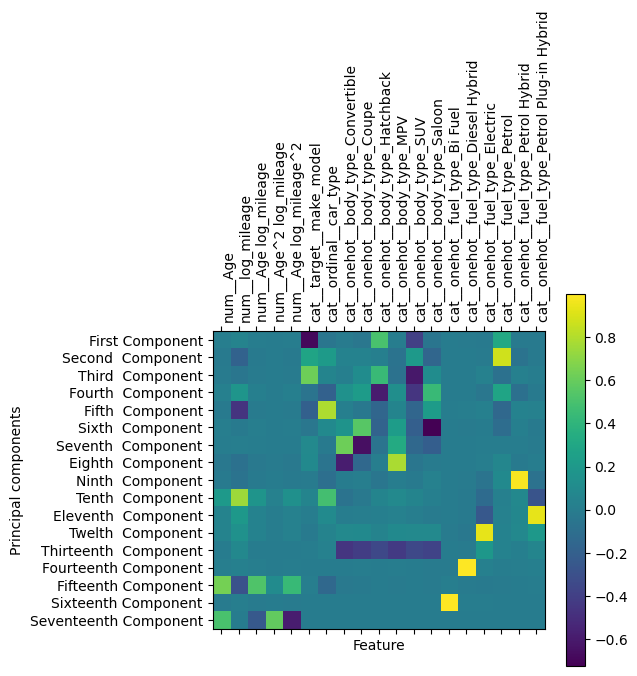

In [557]:
# Show contribution of each feature on each component
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1, 2, 3,4,5,6,7,8,9,10,11,12,13,14,15,16], ["First Component", "Second  Component", "Third  Component", "Fourth  Component", "Fifth  Component", "Sixth  Component", "Seventh  Component", "Eighth  Component", "Ninth  Component", "Tenth  Component", "Eleventh  Component", "Twelth  Component", "Thirteenth  Component","Fourteenth Component", "Fifteenth Component", "Sixteenth Component", "Seventeenth Component"])
plt.colorbar()
plt.xticks(range(len(sk_best_selected_feature_names)),
           sk_best_selected_feature_names, rotation=90, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components");

In [ ]:


model = XGBRegressor()



ref_selector = RFECV(estimator=model, step=1,  cv = 5, n_jobs=-1)
pca = PCA(random_state=42, n_components= 17 )

pipeline_XG = Pipeline([
    ('preprocessor_poly', preprocessor_poly),
    ('feature_selection', ref_selector),
    ('pca', pca),
    ('regressor', model)

])

pipeline_XG.fit(X_train, y_train)

In [ ]:
cvr = np.cumsum(pca.explained_variance_ratio_)
evr = pca.explained_variance_ratio_

pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
display(pca_df.head(40))

In [ ]:
selected_name = pipeline_XG.named_steps['feature_selection']
selected_mask = selected_name.get_support()
preprocessor_feature_names = pipeline_XG.named_steps['preprocessor_poly'].get_feature_names_out()
sk_best_selected_feature_names = preprocessor_feature_names[selected_mask]

In [ ]:
# Show contribution of each feature on each component
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1, 2, 3,4,5,6,7,8,9,10,11,12, 13, 14,15,16], ["First Component", "Second  Component", "Third  Component", "Fourth  Component", "Fifth  Component", "Sixth  Component", "Seventh  Component", "Eighth  Component", "Ninth  Component", "Tenth  Component", "Eleventh  Component", "Twelth  Component", "Thirteenth  Component","Fourteen Component", "Fifteen Component", "Sixteen Component", "Seventeen Component"])
plt.colorbar()
plt.xticks(range(len(sk_best_selected_feature_names)),
           sk_best_selected_feature_names, rotation=90, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components");

In [ ]:
from sklearn.model_selection import cross_val_score
cv_results_pca_selected_XG = cross_val_score(pipeline_XG, X_train, y_train, cv=5)

In [ ]:
cv_results_pca_selected_XG

In [434]:
from sklearn.metrics import r2_score
# r2_value=[]
# mse_values = []
# mae_values=[]
#MSE
XG_mse = mean_squared_error((y_test), (pipeline_XG.predict(X_test)))
mse_values.append(XG_mse)
#MAE
XG_mae = mean_absolute_error((y_test), (pipeline_XG.predict(X_test)))
mae_values.append(XG_mae)
#R2
XG_r2 = r2_score((y_test), (pipeline_XG.predict(X_test)))
r2_value.append(XG_r2)


In [435]:
r2_value, mse_values, mae_values

([0.8581597520171447, 0.9286927395540499],
 [0.10306743834314368, 0.05181502975318975],
 [0.23008789951443887, 0.1569569588330138])

In [ ]:
from sklearn.metrics import PredictionErrorDisplay
PredictionErrorDisplay.from_estimator(
    pipeline, X_test, y_test, kind="actual_vs_predicted", scatter_kwargs=dict(alpha=0.5, color='green')
);
plt.title("XG Boosting Regressor Actual vs Predicted on Test Set")
plt.show()

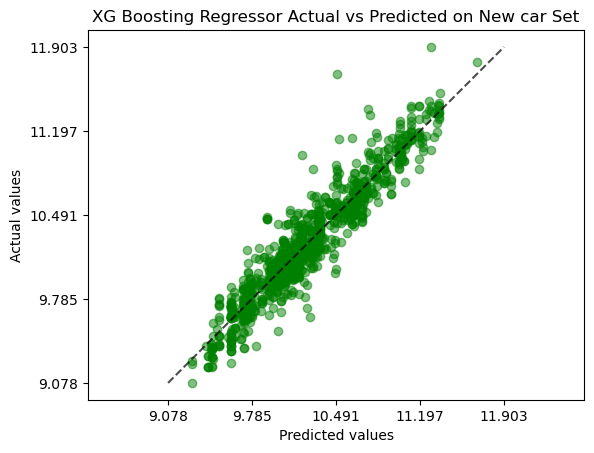

In [509]:
# //New car 
from sklearn.metrics import PredictionErrorDisplay
PredictionErrorDisplay.from_estimator(
    pipeline_XG, X_test, y_test, kind="actual_vs_predicted", scatter_kwargs=dict(alpha=0.5, color='green')
);
plt.title("XG Boosting Regressor Actual vs Predicted on New car Set")
plt.show()

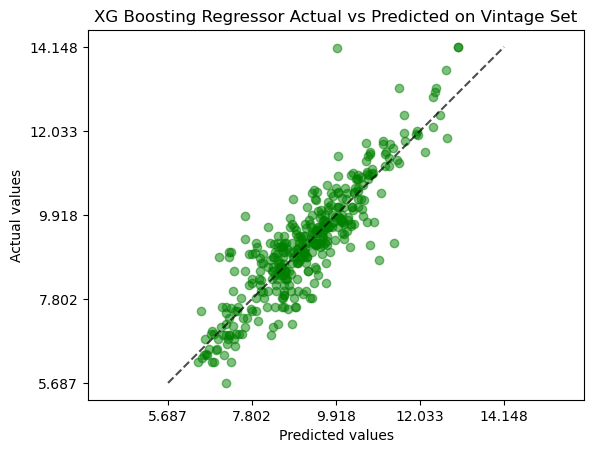

In [418]:
from sklearn.metrics import PredictionErrorDisplay
PredictionErrorDisplay.from_estimator(
    pipeline_XG, X_test, y_test, kind="actual_vs_predicted", scatter_kwargs=dict(alpha=0.5, color='green')
);
plt.title("XG Boosting Regressor Actual vs Predicted on Vintage Set")
plt.show()

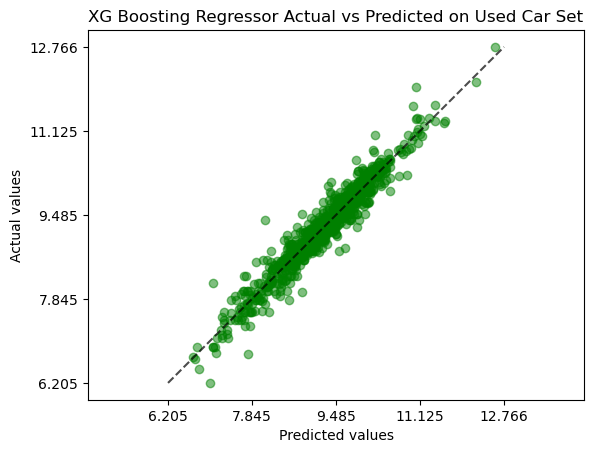

In [387]:
from sklearn.metrics import PredictionErrorDisplay
PredictionErrorDisplay.from_estimator(
    pipeline_XG, X_test, y_test, kind="actual_vs_predicted", scatter_kwargs=dict(alpha=0.5, color='green')
);
plt.title("XG Boosting Regressor Actual vs Predicted on Used Car Set")
plt.show()

In [ ]:

PredictionErrorDisplay.from_estimator(
    pipeline_XG, X_test, y_test, kind="residual_vs_predicted", scatter_kwargs=dict(alpha=0.5, color='green')
);
plt.title("XG Boosting Regressor Residual vs Predicted on Test set")
plt.show()

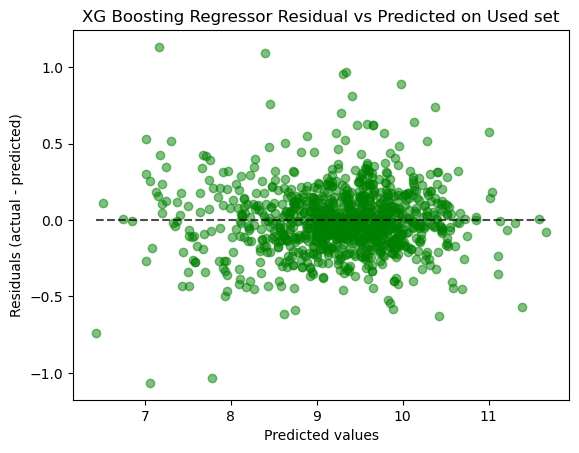

In [391]:
PredictionErrorDisplay.from_estimator(
    pipeline_XG, X_test, y_test, kind="residual_vs_predicted", scatter_kwargs=dict(alpha=0.5, color='green')
);
plt.title("XG Boosting Regressor Residual vs Predicted on Used set")
plt.show()

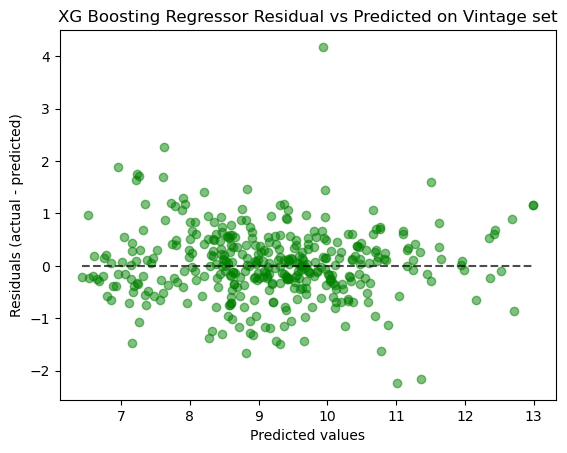

In [420]:

PredictionErrorDisplay.from_estimator(
    pipeline_XG, X_test, y_test, kind="residual_vs_predicted", scatter_kwargs=dict(alpha=0.5, color='green')
);
plt.title("XG Boosting Regressor Residual vs Predicted on Vintage set")
plt.show()

In [ ]:
fea_model_sample= fea_model.sample(frac=0.01)
# Defining  features and target variable
X = fea_model_sample.drop(['log_price'], axis=1)
y = fea_model_sample['log_price']
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV


param_grid = {
    'regressor__learning_rate': [0.01, 0.1],
    'regressor__max_depth': [3, 5, 7],

}

# Initialize GridSearchCV with the pipeline and parameter grid
grid_search_XG = GridSearchCV(pipeline, param_grid, cv=2, scoring='neg_mean_squared_error')

# Fit the grid search object to the training data
grid_search_XG.fit(X_train, y_train)

In [ ]:
results_df = pd.DataFrame(grid_search_XG.cv_results_)
results_df

In [ ]:
best_estimator = grid_search_XG.best_estimator_

In [465]:

from sklearn.model_selection import cross_validate
scoring_metrics = {'MAE': 'neg_mean_absolute_error', 'MSE': 'neg_mean_squared_error', 'R2': 'r2'}
cv_results_XG= cross_validate(
    pipeline_XG, X_train, y_train, cv=5,
    scoring=scoring_metrics,
    return_train_score=True
)

In [466]:
cv_results_XG

{'fit_time': array([439.15830255, 376.93562675, 365.68625474, 388.57791662,
        386.87590861]),
 'score_time': array([0.24349928, 0.24436545, 0.39772606, 0.33826017, 0.31456542]),
 'test_MAE': array([-0.15659074, -0.16156959, -0.17561423, -0.15844133, -0.15573325]),
 'train_MAE': array([-0.14896014, -0.1552111 , -0.16795719, -0.15198342, -0.14861445]),
 'test_MSE': array([-0.05307433, -0.05512413, -0.06568891, -0.05317049, -0.05308044]),
 'train_MSE': array([-0.04431076, -0.04764854, -0.05537916, -0.04597471, -0.04421986]),
 'test_R2': array([0.92781257, 0.92386025, 0.91078104, 0.92677082, 0.92799507]),
 'train_R2': array([0.93937392, 0.93505709, 0.92420326, 0.9372934 , 0.93945772])}

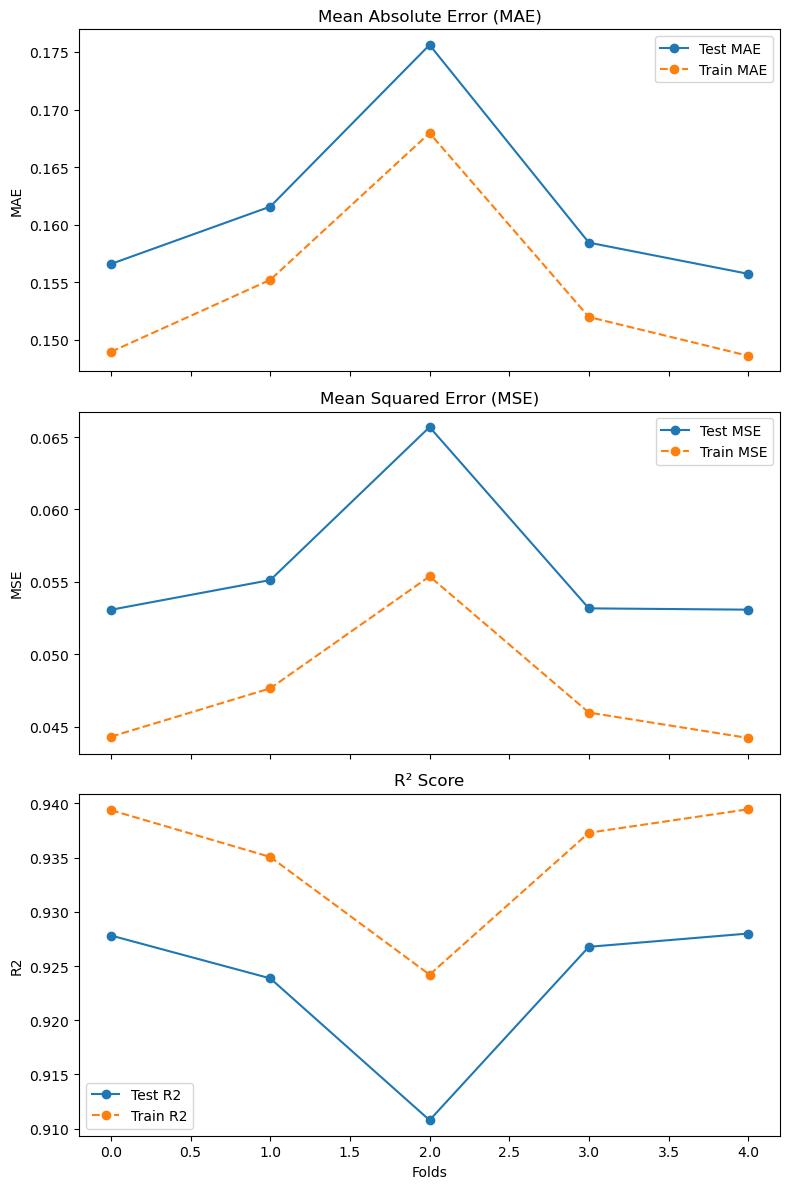

In [469]:
# Convert negative MSE and MAE to positive for plotting
cv_results_XG['test_MAE'] = [-x for x in cv_results_XG['test_MAE']]
cv_results_XG['train_MAE'] = [-x for x in cv_results_XG['train_MAE']]
cv_results_XG['test_MSE'] = [-x for x in cv_results_XG['test_MSE']]
cv_results_XG['train_MSE'] = [-x for x in cv_results_XG['train_MSE']]

# Set up the matplotlib figure and axes
fig, axs = plt.subplots(3, 1, figsize=(8, 12), sharex=True)

# Titles for each subplot
titles = ['Mean Absolute Error (MAE)', 'Mean Squared Error (MSE)', 'R² Score']

# Metrics to plot
metrics = ['MAE', 'MSE', 'R2']

for i, metric in enumerate(metrics):
    axs[i].plot(cv_results_XG[f'test_{metric}'], label=f'Test {metric}', marker='o', linestyle='-')
    axs[i].plot(cv_results_XG[f'train_{metric}'], label=f'Train {metric}', marker='o', linestyle='--')
    axs[i].set_title(titles[i])
    axs[i].set_ylabel(metric)
    axs[i].legend()

# Common xlabel
axs[-1].set_xlabel('Folds')

plt.tight_layout()
plt.show()

# Using PCA on Entire Dataset (Random Forest)

In [537]:
X = vintage_car.drop(["log_price"], axis=1)
y = vintage_car["log_price"]
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [745]:
X = fea_model.drop(['log_price'], axis=1)

y = fea_model['log_price']




In [747]:
#splitting the data into train and test and validation
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor

model =  RandomForestRegressor(n_jobs=-1)

ref_selector = RFECV(estimator=model, step=1,  cv = 5, n_jobs=-1)
pca = PCA(random_state=42,  n_components=27)


pipeline_RF= Pipeline([
    ('preprocessor_poly', preprocessor_poly),
    ('feature_selection', ref_selector),
    ('pca', pca),
    ('regressor', model)

])



In [ ]:
pipeline_RF.fit(X_train, y_train)

In [ ]:
pipeline_RF.score(X_train, y_train), pipeline_RF.score(X_test,y_test)

In [ ]:

from sklearn.model_selection import cross_validate
scoring_metrics = {'MAE': 'neg_mean_absolute_error'}
cv_results_pca_entire_RF= cross_validate(
    pipeline_RF, X_train, y_train, cv=5,
    scoring=scoring_metrics,
    return_train_score=True, n_jobs =-1
)

In [ ]:
cv_results_pca_entire_RF

In [ ]:
cvr = np.cumsum(pca.explained_variance_ratio_)
evr = pca.explained_variance_ratio_

pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
display(pca_df.head(40))

In [ ]:
selected_name = pipeline_RF.named_steps['feature_selection']
selected_mask = selected_name.get_support()
preprocessor_feature_names = pipeline_RF.named_steps['preprocessor_poly'].get_feature_names_out()
sk_best_selected_feature_names = preprocessor_feature_names[selected_mask]

In [ ]:
# Show contribution of each feature on each component
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1, 2, 3,4,5,6,7,8,9,10,11,12], ["First Component", "Second  Component", "Third  Component", "Fourth  Component", "Fifth  Component", "Sixth  Component", "Seventh  Component", "Eighth  Component", "Ninth  Component", "Tenth  Component", "Eleventh  Component", "Twelth  Component", "Thirteenth  Component"])
plt.colorbar()
plt.xticks(range(len(sk_best_selected_feature_names)),
           sk_best_selected_feature_names, rotation=90, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components");

In [ ]:
cvr = np.cumsum(pca.explained_variance_ratio_)
evr = pca.explained_variance_ratio_

pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
display(pca_df.head(40))

In [ ]:
selected_name = pipeline.named_steps['feature_selection']
selected_mask = selected_name.get_support()
preprocessor_feature_names = pipeline_RF.named_steps['preprocessor_poly'].get_feature_names_out()
sk_best_selected_feature_names = preprocessor_feature_names[selected_mask]

In [ ]:
# Show contribution of each feature on each component
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1, 2, 3,4,5,6,7,8,9,10,11,12], ["First Component", "Second  Component", "Third  Component", "Fourth  Component", "Fifth  Component", "Sixth  Component", "Seventh  Component", "Eighth  Component", "Ninth  Component", "Tenth  Component", "Eleventh  Component", "Twelth  Component", "Thirteenth  Component"])
plt.colorbar()
plt.xticks(range(len(sk_best_selected_feature_names)),
           sk_best_selected_feature_names, rotation=90, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components");

In [ ]:

from sklearn.model_selection import cross_validate
scoring_metrics = {'MAE': 'neg_mean_absolute_error', 'MSE': 'neg_mean_squared_error', 'R2': 'r2'}
cv_results_pca_selected_RF= cross_validate(
    pipeline, X_train, y_train, cv=5,
    scoring=scoring_metrics,
    return_train_score=True
)

In [ ]:
cv_results_pca_selected_RF

In [ ]:
metrics = ['MAE', 'MSE', 'R2', 'Fit Time', 'Score Time']
mean_fit_time_pca_selected = np.mean(cv_results_pca_selected_RF['fit_time'])
mean_score_time_pca_selected = np.mean(cv_results_pca_selected_RF['score_time'])
mean_mae_pca_selected = -np.mean(cv_results_pca_selected_RF['test_MAE'])
mean_mse_pca_selected = -np.mean(cv_results_pca_selected_RF['test_MSE'])
mean_r2_pca_selected = np.mean(cv_results_pca_selected_RF['test_R2'])

mean_fit_time_pca_entire = np.mean(cv_results_pca_entire_RF['fit_time'])
mean_score_time_pca_entire = np.mean(cv_results_pca_entire_RF['score_time'])
mean_mae_pca_entire = -np.mean(cv_results_pca_entire_RF['test_MAE'])
mean_mse_pca_entire = -np.mean(cv_results_pca_entire_RF['test_MSE'])
mean_r2_pca_entire = np.mean(cv_results_pca_entire_RF['test_R2'])

pca_selected_scores = [mean_mae_pca_selected, mean_mse_pca_selected, mean_r2_pca_selected, mean_fit_time_pca_selected, mean_score_time_pca_selected]
pca_entire_scores = [mean_mae_pca_entire, mean_mse_pca_entire, mean_r2_pca_entire, mean_fit_time_pca_entire, mean_score_time_pca_entire]

plt.figure(figsize=(8, 6))

# Plotting the PCA selected features regression scores
plt.plot(metrics, pca_selected_scores, marker='o', linestyle='-', color='b', label='PCA Selected Features')

# Plotting the PCA entire features regression scores
plt.plot(metrics, pca_entire_scores, marker='s', linestyle='--', color='g', label='PCA Entire Features')

plt.title('Comparison of PCA Regression Models')
plt.ylabel('Scores')

plt.legend()
plt.grid(True)
plt.show()

In [ ]:
mean_r2_pca_entire, mean_r2_pca_selected

In [ ]:
from sklearn.metrics import r2_score
y_pred = pipeline_RF.predict(X_test)

r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

In [ ]:
pipeline_RF.score(X_train, y_train), pipeline_RF.score(X_test, y_test)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV



# Create the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
}

# Setup the grid search
grid_search_RF = GridSearchCV(estimator=pipeline_RF, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fit grid search to the data
grid_search_RF.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search_RF.best_params_
best_model = grid_search_RF.best_estimator_

print("Best parameters found: ", best_params)

In [ ]:
results_df = pd.DataFrame(grid_search_RF.cv_results_)
results_df

In [ ]:
best_estimator = grid_search_RF.best_estimator_

In [ ]:

from sklearn.model_selection import cross_validate
scoring_metrics = {'MAE': 'neg_mean_absolute_error', 'MSE': 'neg_mean_squared_error', 'R2': 'r2'}
cv_results_RF= cross_validate(
    best_estimator, X_train, y_train, cv=5,
    scoring=scoring_metrics,
    return_train_score=True
)

In [ ]:
cv_results_RF

In [438]:
RF_mse = mean_squared_error((y_test), (pipeline_RF.predict(X_test)))
mse_values.append(RF_mse)
#MAE
RF_mae = mean_absolute_error((y_test), (pipeline_RF.predict(X_test)))
mae_values.append(RF_mae)
#R2
RF_r2 = r2_score((y_test), (pipeline_RF.predict(X_test)))
r2_value.append(RF_r2)


In [439]:
r2_value, mse_values, mae_values

([0.8581597520171447, 0.9286927395540499, 0.9241577076756704],
 [0.10306743834314368, 0.05181502975318975, 0.05511038579744566],
 [0.23008789951443887, 0.1569569588330138, 0.15579928257884393])

In [ ]:
from sklearn.metrics import PredictionErrorDisplay
PredictionErrorDisplay.from_estimator(
    pipeline_RF, X_test, y_test, kind="actual_vs_predicted", scatter_kwargs=dict(alpha=0.5, color='red')
);
plt.title("Random Forest Actual vs Predicted on Test Set")
plt.show()

In [ ]:

PredictionErrorDisplay.from_estimator(
    pipeline_RF, X_test, y_test, kind="residual_vs_predicted", scatter_kwargs=dict(alpha=0.5, color='green')
);
plt.title("Random Forest Residual vs Predicted on Test set")
plt.show()

In [ ]:
pipeline_RF

# Stacking Ensemble

In [ ]:
preprocessor_poly = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer_poly, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ], remainder='passthrough')


In [ ]:
# from sklearn.pipeline import Pipeline
# from sklearn.feature_selection import RFE
# from sklearn.feature_selection import RFECV
# from sklearn.linear_model import LinearRegression
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.decomposition import PCA

# from sklearn.model_selection import cross_validate
# from sklearn.tree import DecisionTreeRegressor


# model = LinearRegression(n_jobs=-1)

# ref_selector = RFECV(estimator=model, step=1,  cv = 5, n_jobs=-1)
# pca = PCA(random_state=42)

# pipeline_ES_LR = Pipeline([
#     ('preprocessor_poly', preprocessor_poly),
#     ('feature_selection', ref_selector),
#     ('pca', pca),
#     ('regressor', LinearRegression())

# ])


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.tree import DecisionTreeRegressor

model =  RandomForestRegressor(n_jobs=-1)

ref_selector = RFECV(estimator=model, step=1,  cv = 5, n_jobs=-1)
pca = PCA(random_state=42, n_components=27)


pipeline__ES_RF= Pipeline([
    ('preprocessor_poly', preprocessor_poly),
    ('feature_selection', ref_selector),
    ('pca', pca),
    ('regressor', model)

])


In [ ]:
!pip install xgboost
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeRegressor
from sklearn.decomposition import PCA
# from xgboost import XGBRegressor
import xgboost as xgb

model = xgb.XGBRegressor( n_jobs=-1)
ref_selector = RFECV(estimator=model, step=1,  cv = 5, n_jobs=-1)
pca = PCA(random_state=42 )

pipeline_ES_XG = Pipeline([
    ('preprocessor_poly', preprocessor_poly),
    ('feature_selection', ref_selector),
    ('pca', pca),
    ('regressor', model)

])



In [ ]:
###This Performs well
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression

# Stacking ensemble setup
stacking_ensemble = StackingRegressor(
    estimators=[
        ('pipeline_ES_LR', pipeline_ES_LR),
        ('pipeline_ES_XG', pipeline_ES_XG)
        
    ],
    final_estimator=LinearRegression(),
    cv=3
)
stacking_ensemble.fit(X_train, y_train)

In [361]:
stacking_ensemble.score(X_train,y_train) , stacking_ensemble.score(X_test,y_test)

(0.9383057632857098, 0.9279080596305678)

In [408]:
from sklearn.model_selection import cross_val_score
cv_results_ensemble = cross_val_score(stacking_ensemble, X_train, y_train, cv=5)

In [409]:
cv_results_ensemble

array([0.92874521, 0.92354041, 0.92745126, 0.92547959, 0.92847784])

In [412]:
stacking_ensemble.score(X_train,y_train) , stacking_ensemble.score(X_test,y_test)

(0.9383057632857098, 0.9279080596305678)

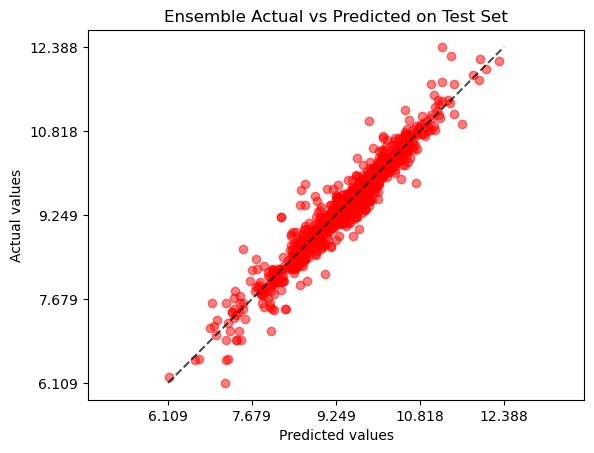

In [363]:
from sklearn.metrics import PredictionErrorDisplay
PredictionErrorDisplay.from_estimator(
    stacking_ensemble, X_test, y_test, kind="actual_vs_predicted", scatter_kwargs=dict(alpha=0.5, color='red')
);
plt.title("Ensemble Actual vs Predicted on Test Set")
plt.show()

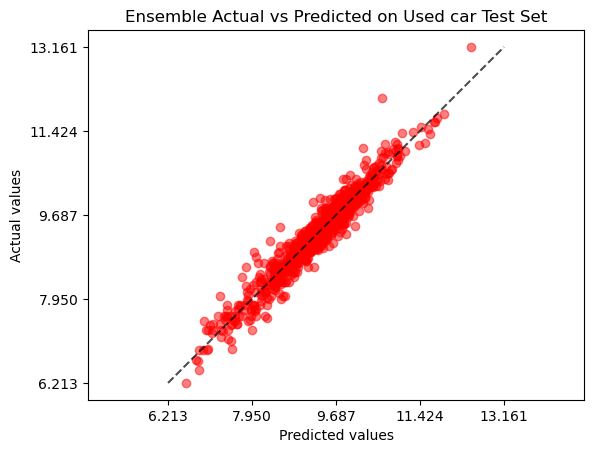

In [397]:
from sklearn.metrics import PredictionErrorDisplay
PredictionErrorDisplay.from_estimator(
    stacking_ensemble, X_test, y_test, kind="actual_vs_predicted", scatter_kwargs=dict(alpha=0.5, color='red')
);
plt.title("Ensemble Actual vs Predicted on Used car Test Set")
plt.show()

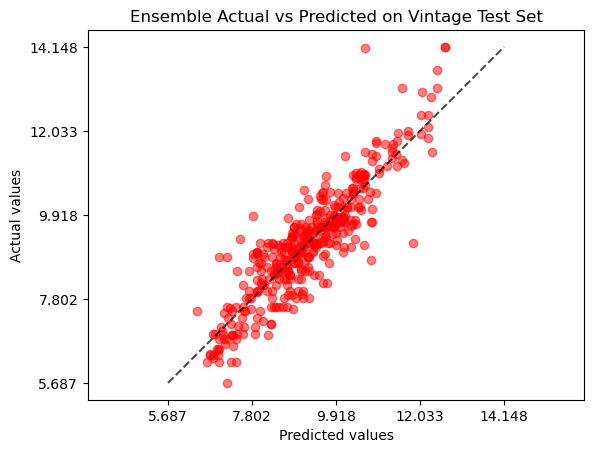

In [355]:
from sklearn.metrics import PredictionErrorDisplay
PredictionErrorDisplay.from_estimator(
    stacking_ensemble_GB, X_test, y_test, kind="actual_vs_predicted", scatter_kwargs=dict(alpha=0.5, color='red')
);
plt.title("Ensemble Actual vs Predicted on Vintage Test Set")
plt.show()

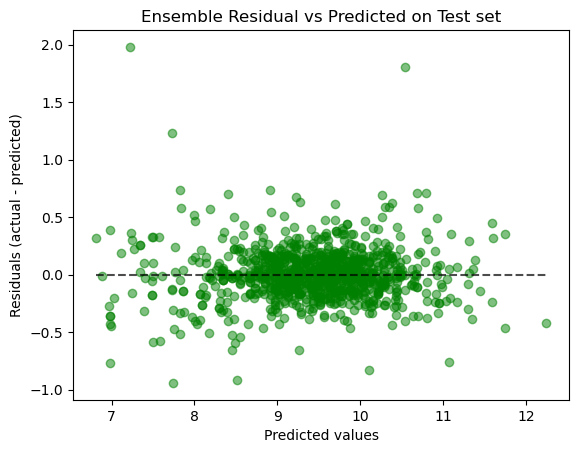

In [365]:
PredictionErrorDisplay.from_estimator(
    stacking_ensemble_GB, X_test, y_test, kind="residual_vs_predicted", scatter_kwargs=dict(alpha=0.5, color='green')
);
plt.title("Ensemble Residual vs Predicted on Test set")
plt.show()

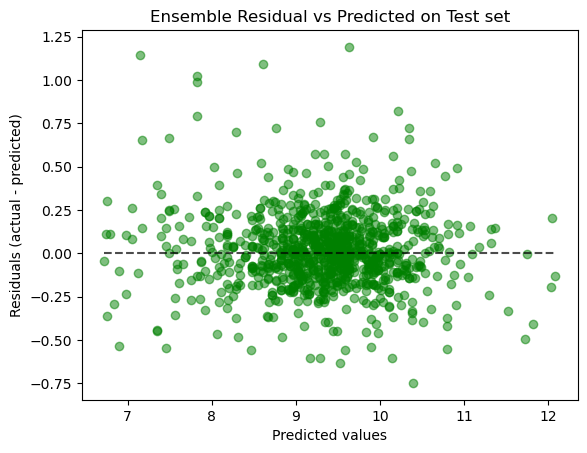

In [399]:
PredictionErrorDisplay.from_estimator(
    stacking_ensemble_GB, X_test, y_test, kind="residual_vs_predicted", scatter_kwargs=dict(alpha=0.5, color='green')
);
plt.title("Ensemble Residual vs Predicted on Test set")
plt.show()

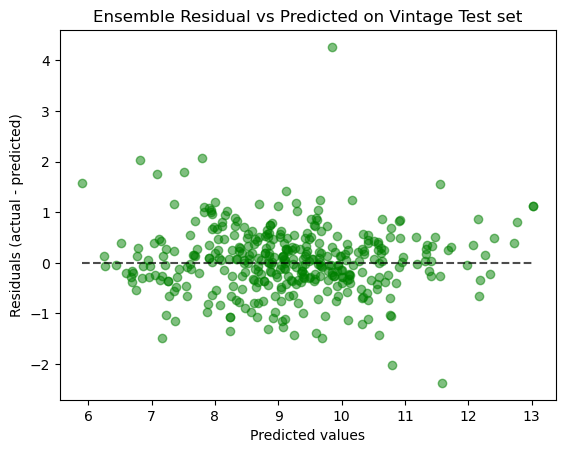

In [353]:
PredictionErrorDisplay.from_estimator(
    stacking_ensemble, X_test, y_test, kind="residual_vs_predicted", scatter_kwargs=dict(alpha=0.5, color='green')
);
plt.title("Ensemble Residual vs Predicted on Vintage Test set")
plt.show()

In [261]:
from sklearn.ensemble import GradientBoostingRegressor

# Revised Stacking ensemble setup with a different final estimator
stacking_ensemble_GB = StackingRegressor(
    estimators=[
        ('pipeline_ES_LR', pipeline_ES_LR),
        ('pipeline_ES_XG', pipeline_ES_XG)
    ],
    final_estimator=GradientBoostingRegressor(),
    cv=3
)

# Fit and evaluate the ensemble
stacking_ensemble_GB.fit(X_train, y_train)
print("Revised Stacking Ensemble Score:", stacking_ensemble_GB.score(X_train, y_train))

Revised Stacking Ensemble Score: 0.9376012763908323


In [414]:
stacking_ensemble_GB.score(X_train,y_train),stacking_ensemble_GB.score(X_test, y_test)

(0.9376012763908323, 0.9281561927630235)

In [375]:
stacking_ensemble_GB.score(X_test, y_test), stacking_ensemble.score(X_test, y_test)

(0.793384058300235, 0.794833642654757)

In [377]:
stacking_ensemble_GB.score(X_train, y_train), stacking_ensemble.score(X_train, y_train)

(0.825698664936918, 0.8318045498925343)

In [279]:
stacking_ensemble_GB.score(X_val, y_val),stacking_ensemble.score(X_val, y_val)

(0.8270516359573108, 0.8407275903561431)

In [442]:
stack_mse = mean_squared_error((y_test), (stacking_ensemble.predict(X_test)))
mse_values.append(stack_mse)
#MAE
stack_mae = mean_absolute_error((y_test), (stacking_ensemble.predict(X_test)))
mae_values.append(stack_mae)
#R2
stack_r2 = r2_score((y_test), (stacking_ensemble.predict(X_test)))
r2_value.append(stack_r2)

In [444]:
r2_value, mse_values, mae_values

([0.8581597520171447,
  0.9286927395540499,
  0.9241577076756704,
  0.9279080596305678],
 [0.10306743834314368,
  0.05181502975318975,
  0.05511038579744566,
  0.052385213116393964],
 [0.23008789951443887,
  0.1569569588330138,
  0.15579928257884393,
  0.1573566913391512])

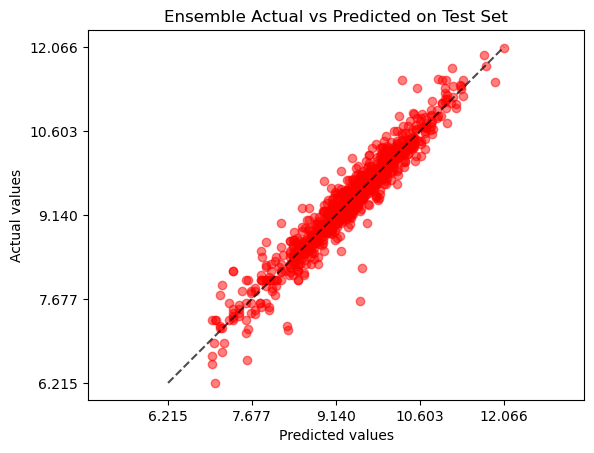

In [329]:
from sklearn.metrics import PredictionErrorDisplay
PredictionErrorDisplay.from_estimator(
    stacking_ensemble_GB, X_test, y_test, kind="actual_vs_predicted", scatter_kwargs=dict(alpha=0.5, color='red')
);
plt.title("Ensemble Actual vs Predicted on Test Set")
plt.show()

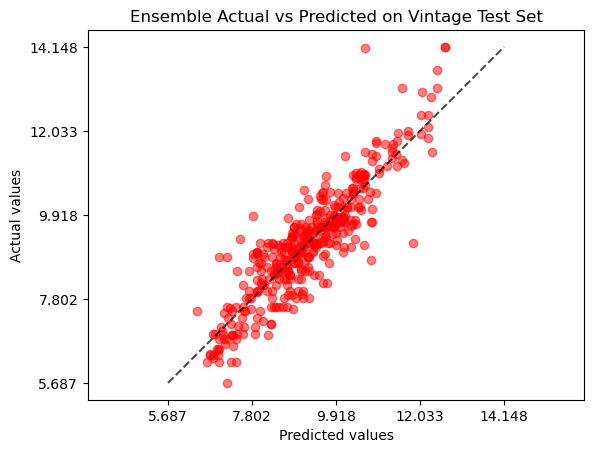

In [335]:
from sklearn.metrics import PredictionErrorDisplay
PredictionErrorDisplay.from_estimator(
    stacking_ensemble_GB, X_test, y_test, kind="actual_vs_predicted", scatter_kwargs=dict(alpha=0.5, color='red')
);
plt.title("Ensemble Actual vs Predicted on Vintage Test Set")
plt.show()

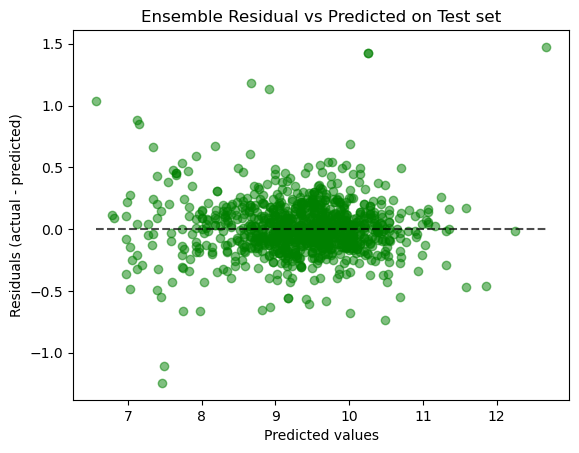

In [330]:
PredictionErrorDisplay.from_estimator(
    stacking_ensemble_GB, X_test, y_test, kind="residual_vs_predicted", scatter_kwargs=dict(alpha=0.5, color='green')
);
plt.title("Ensemble Residual vs Predicted on Test set")
plt.show()

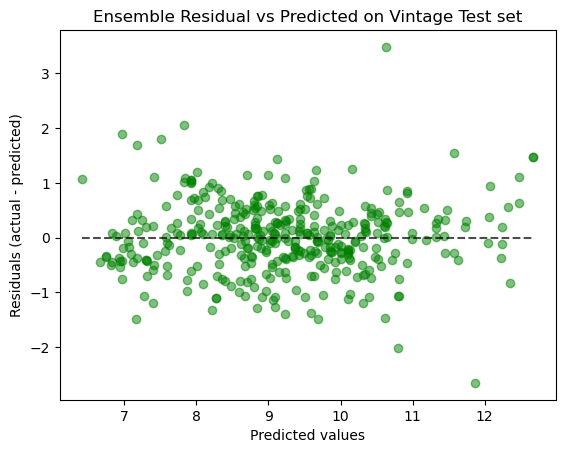

In [337]:
PredictionErrorDisplay.from_estimator(
    stacking_ensemble_GB, X_test, y_test, kind="residual_vs_predicted", scatter_kwargs=dict(alpha=0.5, color='green')
);
plt.title("Ensemble Residual vs Predicted on Vintage Test set")
plt.show()

# Vintage on Xg boost

In [286]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeRegressor
from sklearn.decomposition import PCA
from xgboost import XGBRegressor
import xgboost as xgb





model = XGBRegressor(n_jobs=-1)
estimator = XGBRegressor(n_jobs=-1)
ref_selector = RFECV(estimator=model, step=1, cv =5 , scoring='neg_mean_squared_error' , n_jobs=-1)
pca = PCA(random_state=42)

pipeline_XG_vintage = Pipeline([
    ('preprocessor_poly', preprocessor_poly),
    ('feature_selection', ref_selector),
    ('pca', pca),
    ('regressor', estimator)
])

pipeline_XG.fit(X_train, y_train)

Pipeline(steps=[('preprocessor_poly',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler()),
                                                                  ('poly',
                                                                   PolynomialFeatures(degree=3,
                                                                                      include_bias=False))]),
                                                  ['Age', 'log_mileage']),
                                                 ('cat',
                                                  ColumnTransformer(remainder='passthrough',
                                                                    transformers=[('target',
                                                                                   TargetEncoder(),
                                                                                   ['make_model']),
                                                                                  ('ordinal',
                                                                                   OrdinalEnc...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=-1,
                              num_parallel_tree=None, random_state=None, ...))])

In [290]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor


model = XGBRegressor(n_jobs=-1)

param_grid = {
    'regressor__max_depth': [3, 5, 7, 9],
    'regressor__min_child_weight': [1, 3, 5],
    'regressor__gamma': [0.1, 0.2, 0.3],
    'regressor__subsample': [0.6, 0.8, 1.0],
    'regressor__colsample_bytree': [0.6, 0.8, 1.0],
    'regressor__learning_rate': [0.01, 0.1, 0.2],
    'regressor__n_estimators': [100, 200, 300]
}


grid_search = GridSearchCV(estimator=pipeline_XG_vintage, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3, verbose=1, n_jobs=-1)


grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)


Fitting 3 folds for each of 2916 candidates, totalling 8748 fits


KeyboardInterrupt: 

In [ ]:
# Extracting results into a DataFrame
results = pd.DataFrame(grid_search.cv_results_)

# Selecting only the relevant columns to display
results = results[['param_n_estimators', 'param_learning_rate', 'param_max_depth', 
                   'param_min_child_weight', 'param_subsample', 'param_colsample_bytree', 
                   'param_gamma', 'mean_test_score', 'rank_test_score']]

# Sort results by the rank of the test score
results_sorted = results.sort_values(by="rank_test_score")

print(results_sorted)

# Model Evaluation

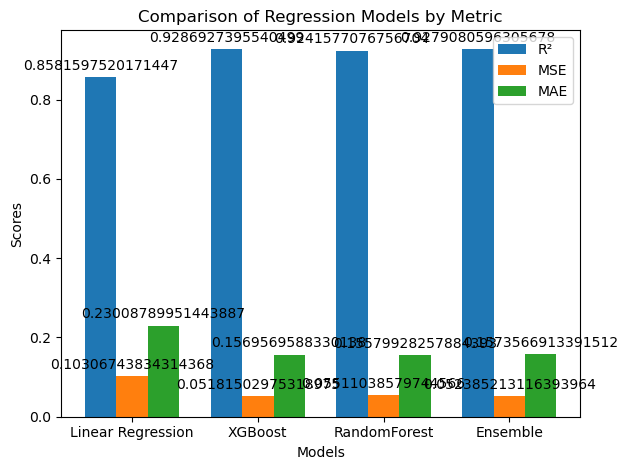

In [449]:
import numpy as np
import matplotlib.pyplot as plt


models = ['Linear Regression', 'XGBoost', 'RandomForest', 'Ensemble']

x = np.arange(len(models))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, r2_value, width, label='R²')
rects2 = ax.bar(x, mse_values, width, label='MSE')
rects3 = ax.bar(x + width, mae_values, width, label='MAE')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Regression Models by Metric')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Function to attach a text label above each bar, displaying its height.
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()


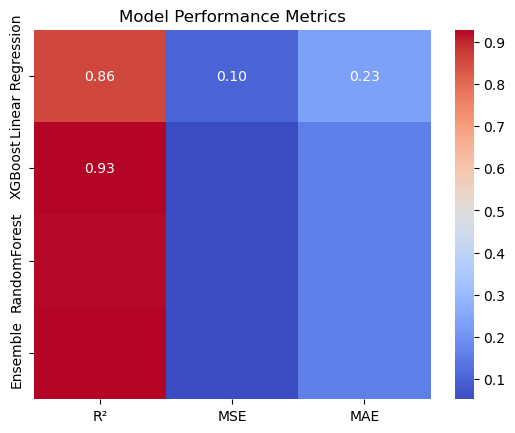

In [451]:
data = pd.DataFrame({
    "R²": r2_value,
    "MSE": mse_values,
    "MAE": mae_values
}, index=['Linear Regression', 'XGBoost', 'RandomForest', 'Ensemble'])

sns.heatmap(data, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Model Performance Metrics')
plt.show()

<Axes: >

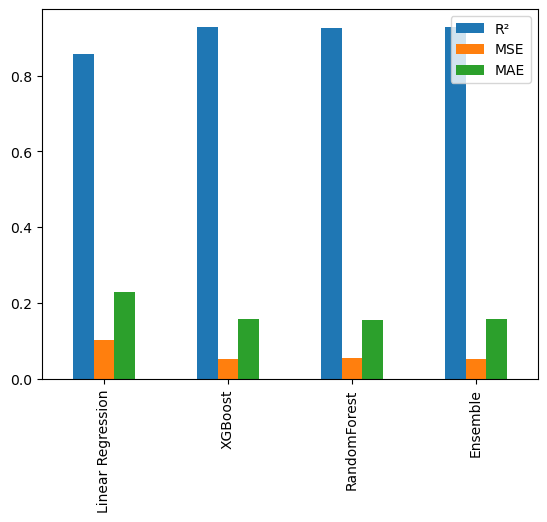

In [459]:
data.plot(kind="bar")

In [461]:
data

R²       MSE       MAE
Linear Regression  0.858160  0.103067  0.230088
XGBoost            0.928693  0.051815  0.156957
RandomForest       0.924158  0.055110  0.155799
Ensemble           0.927908  0.052385  0.157357

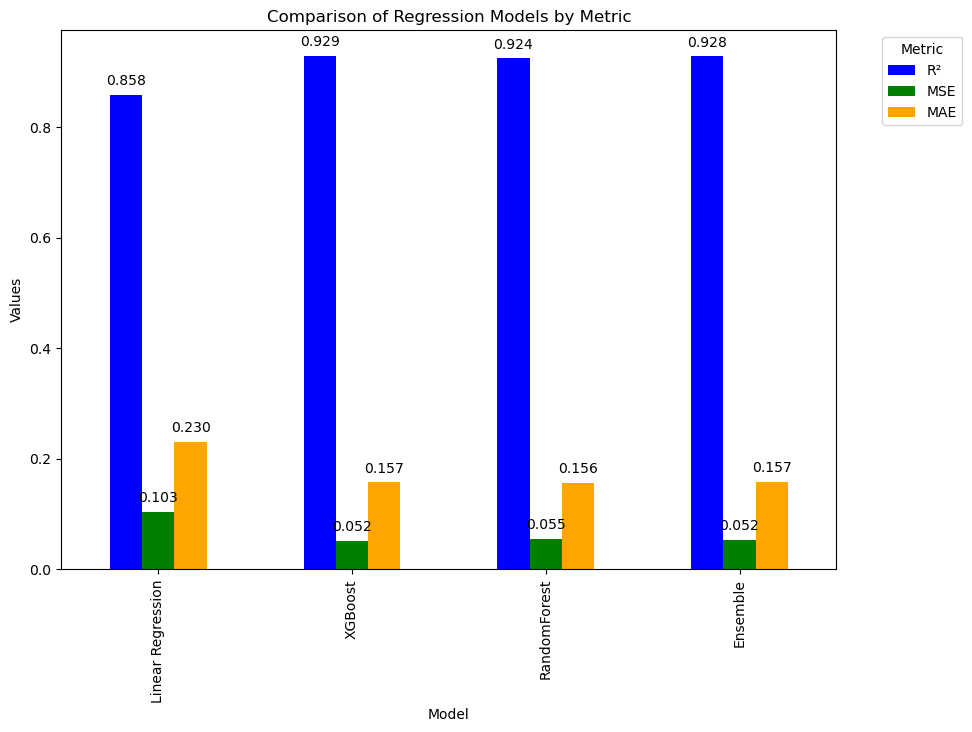

In [463]:
ax = data.plot(kind='bar', figsize=(10, 7), color=['blue', 'green', 'orange'])


for p in ax.patches:
    ax.annotate(format(p.get_height(), '.3f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')

ax.legend(title='Metric', bbox_to_anchor=(1.05, 1), loc='upper left')

# Setting labels and title
plt.xlabel('Model')
plt.ylabel('Values')
plt.title('Comparison of Regression Models by Metric')

plt.show()

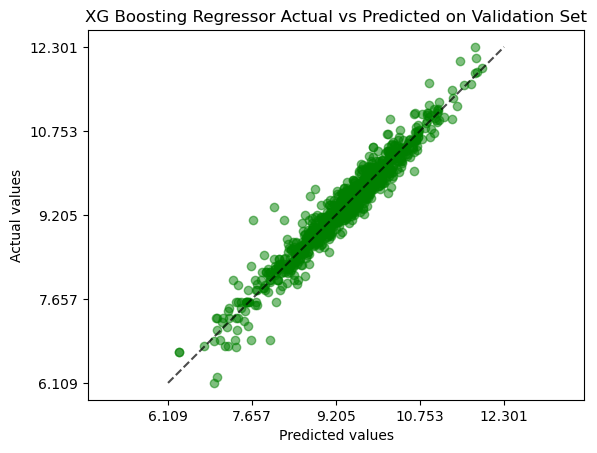

In [475]:
from sklearn.metrics import PredictionErrorDisplay
PredictionErrorDisplay.from_estimator(
    pipeline_XG, X_test, y_test, kind="actual_vs_predicted", scatter_kwargs=dict(alpha=0.5, color='green')
);
plt.title("XG Boosting Regressor Actual vs Predicted on Validation Set")
plt.show()

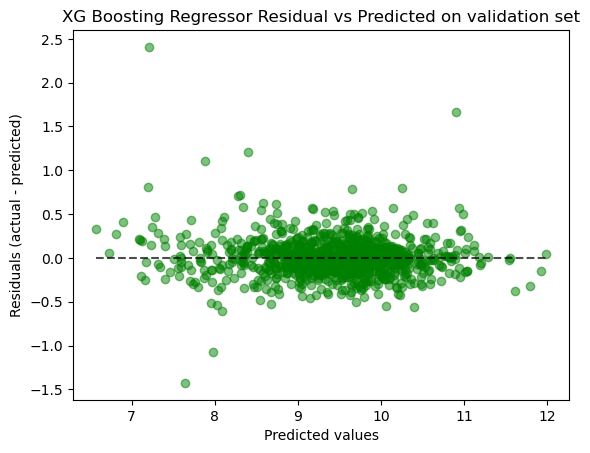

In [477]:
PredictionErrorDisplay.from_estimator(
    pipeline_XG, X_test, y_test, kind="residual_vs_predicted", scatter_kwargs=dict(alpha=0.5, color='green')
);
plt.title("XG Boosting Regressor Residual vs Predicted on validation set")
plt.show()

In [519]:
y_pred_log = pipeline_XG.predict(X_val)
y_test_original = np.exp(y_val)
y_pred_original = np.exp(y_pred_log)

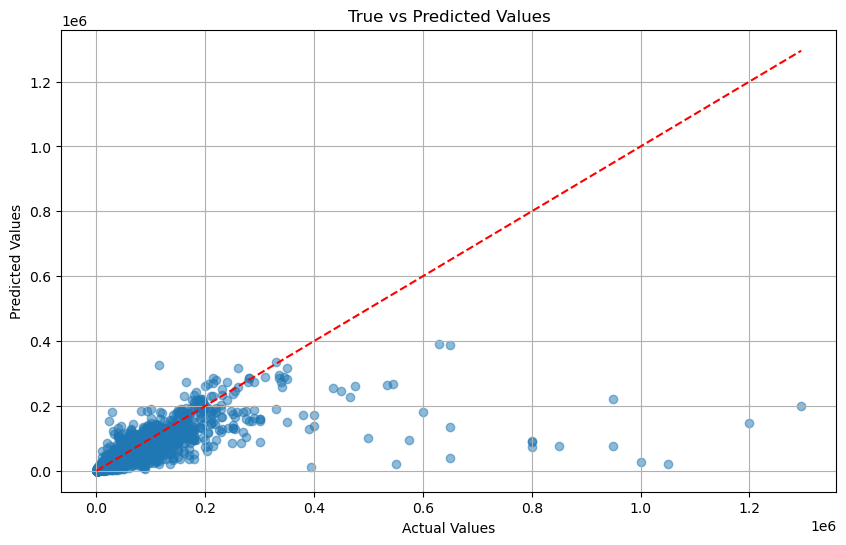

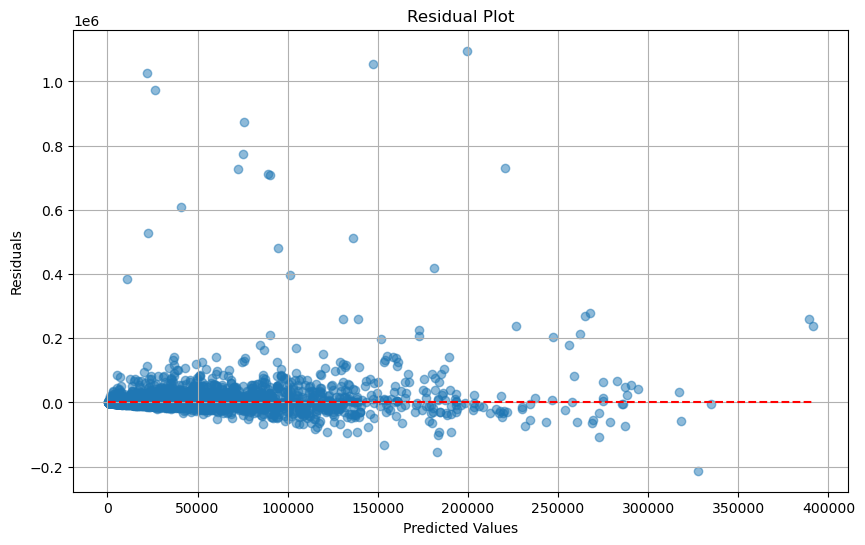

In [521]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test_original, y_pred_original, alpha=0.5)
plt.plot([min(y_test_original), max(y_test_original)], [min(y_test_original), max(y_test_original)], 'r--')  # Ideal line
plt.title('True vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

# Residual Plot
residuals = y_test_original - y_pred_original
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_original, residuals, alpha=0.5)
plt.hlines(0, min(y_pred_original), max(y_pred_original), colors='red', linestyles='dashed')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

In [495]:
r2_score(y_test_original, y_pred_original)

0.6340919316173168

In [493]:
y_val

359523    10.275051
62338      8.730690
312881     8.759041
253665     9.528794
230474     9.432684
            ...    
284737     9.808352
37285      8.853665
46202      7.489971
309036     9.472320
167511     9.936052
Name: log_price, Length: 60249, dtype: float64

In [497]:
y_pred_log = pipeline_RF.predict(X_val)
y_test_original = np.exp(y_val)
y_pred_original = np.exp(y_pred_log)
r2_score(y_test_original, y_pred_original)

0.6126131991368711

In [499]:
y_pred_log = stacking_ensemble.predict(X_val)
y_test_original = np.exp(y_val)
y_pred_original = np.exp(y_pred_log)
r2_score(y_test_original, y_pred_original)

0.6442571513021577

In [501]:
y_pred_log = pipeline_LR.predict(X_val)
y_test_original = np.exp(y_val)
y_pred_original = np.exp(y_pred_log)
r2_score(y_test_original, y_pred_original)

-14.55317679314813

In [529]:
pipeline_XG.score(X_train,y_train)# New car

0.9025306657214608

In [535]:
pipeline_XG.score(X_train,y_train)#Used car

0.9321934357039031

In [539]:
pipeline_XG.score(X_train,y_train) #vintage car

0.8324941166150353

# Shap 

In [749]:
!pip install shap
import shap

shap.initjs()

model = pipeline_XG.named_steps['regressor']

X_transformed = pipeline_XG[:-1].transform(X_train)

explainer = shap.Explainer(model, X_transformed)

100%|===================| 281036/281160 [22:09<00:00]        

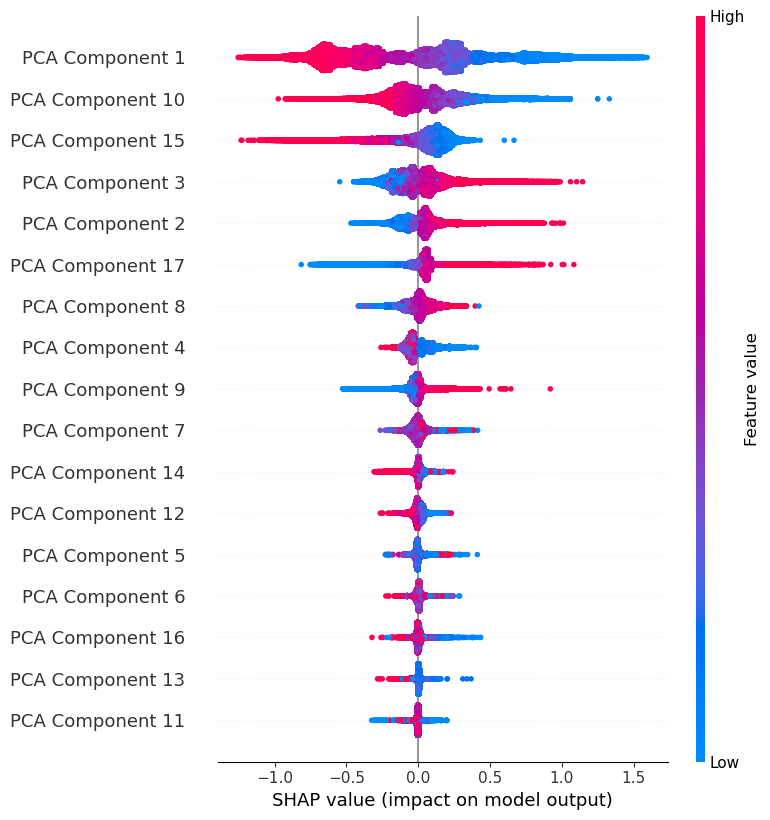

In [750]:
# Create the SHAP explainer using the XGBoost model from the pipeline
explainer = shap.Explainer(model, X_transformed)

# Calculate SHAP values
shap_values = explainer(X_transformed)

# Feature names as PCA components
feature_names = [f"PCA Component {i+1}" for i in range(pca.n_components)]

# Plot summary of SHAP values
shap.summary_plot(shap_values, X_transformed, feature_names=feature_names)

In [658]:
pca_df

num__Age  num__log_mileage  num__Age log_mileage  \
PC 1   0.010934          0.045549              0.008754   
PC 2  -0.013411         -0.180343             -0.012034   
PC 3  -0.007999         -0.044166             -0.006954   
PC 4   0.025848          0.173288              0.020878   
PC 5  -0.013367         -0.462726             -0.009645   
PC 6   0.014537         -0.015818              0.011772   
PC 7   0.004936          0.014756              0.003627   
PC 8  -0.036248         -0.083522             -0.029845   
PC 9  -0.023712         -0.065982             -0.020584   
PC 10  0.199307          0.746938              0.167416   
PC 11  0.045707          0.197594              0.038201   
PC 12  0.046932          0.145512              0.038278   
PC 13 -0.000446          0.078623              0.001752   
PC 14  0.012797          0.024319              0.010619   
PC 15  0.642187         -0.287223              0.527418   
PC 16 -0.008454          0.009882             -0.006864   
PC 17  0.504952          0.002261             -0.244876   

       num__Age^2 log_mileage  num__Age log_mileage^2  \
PC 1                 0.000995                0.006995   
PC 2                 0.000052               -0.010483   
PC 3                -0.000563               -0.005945   
PC 4                 0.002793                0.016866   
PC 5                 0.003036               -0.006829   
PC 6                 0.002392                0.009548   
PC 7                 0.000908                0.002716   
PC 8                -0.005621               -0.024454   
PC 9                -0.003473               -0.017509   
PC 10                0.034454                0.138673   
PC 11                0.008410                0.031408   
PC 12                0.008301                0.031018   
PC 13                0.001375                0.002876   
PC 14                0.002745                0.008750   
PC 15                0.106512                0.439273   
PC 16               -0.000813               -0.005810   
PC 17                0.585417               -0.585090   

       cat__target__make_model  cat__ordinal__car_type  \
PC 1                 -0.688684               -0.049581   
PC 2                  0.281223                0.213265   
PC 3                  0.618912                0.056033   
PC 4                 -0.061423               -0.189644   
PC 5                 -0.194657                0.789207   
PC 6                 -0.042725                0.095782   
PC 7                  0.089620               -0.019788   
PC 8                  0.091514               -0.061287   
PC 9                 -0.006031               -0.092523   
PC 10                 0.053309                0.484574   
PC 11                 0.008824                0.097515   
PC 12                -0.020944                0.045522   
PC 13                 0.009343                0.035160   
PC 14                -0.002404                0.001701   
PC 15                 0.013783               -0.143368   
PC 16                 0.000987                0.000967   
PC 17                -0.000934               -0.000909   

       cat__onehot__body_type_Convertible  cat__onehot__body_type_Coupe  \
PC 1                            -0.009318                     -0.038691   
PC 2                             0.040358                      0.041177   
PC 3                             0.016602                      0.114902   
PC 4                             0.144873                      0.218980   
PC 5                             0.021863                     -0.035737   
PC 6                             0.163468                      0.549247   
PC 7                             0.621138                     -0.656122   
PC 8                            -0.584774                     -0.140872   
PC 9                             0.000643                      0.010218   
PC 10                           -0.066067                     -0.029301   
PC 11                            0.006849      

In [608]:
X = new_car.drop(["log_price"], axis=1)
y = new_car["log_price"]

In [610]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Shap analysis on New car


In [612]:

##Shap on new car
model = XGBRegressor(n_jobs=-1)
estimator = XGBRegressor(n_jobs=-1)
ref_selector = RFECV(estimator=model, step=1, cv =5 , scoring='neg_mean_squared_error' , n_jobs=-1)
pca = PCA(random_state=42, n_components =17)

pipeline_XG_new = Pipeline([
    ('preprocessor_poly', preprocessor_poly),
    ('feature_selection', ref_selector),
    ('pca', pca),
    ('regressor', estimator)
])

pipeline_XG_new.fit(X_train, y_train)

Pipeline(steps=[('preprocessor_poly',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler()),
                                                                  ('poly',
                                                                   PolynomialFeatures(degree=3,
                                                                                      include_bias=False))]),
                                                  ['Age', 'log_mileage']),
                                                 ('cat',
                                                  ColumnTransformer(remainder='passthrough',
                                                                    transformers=[('target',
                                                                                   TargetEncoder(),
                                                                                   ['make_model']),
                                                                                  ('ordinal',
                                                                                   OrdinalEnc...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=-1,
                              num_parallel_tree=None, random_state=None, ...))])

In [615]:
import shap

shap.initjs()

model_new = pipeline_XG_new.named_steps['regressor']

X_transformed = pipeline_XG_new[:-1].transform(X_train)

explainer = shap.Explainer(model_new, X_transformed)

 99%|===================| 21706/21874 [01:35<00:00]        

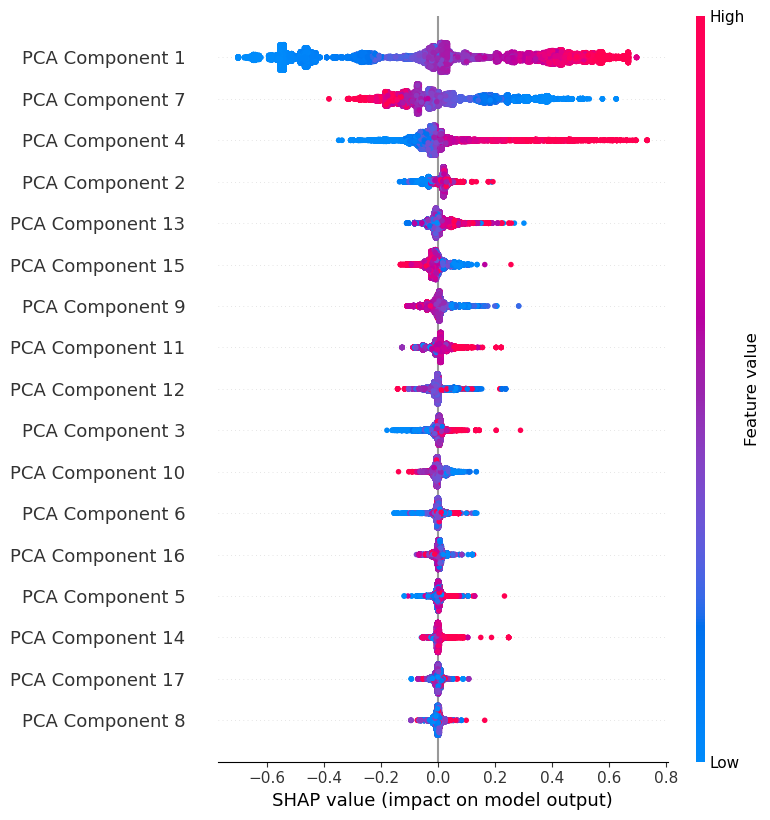

In [627]:
# Create the SHAP explainer using the XGBoost model from the pipeline
explainer = shap.Explainer(model_new, X_transformed)

# Calculate SHAP values
shap_values = explainer(X_transformed)

# Feature names as PCA components
feature_names = [f"PCA Component {i+1}" for i in range(pca.n_components)]

# Plot summary of SHAP values
shap.summary_plot(shap_values, X_transformed, feature_names=feature_names)

In [617]:
selected_name = pipeline_XG_new.named_steps['feature_selection']
selected_mask = selected_name.get_support()
preprocessor_feature_names = pipeline_XG_new.named_steps['preprocessor_poly'].get_feature_names_out()
sk_best_selected_feature_names = preprocessor_feature_names[selected_mask]

In [619]:
pca_components= pca.components_

In [621]:
features = [f"PC {i}" for i in range(1, 18)]

In [623]:
pca_df_new = pd.DataFrame(pca_components, index=features, columns=sk_best_selected_feature_names)

In [625]:
pca_df_new

cat__target__make_model  cat__onehot__standard_colour_grouped_Black  \
PC 1                  0.493804                                    0.058225   
PC 2                  0.133702                                    0.148257   
PC 3                  0.106517                                    0.778577   
PC 4                  0.575177                                   -0.045557   
PC 5                  0.191272                                   -0.526286   
PC 6                  0.178760                                    0.072883   
PC 7                 -0.493156                                    0.068674   
PC 8                  0.050308                                    0.272689   
PC 9                 -0.190470                                   -0.017249   
PC 10                -0.126141                                    0.028041   
PC 11                 0.085844                                   -0.004153   
PC 12                -0.104524                                   -0.004946   
PC 13                 0.048637                                   -0.001953   
PC 14                 0.026835                                    0.023548   
PC 15                -0.050543                                    0.007366   
PC 16                 0.050972                                    0.040083   
PC 17                 0.013045                                    0.040024   

       cat__onehot__standard_colour_grouped_Green  \
PC 1                                    -0.006167   
PC 2                                    -0.000767   
PC 3                                    -0.004022   
PC 4                                    -0.007762   
PC 5                                     0.020004   
PC 6                                    -0.013389   
PC 7                                    -0.008414   
PC 8                                    -0.046103   
PC 9                                    -0.004748   
PC 10                                   -0.013896   
PC 11                                    0.003380   
PC 12                                    0.027836   
PC 13                                    0.028480   
PC 14                                   -0.065330   
PC 15                                   -0.037154   
PC 16                                   -0.212665   
PC 17                                    0.971357   

       cat__onehot__standard_colour_grouped_Multicolour  \
PC 1                                          -0.005706   
PC 2                                          -0.026026   
PC 3                                          -0.003249   
PC 4                                          -0.020224   
PC 5                                           0.026267   
PC 6                                          -0.010655   
PC 7                                          -0.002457   
PC 8                                          -0.076755   
PC 9                                           0.015943   
PC 10                                          0.027967   
PC 11                                         -0.059985   
PC 12                                          0.066688   
PC 13                                          0.071366   
PC 14                                          0.908610   
PC 15                                          0.100939   
PC 16                                          0.323840   
PC 17                                          0.131793   

       cat__onehot__standard_colour_grouped_Orange  \
PC 1                                     -0.007449   
PC 2                                     -0.021684   
PC 3                                     -0.003877   
PC 4                                     -0.025960   
PC 5                                      0.019342   
PC 6                                     -0.018972   
PC 7                                      0.005783   
PC 8                                     -0.066247   
PC 9                                      0.015701   
PC 10                                     0.

# Shap analysis on Vintage car


In [630]:
X = vintage_car.drop(["log_price"], axis=1)
y = vintage_car["log_price"]
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [632]:
##Shap on vintage car
model = XGBRegressor(n_jobs=-1)
estimator = XGBRegressor(n_jobs=-1)
ref_selector = RFECV(estimator=model, step=1, cv =5 , scoring='neg_mean_squared_error' , n_jobs=-1)
pca = PCA(random_state=42, n_components =17)

pipeline_XG_vintage = Pipeline([
    ('preprocessor_poly', preprocessor_poly),
    ('feature_selection', ref_selector),
    ('pca', pca),
    ('regressor', estimator)
])

pipeline_XG_vintage.fit(X_train, y_train)

Pipeline(steps=[('preprocessor_poly',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler()),
                                                                  ('poly',
                                                                   PolynomialFeatures(degree=3,
                                                                                      include_bias=False))]),
                                                  ['Age', 'log_mileage']),
                                                 ('cat',
                                                  ColumnTransformer(remainder='passthrough',
                                                                    transformers=[('target',
                                                                                   TargetEncoder(),
                                                                                   ['make_model']),
                                                                                  ('ordinal',
                                                                                   OrdinalEnc...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=-1,
                              num_parallel_tree=None, random_state=None, ...))])

100%|===================| 21818/21874 [03:34<00:00]        

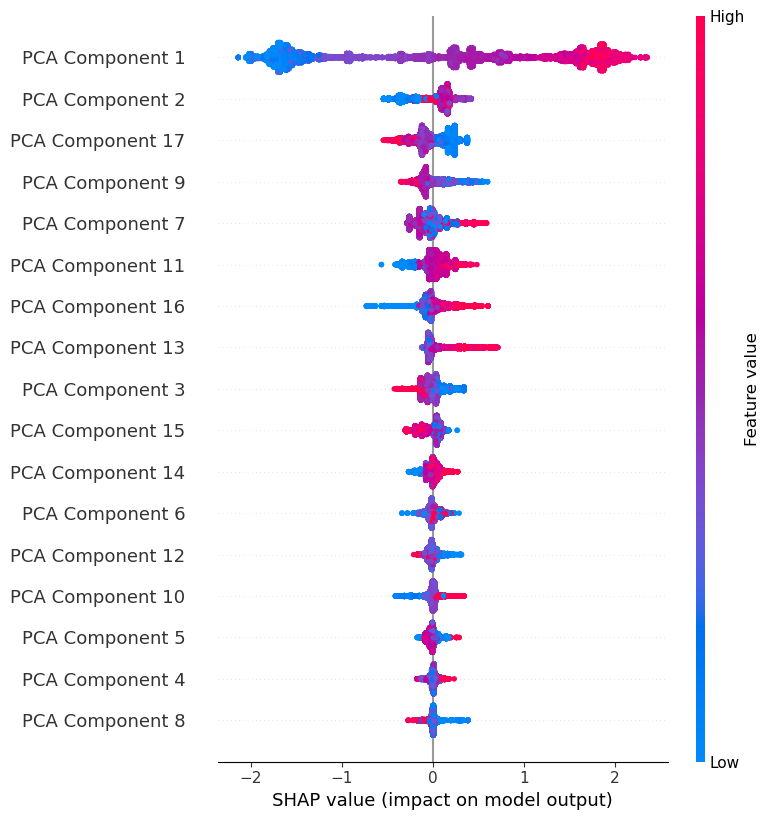

In [633]:
model_vintage = pipeline_XG_vintage.named_steps['regressor']
# Create the SHAP explainer using the XGBoost model from the pipeline
explainer = shap.Explainer(model_vintage, X_transformed)

# Calculate SHAP values
shap_values = explainer(X_transformed)

# Feature names as PCA components
feature_names = [f"PCA Component {i+1}" for i in range(pca.n_components)]

# Plot summary of SHAP values
shap.summary_plot(shap_values, X_transformed, feature_names=feature_names)

In [634]:
selected_name = pipeline_XG_vintage.named_steps['feature_selection']
selected_mask = selected_name.get_support()
preprocessor_feature_names = pipeline_XG_vintage.named_steps['preprocessor_poly'].get_feature_names_out()
sk_best_selected_feature_names = preprocessor_feature_names[selected_mask]

In [635]:
pca_components= pca.components_

In [636]:
features = [f"PC {i}" for i in range(1, 18)]

In [637]:
pca_df_vintage = pd.DataFrame(pca_components, index=features, columns=sk_best_selected_feature_names)

In [638]:
pca_df_vintage

num__Age  num__log_mileage  num__Age log_mileage  \
PC 1   0.049307         -0.015022              0.040037   
PC 2   0.010568         -0.010804              0.007654   
PC 3  -0.015649          0.011528             -0.011343   
PC 4   0.026577          0.001085              0.021184   
PC 5   0.036335         -0.006497              0.029532   
PC 6   0.026433          0.009050              0.022558   
PC 7   0.016577         -0.016296              0.011270   
PC 8  -0.039065          0.047664             -0.027343   
PC 9  -0.023581          0.013310             -0.018079   
PC 10  0.115851         -0.033197              0.090884   
PC 11  0.563482         -0.084303              0.452603   
PC 12 -0.318936          0.002398             -0.265238   
PC 13  0.074574         -0.052896              0.046006   
PC 14  0.058851          0.021000              0.047939   
PC 15  0.015189          0.160844              0.046386   
PC 16  0.068671         -0.739892             -0.096593   
PC 17 -0.077849          0.595518              0.047641   

       num__Age^2 log_mileage  num__Age log_mileage^2  \
PC 1                 0.010616                0.033064   
PC 2                 0.001675                0.005840   
PC 3                -0.004802               -0.008415   
PC 4                 0.007779                0.017261   
PC 5                 0.007852                0.024652   
PC 6                 0.009256                0.019519   
PC 7                 0.007125                0.008033   
PC 8                -0.013773               -0.019047   
PC 9                -0.012129               -0.014164   
PC 10                0.033912                0.073815   
PC 11                0.183827                0.370891   
PC 12               -0.111408               -0.220941   
PC 13                0.030211                0.028685   
PC 14                0.027003                0.038741   
PC 15                0.031908                0.053863   
PC 16               -0.012653               -0.154493   
PC 17                0.001606                0.099178   

       cat__target__make_model  cat__onehot__standard_colour_grouped_Black  \
PC 1                  0.902226                                    0.036301   
PC 2                  0.064025                                   -0.002789   
PC 3                 -0.033998                                   -0.339384   
PC 4                  0.010278                                    0.731248   
PC 5                 -0.067694                                   -0.248635   
PC 6                  0.221211                                   -0.306839   
PC 7                  0.336302                                   -0.024367   
PC 8                 -0.008828                                    0.059858   
PC 9                 -0.073586                                   -0.178031   
PC 10                 0.017080                                   -0.196355   
PC 11                -0.077850                                   -0.138387   
PC 12                 0.042143                                   -0.220883   
PC 13                -0.012936                                    0.139987   
PC 14                -0.005487                                    0.090666   
PC 15                -0.001562                                    0.129687   
PC 16                -0.010291                                    0.055794   
PC 17                 0.007724                                    0.015743   

       cat__onehot__standard_colour_grouped_Blue  \
PC 1                                    0.023153   
PC 2                                    0.097703   
PC 3                                    0.878395   
PC 4                                    0.071954   
PC 5                                   -0.073511   
PC 6                                   -0.148834   
PC 7                                    0.084497   
PC 8                                    0.022171   
PC 9                                   -0.13

In [650]:
component_10_shap_values = shap_values[:, 1]

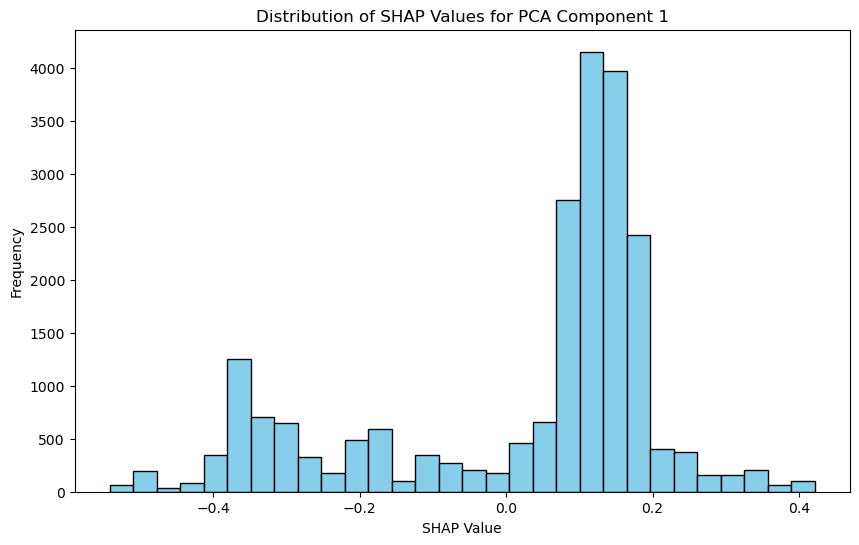

In [656]:
plt.figure(figsize=(10, 6))
plt.hist(component_10_shap_values, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of SHAP Values for PCA Component 1')
plt.xlabel('SHAP Value')
plt.ylabel('Frequency')
plt.show()

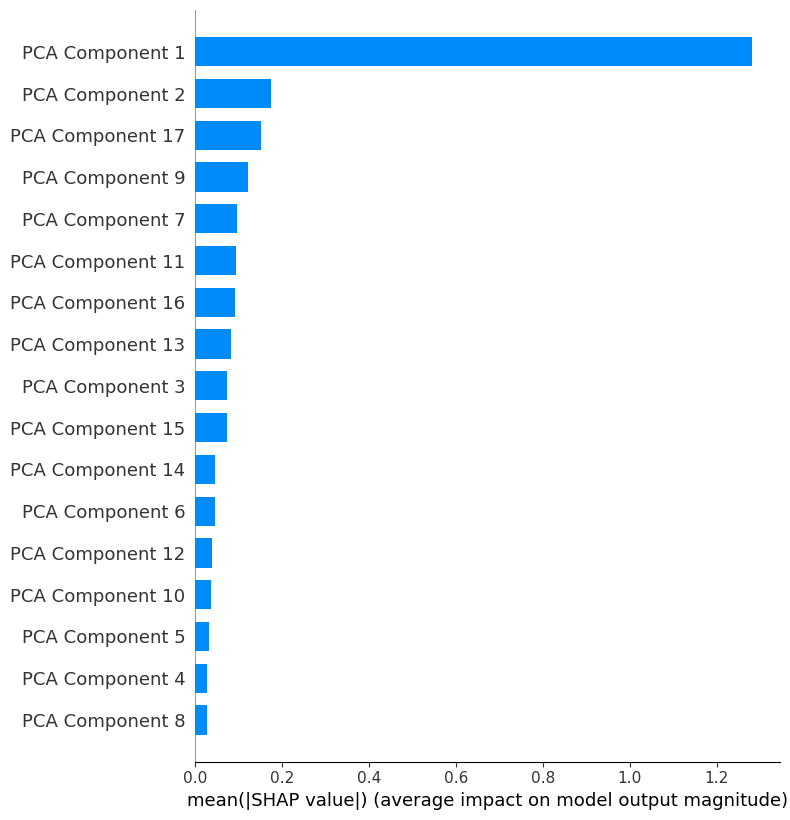

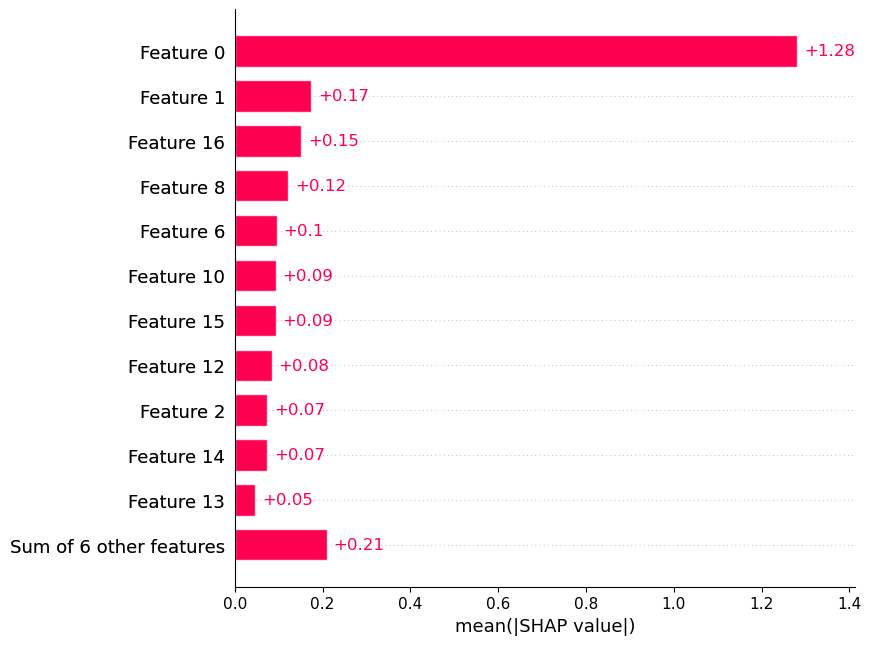

In [672]:
shap.plots.bar(shap_values, max_display=12)


In [ ]:
!pip install pdpbox

In [717]:
print(X_train.dtypes)

body_type                   object
fuel_type                   object
Age                        float64
log_mileage                float64
car_type                    object
make_model                  object
standard_colour_grouped     object
dtype: object


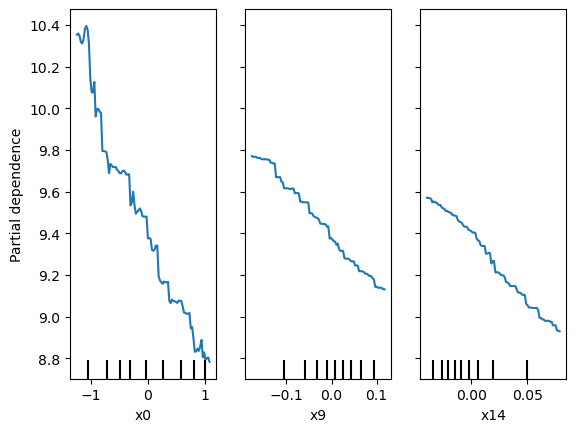

In [730]:
features = [0, 9, 14 ]  
model = pipeline_XG.named_steps['regressor']
transformer_pipeline = Pipeline([
    ('preprocessor_poly', pipeline_XG.named_steps['preprocessor_poly']),
    ('feature_selection', pipeline_XG.named_steps['feature_selection']),
    ('pca', pipeline_XG.named_steps['pca'])
])


X_transformed = transformer_pipeline.transform(X_train)
PartialDependenceDisplay.from_estimator(
    model, X_transformed, features=features
)
plt.show()


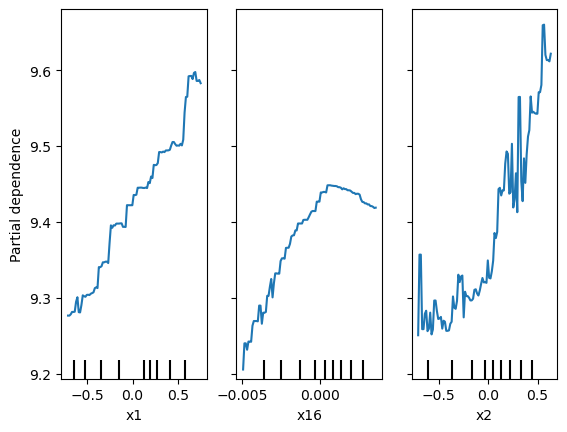

In [727]:
features = [1,16, 2]  
model = pipeline_XG.named_steps['regressor']
transformer_pipeline = Pipeline([
    ('preprocessor_poly', pipeline_XG.named_steps['preprocessor_poly']),
    ('feature_selection', pipeline_XG.named_steps['feature_selection']),
    ('pca', pipeline_XG.named_steps['pca'])
])


X_transformed = transformer_pipeline.transform(X_train)
PartialDependenceDisplay.from_estimator(
    model, X_transformed, features=features
)
plt.show()


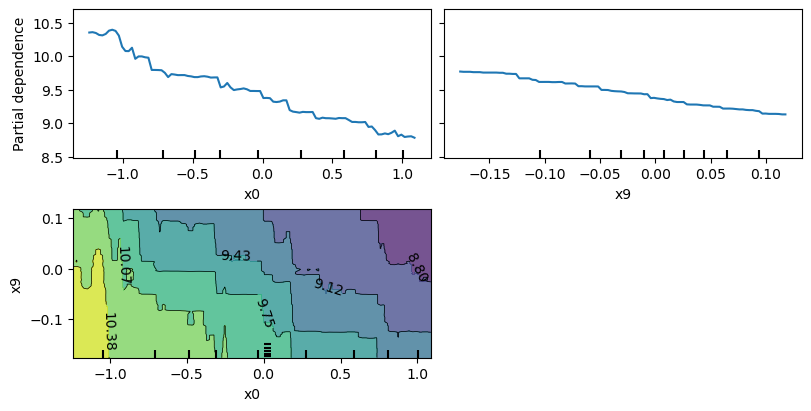

In [737]:
fig, ax = plt.subplots(figsize=(8,4), constrained_layout=True)
PartialDependenceDisplay.from_estimator(
    model, X_transformed, features=[0,9,(0,9)],
  kind='average', ax=ax, n_cols=2
);

In [752]:
shap_sum = np.abs(shap_values.values).mean(axis=0)
top_indices = np.argsort(shap_sum)[-5:]

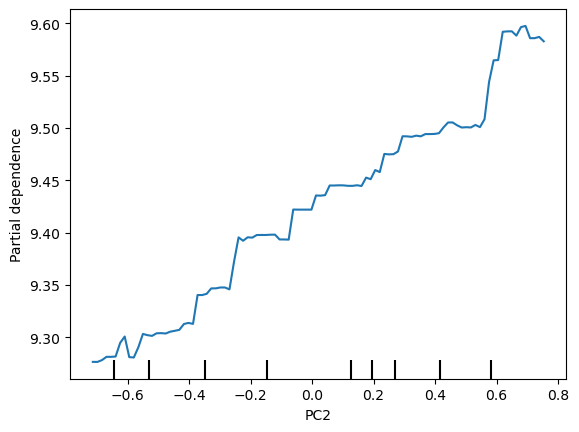

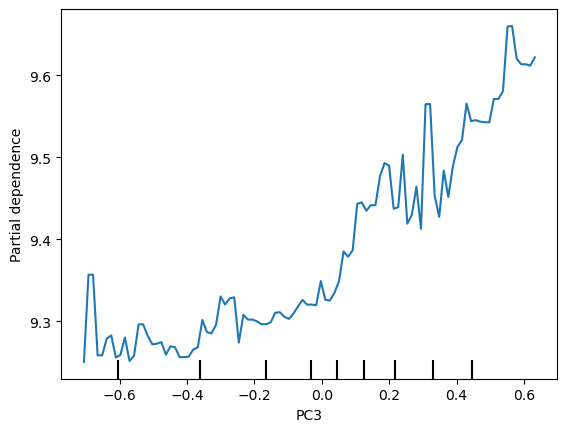

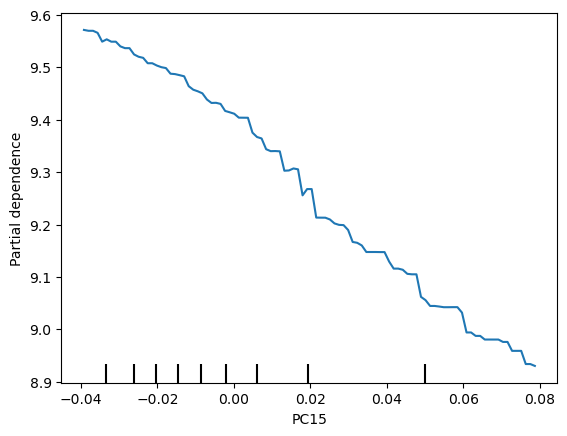

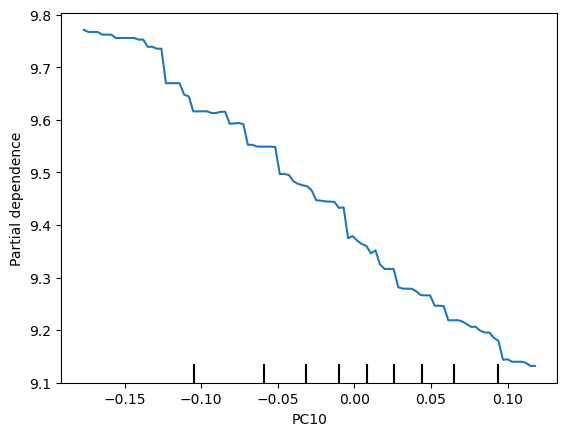

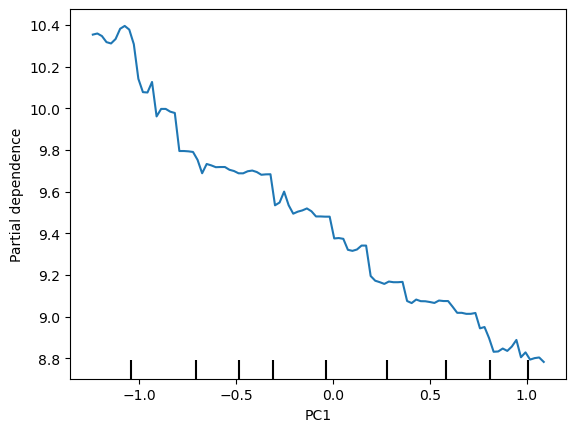

In [762]:
total_components = X_transformed.shape[1] 
feature_names = [f'PC{i+1}' for i in range(total_components)]

for index in top_indices:
    display = PartialDependenceDisplay.from_estimator(
        model, X_transformed, features=[index],
        feature_names=feature_names  
    )
    
    display.axes_[0][0].set_xlabel(f'PC{index+1}') 
    plt.show()

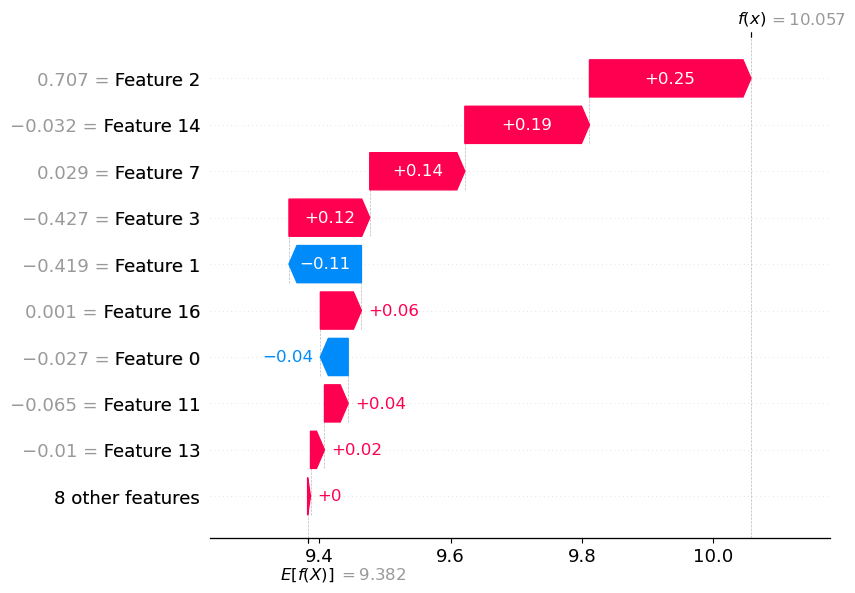

In [768]:
shap.waterfall_plot(shap_values[3])